In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [2]:
# url = "https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"
# #download = github_session.get(url).content
# df = pd.read_csv(url,index_col=0)

# df.head(5)

In [3]:
# df.to_csv("Energy.csv", index=True)


In [2]:
data = pd.read_csv('Energy.csv')

In [3]:
data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [4]:
len(data.columns)

11

In [5]:
for i in data.columns:
    print(i)

record_id
utility_id_ferc1
report_year
plant_name_ferc1
fuel_type_code_pudl
fuel_unit
fuel_qty_burned
fuel_mmbtu_per_unit
fuel_cost_per_unit_burned
fuel_cost_per_unit_delivered
fuel_cost_per_mmbtu


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [7]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [8]:
data.shape

(29523, 11)

In [9]:

for features in data.columns:
    #print(i=+1)
    print(" frequency table of\t"+features)
    print(data[features].value_counts())
    print('====> '+features+'\t has '+str(len(data[features].value_counts()))+'\t unique values <====')
    print('\n')
    

 frequency table of	record_id
f1_fuel_2008_12_134_2_11    1
f1_fuel_2007_12_177_1_10    1
f1_fuel_1999_12_80_1_10     1
f1_fuel_2014_12_81_0_2      1
f1_fuel_2002_12_266_0_7     1
                           ..
f1_fuel_2001_12_20_1_1      1
f1_fuel_2012_12_195_1_1     1
f1_fuel_2011_12_177_0_14    1
f1_fuel_2017_12_144_1_10    1
f1_fuel_2008_12_194_5_4     1
Name: record_id, Length: 29523, dtype: int64
====> record_id	 has 29523	 unique values <====


 frequency table of	utility_id_ferc1
194    1224
186     981
195     826
134     786
44      746
       ... 
283       2
208       2
513       2
285       1
287       1
Name: utility_id_ferc1, Length: 185, dtype: int64
====> utility_id_ferc1	 has 185	 unique values <====


 frequency table of	report_year
2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997 

 frequency table Plot of 	record_id


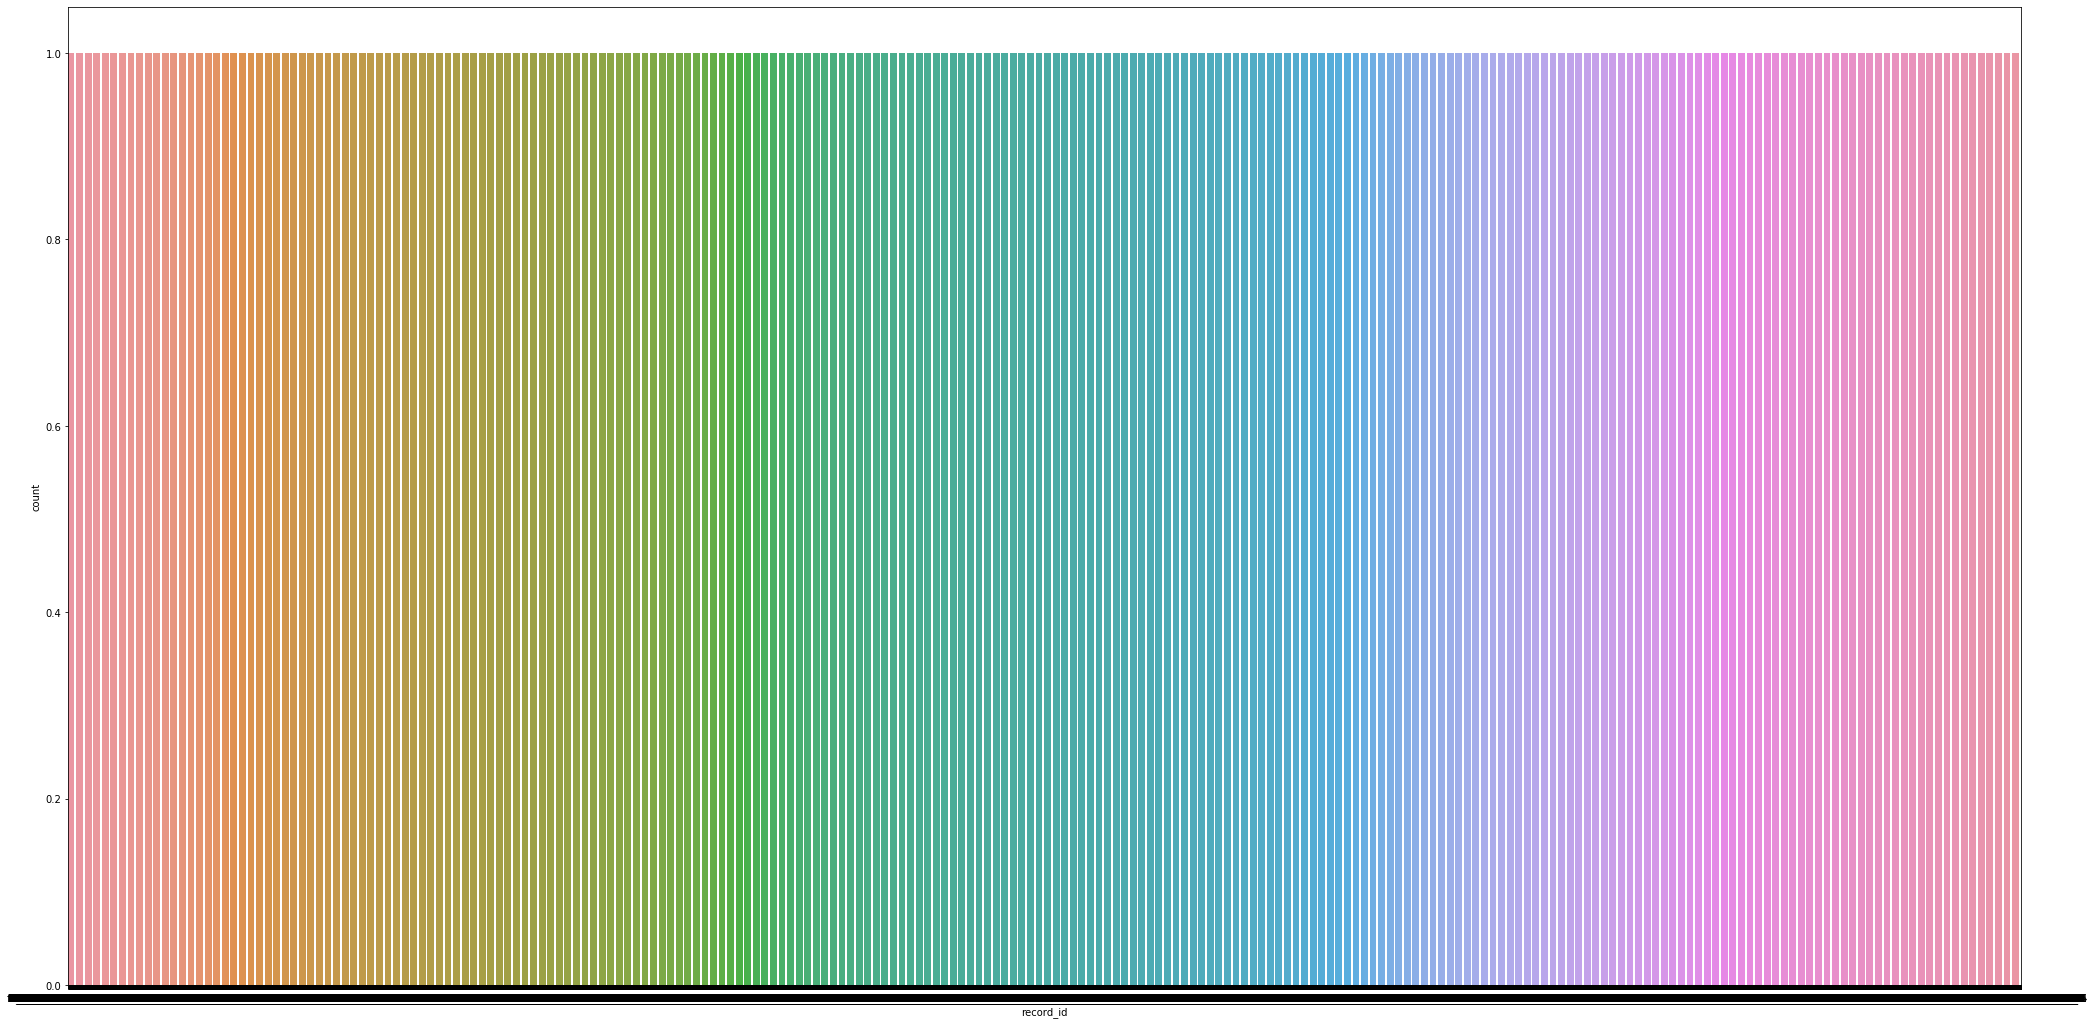



 frequency table Plot of 	utility_id_ferc1


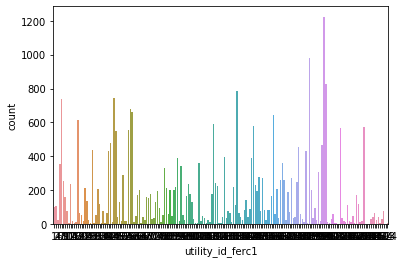



 frequency table Plot of 	report_year


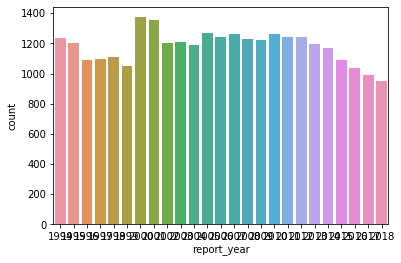



 frequency table Plot of 	plant_name_ferc1


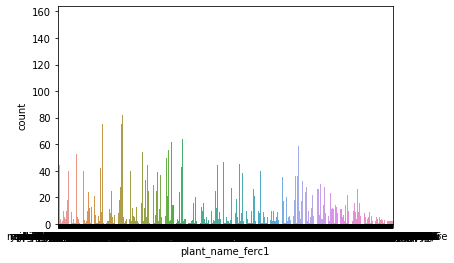



 frequency table Plot of 	fuel_type_code_pudl


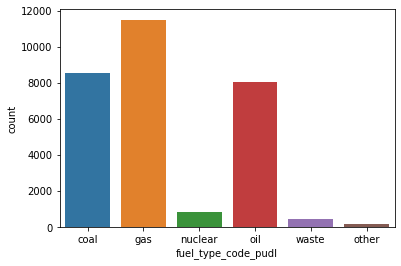



 frequency table Plot of 	fuel_unit


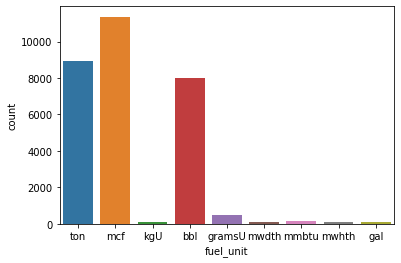



 frequency table Plot of 	fuel_qty_burned


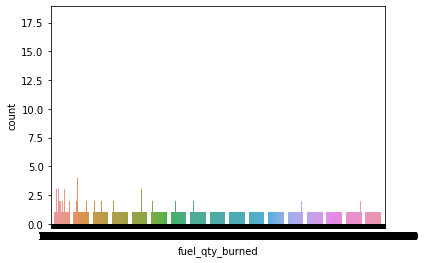



 frequency table Plot of 	fuel_mmbtu_per_unit


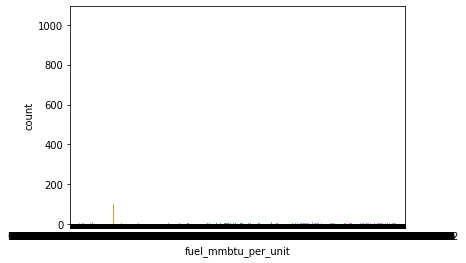



 frequency table Plot of 	fuel_cost_per_unit_burned


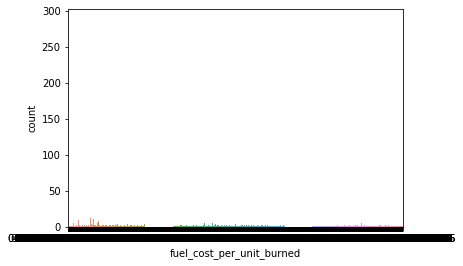



 frequency table Plot of 	fuel_cost_per_unit_delivered


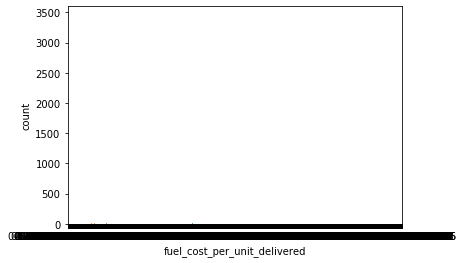



 frequency table Plot of 	fuel_cost_per_mmbtu


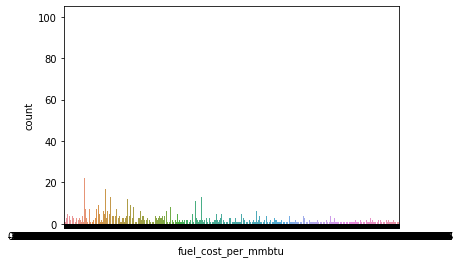

In [12]:
plt.figure(figsize=(35,18))
for features in data.columns:
    #print(i=+1)
    print(" frequency table Plot of \t"+features)
    sns.countplot(features,data=data)
    plt.show()
    #print('====> '+features+'\t has '+str(len(df[features].value_counts()))+'\t unique values <====')
    print('\n')

In [10]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [15]:
 data[data['fuel_cost_per_unit_burned']==0.0]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
211,f1_fuel_1994_12_38_0_1,38,1994,connecticut yankee,nuclear,gramsU,652000.0,0.000006,0.0,0.0,0.000
670,f1_fuel_1994_12_146_1_13,146,1994,millstone no. 3,nuclear,gramsU,43006.0,0.000006,0.0,0.0,0.000
671,f1_fuel_1994_12_118_0_1,118,1994,seabrook,nuclear,gramsU,361764.0,0.000006,0.0,0.0,0.000
786,f1_fuel_1994_12_179_0_1,179,1994,seabrook,nuclear,gramsU,177986.0,0.000006,0.0,0.0,0.000
790,f1_fuel_1994_12_179_0_13,179,1994,millstone - unit 3,nuclear,gramsU,55655.0,0.000006,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
28941,f1_fuel_2018_12_134_1_8,134,2018,hunter unit no. 3,oil,bbl,12340.0,5.796000,0.0,0.0,17.796
29177,f1_fuel_2018_12_120_0_11,120,2018,prairie island,nuclear,gramsU,849683.0,0.111007,0.0,0.0,0.808
29187,f1_fuel_2018_12_120_1_14,120,2018,monticello,nuclear,gramsU,474307.0,0.124409,0.0,0.0,0.787
29514,f1_fuel_2018_12_12_0_4,12,2018,ben french station,oil,bbl,487.0,5.831070,0.0,0.0,9.970


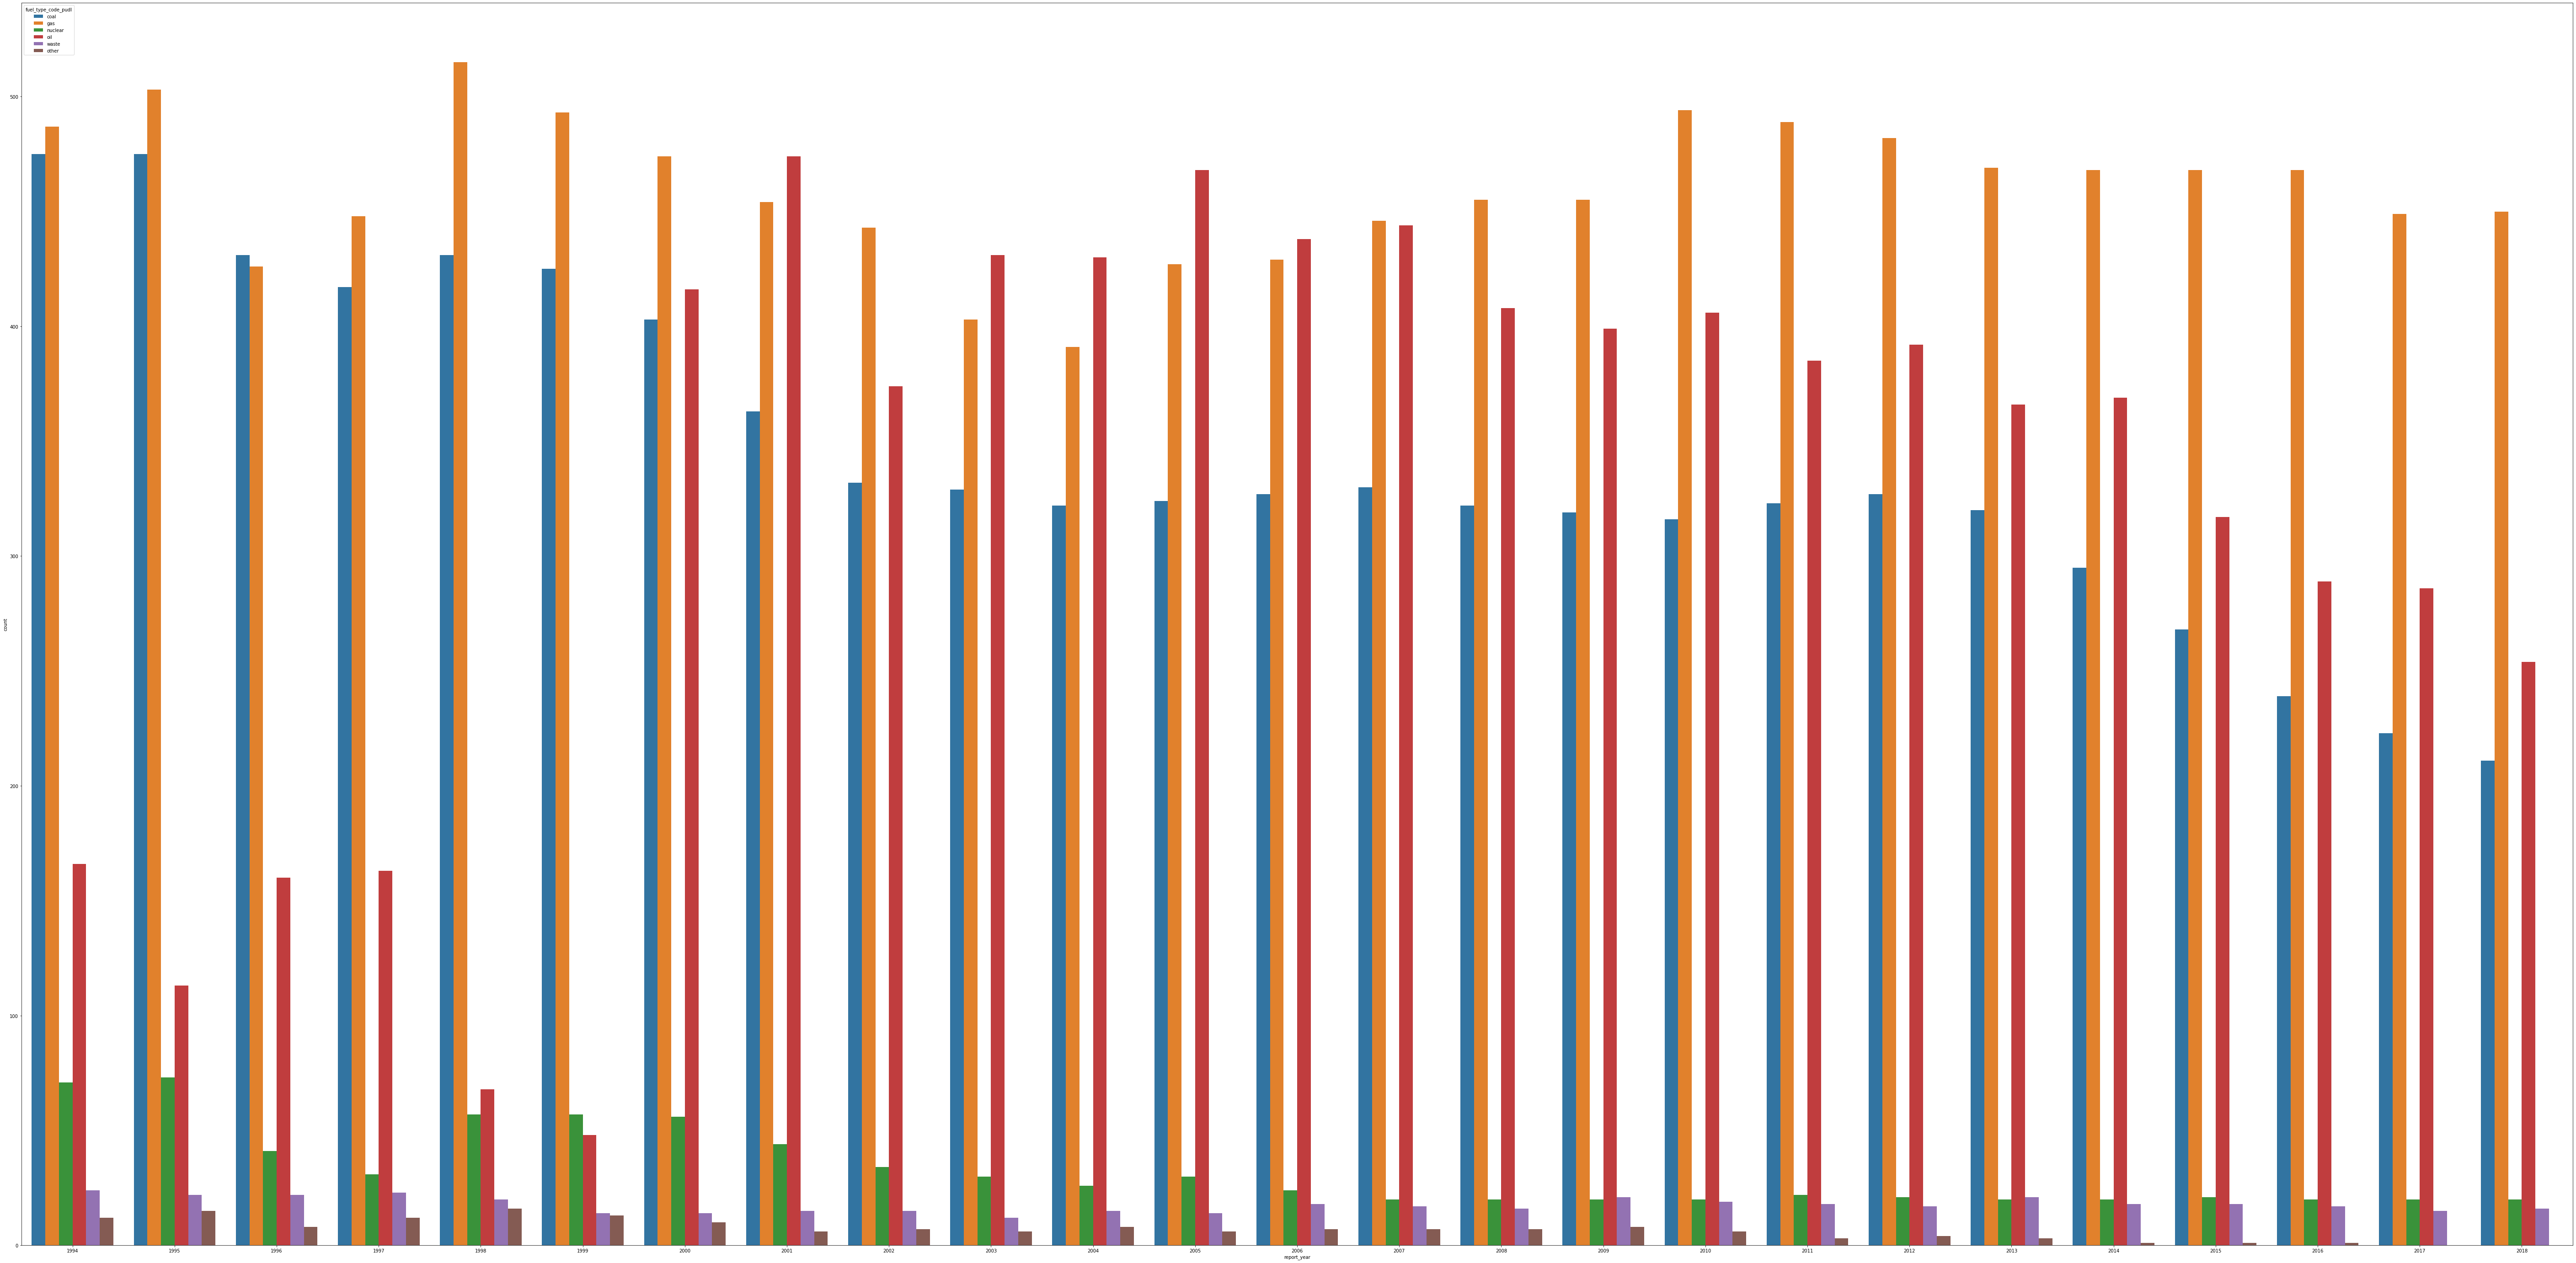

In [16]:
plt.figure(figsize=(100,50))
sns.countplot('report_year',data=data,hue='fuel_type_code_pudl')

# Facts about the fuel_type_code_pudl used over the years 1994-2018

<ul>
    <li>between <b>1994 - 1998</b> it is observed that there has been a constant degree fuel in the following hierracy --><i>Gas,Coal,Oil,Nuclear,Waste,Others</i></li>

 <li>in <b>1999</b> there's a little  change in the hierracy at which fuel was used  which is--><i>Gas,Coal,Nuclear,Oil,Waste,Others</i>
    </li>
    <li> in <b>2000</b> it turns out that there's more consumption of Oil than Coal this year start the new tracjectory in the type of fuel consumed yearly  in the following hierracy --><i>Gas,Oil,Coal,Nuclear,Waste,Others</i> </li>
    <li>Oil became the highest fuel consumed in the year <b>2001</b> the hierracy of usage is as follows --> <i>Oil,Gas,Coal,Nuclear,Waste,Others</i> </li>
    <li>Oil became the highest fuel in the year  <b>2001-2008</b> while Gas seconded the usage of fuel --><i>Oil,Gas,Coal,Nuclear,Waste,Others</i> </li> 
    <li>After seven Years, from <b>2009-2018</b> Gas became the most used fuel while Oil seconded it </li>
   </ul>   
   
there's a plot below that show all these fact explicitly


In [17]:
year_1994 = data[data['report_year']==1994]
year_1995 = data[data['report_year']==1995]
year_1996 = data[data['report_year']==1996]
year_1997 = data[data['report_year']==1997]
year_1998 = data[data['report_year']==1998]
year_1999 = data[data['report_year']==1999]
year_2000 = data[data['report_year']==2000]
year_2001 = data[data['report_year']==2001]
year_2002 = data[data['report_year']==2002]
year_2003 = data[data['report_year']==2003]
year_2004 = data[data['report_year']==2004]
year_2005 = data[data['report_year']==2005]
year_2006 = data[data['report_year']==2006]
year_2007 = data[data['report_year']==2007]
year_2008 = data[data['report_year']==2008]
year_2009 = data[data['report_year']==2009]
year_2010 = data[data['report_year']==2010]
year_2011 = data[data['report_year']==2011]
year_2012 = data[data['report_year']==2012]
year_2013 = data[data['report_year']==2013]
year_2014 = data[data['report_year']==2014]
year_2015 = data[data['report_year']==2015]
year_2016 = data[data['report_year']==2016]
year_2017 = data[data['report_year']==2017]
year_2018 = data[data['report_year']==2018]


years = [year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,
        year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,
        year_2018]
len(years)

25

## below is a distinct plot of the type of fuel consumed yearly
use this legend to better understand what each color represents
<img src="fuel_color_code.png" />




   ----------------------------------[]------------------------------------------------         


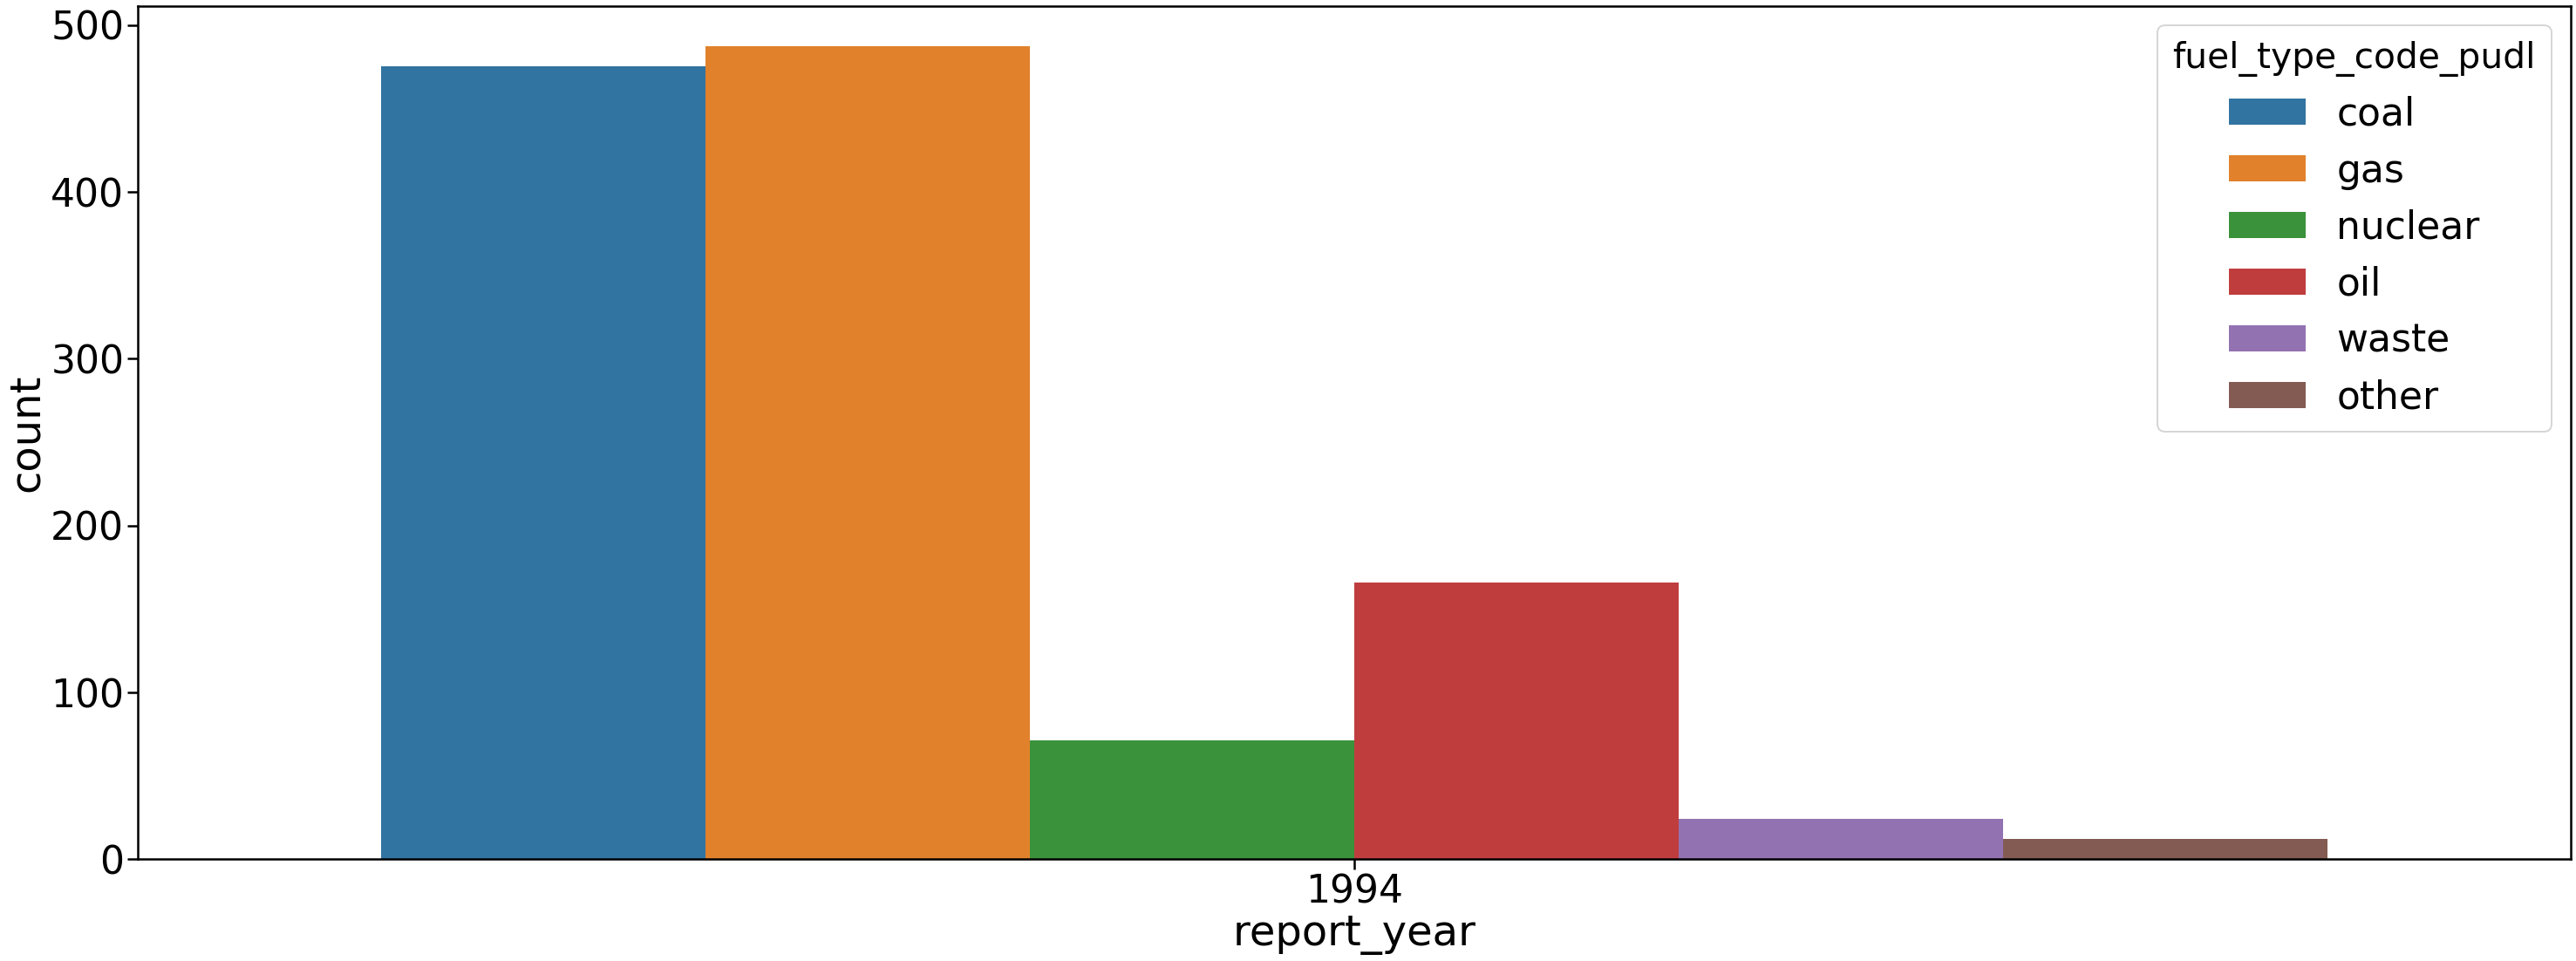




   ----------------------------------[]------------------------------------------------         


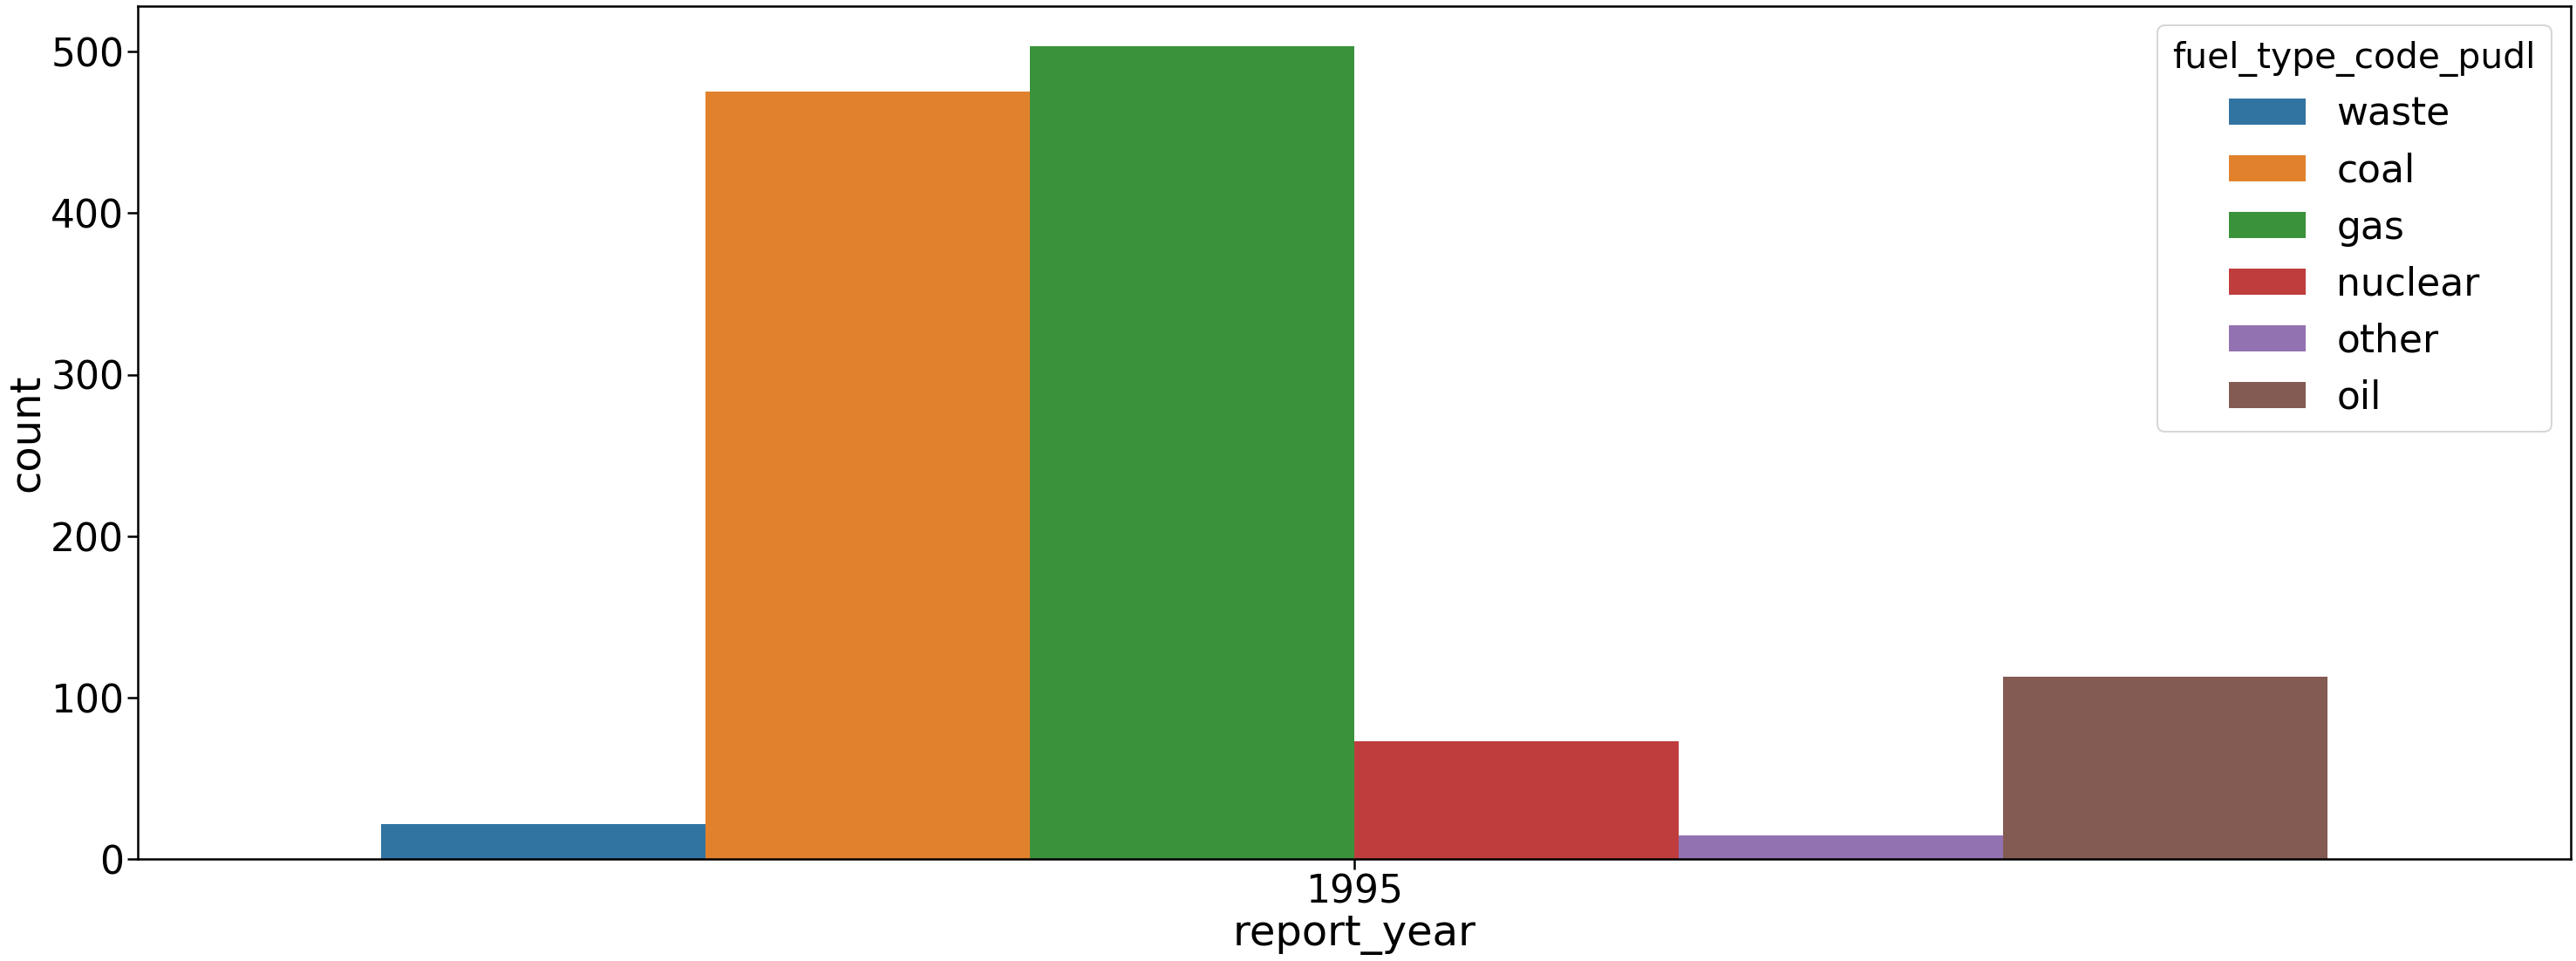




   ----------------------------------[]------------------------------------------------         


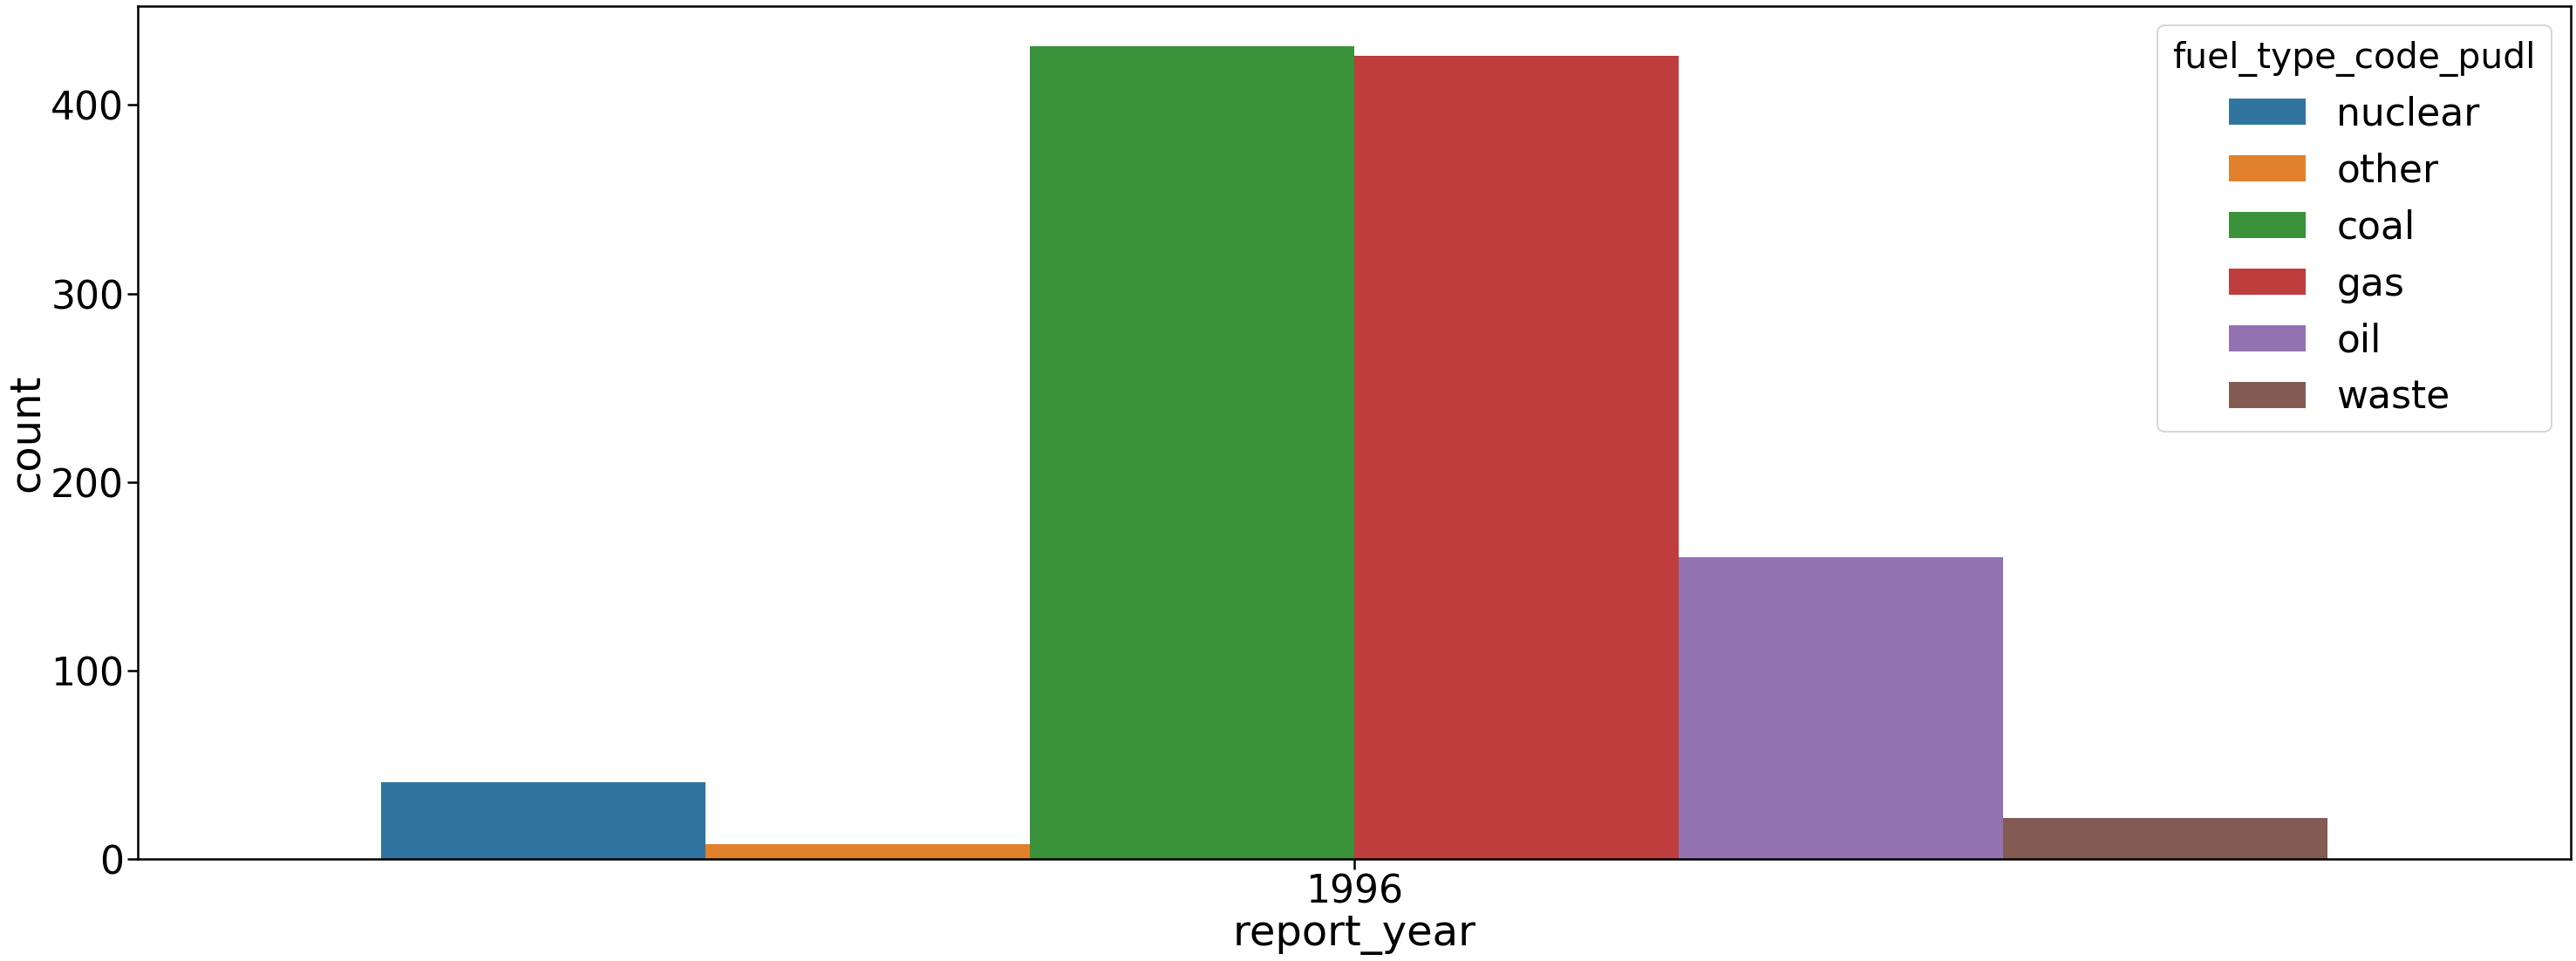




   ----------------------------------[]------------------------------------------------         


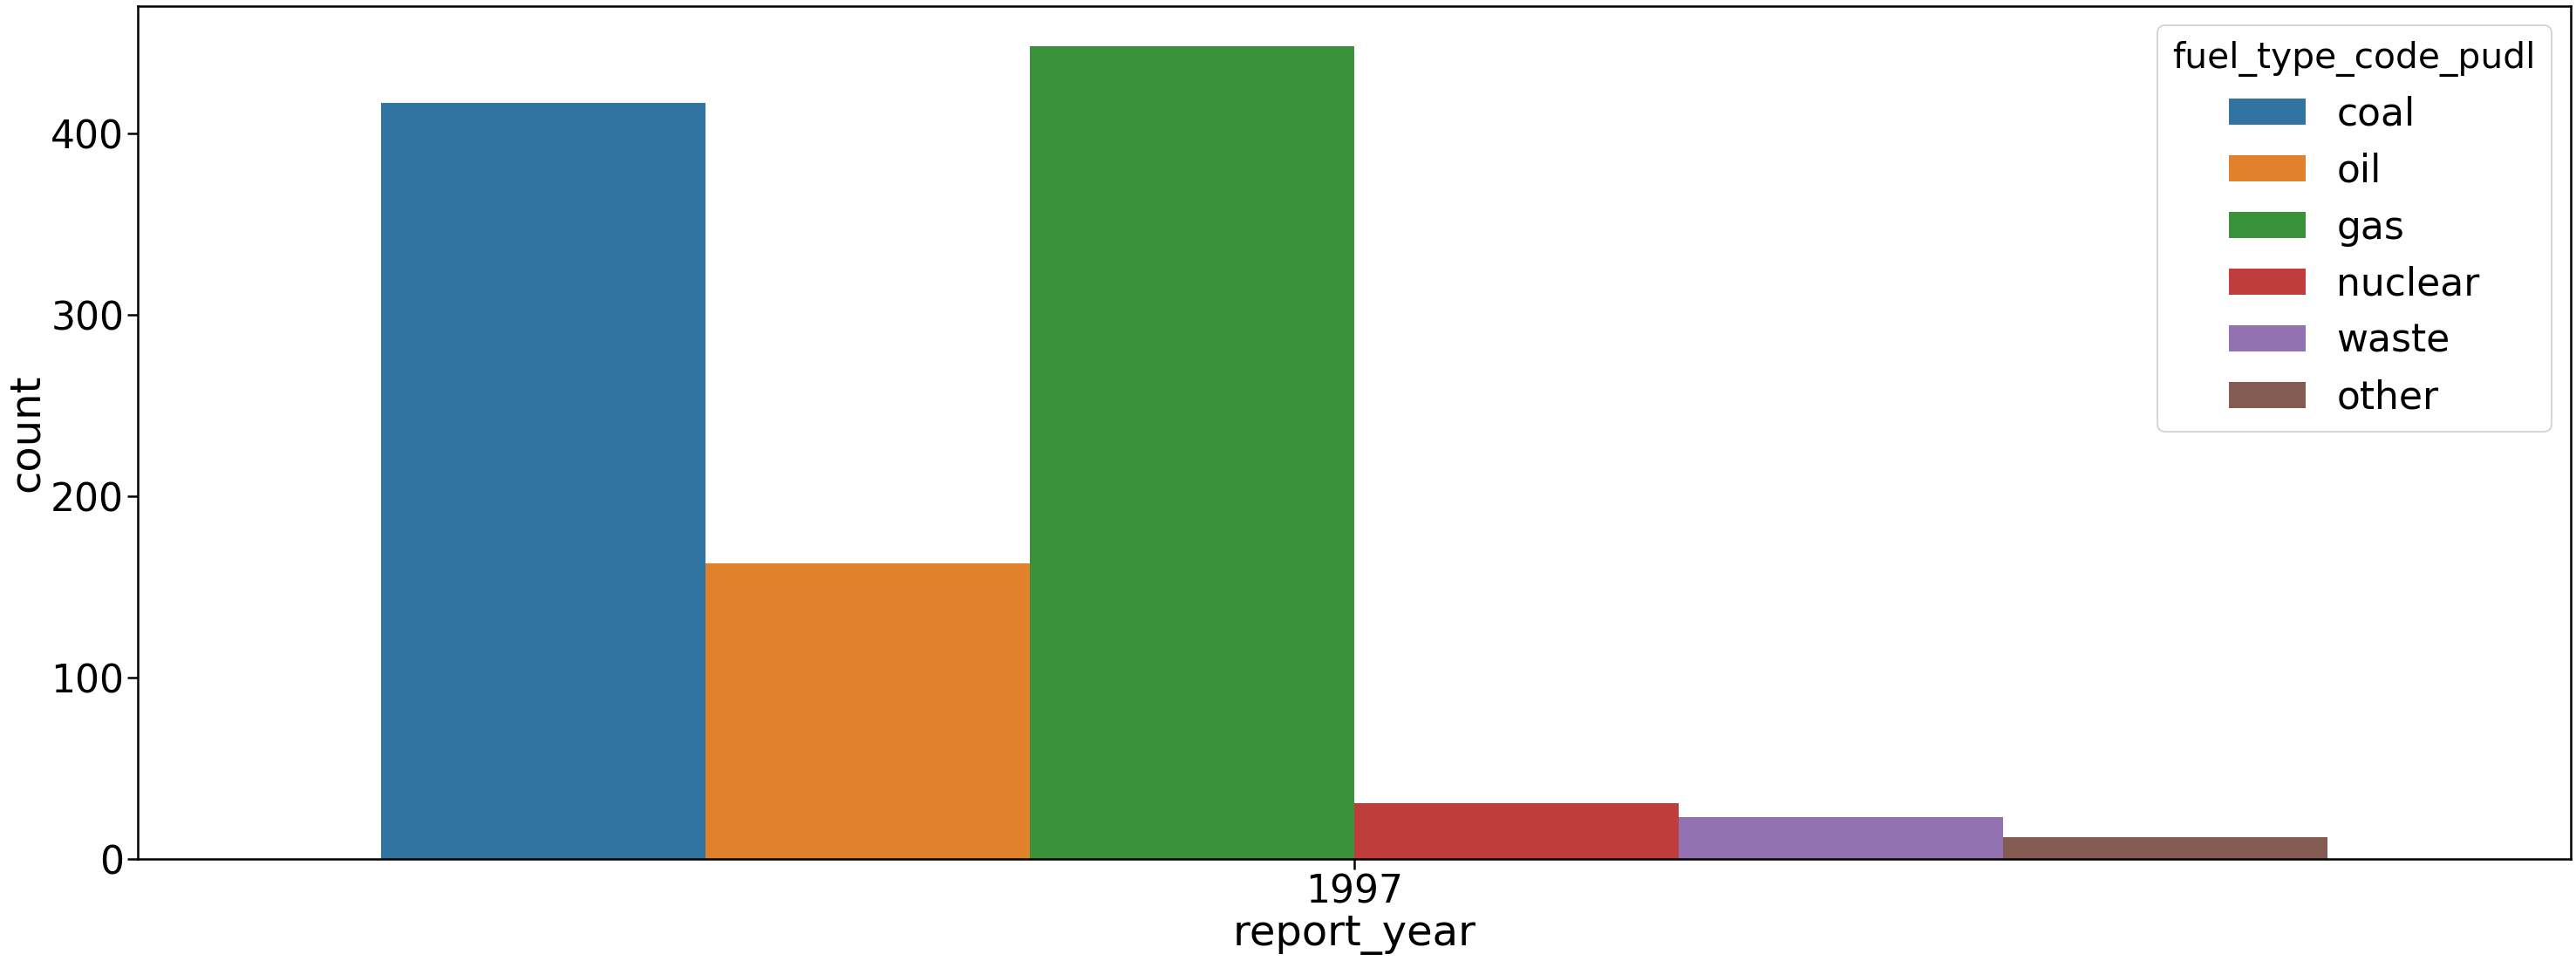




   ----------------------------------[]------------------------------------------------         


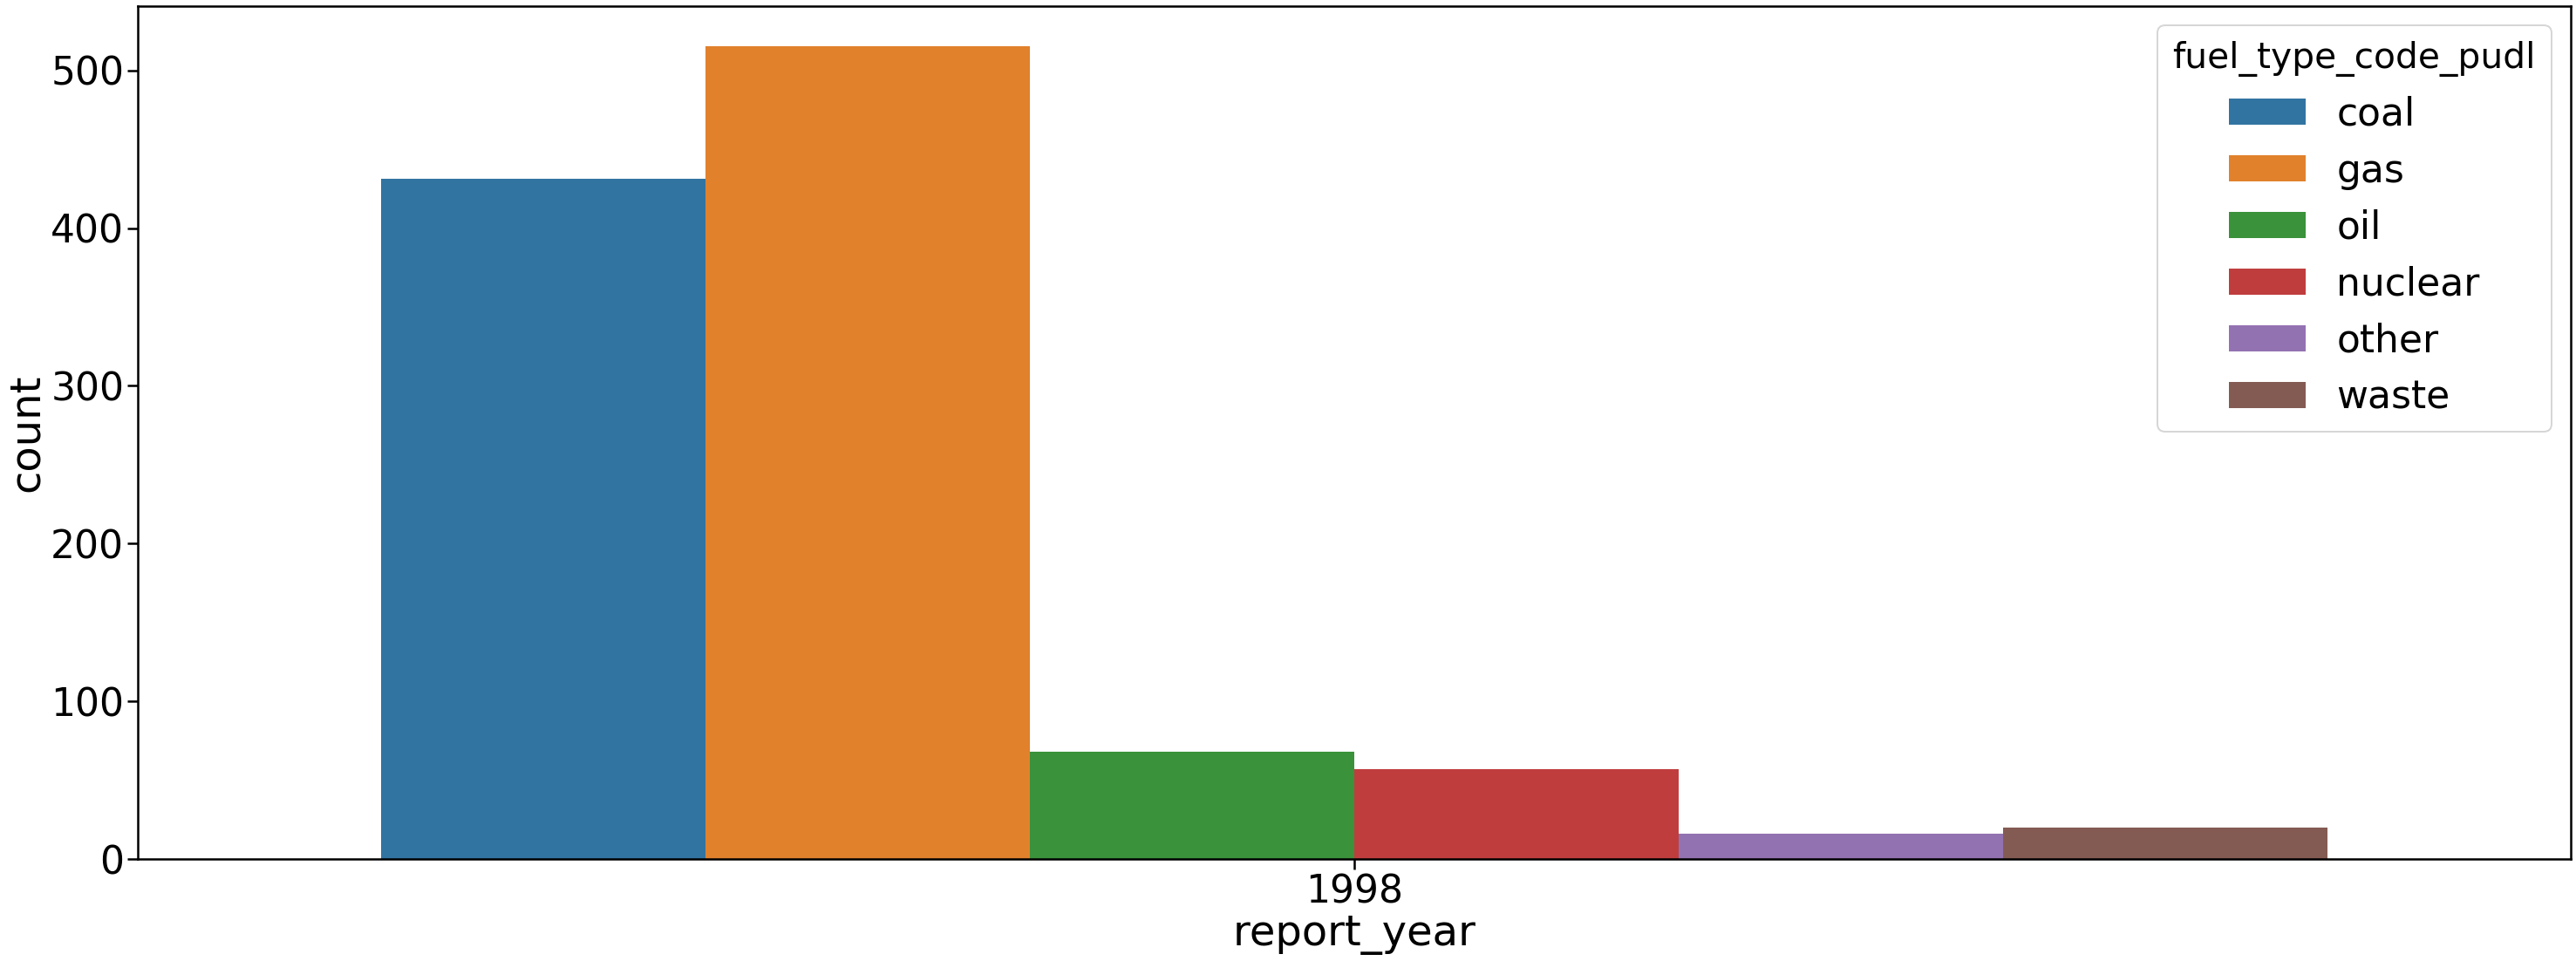




   ----------------------------------[]------------------------------------------------         


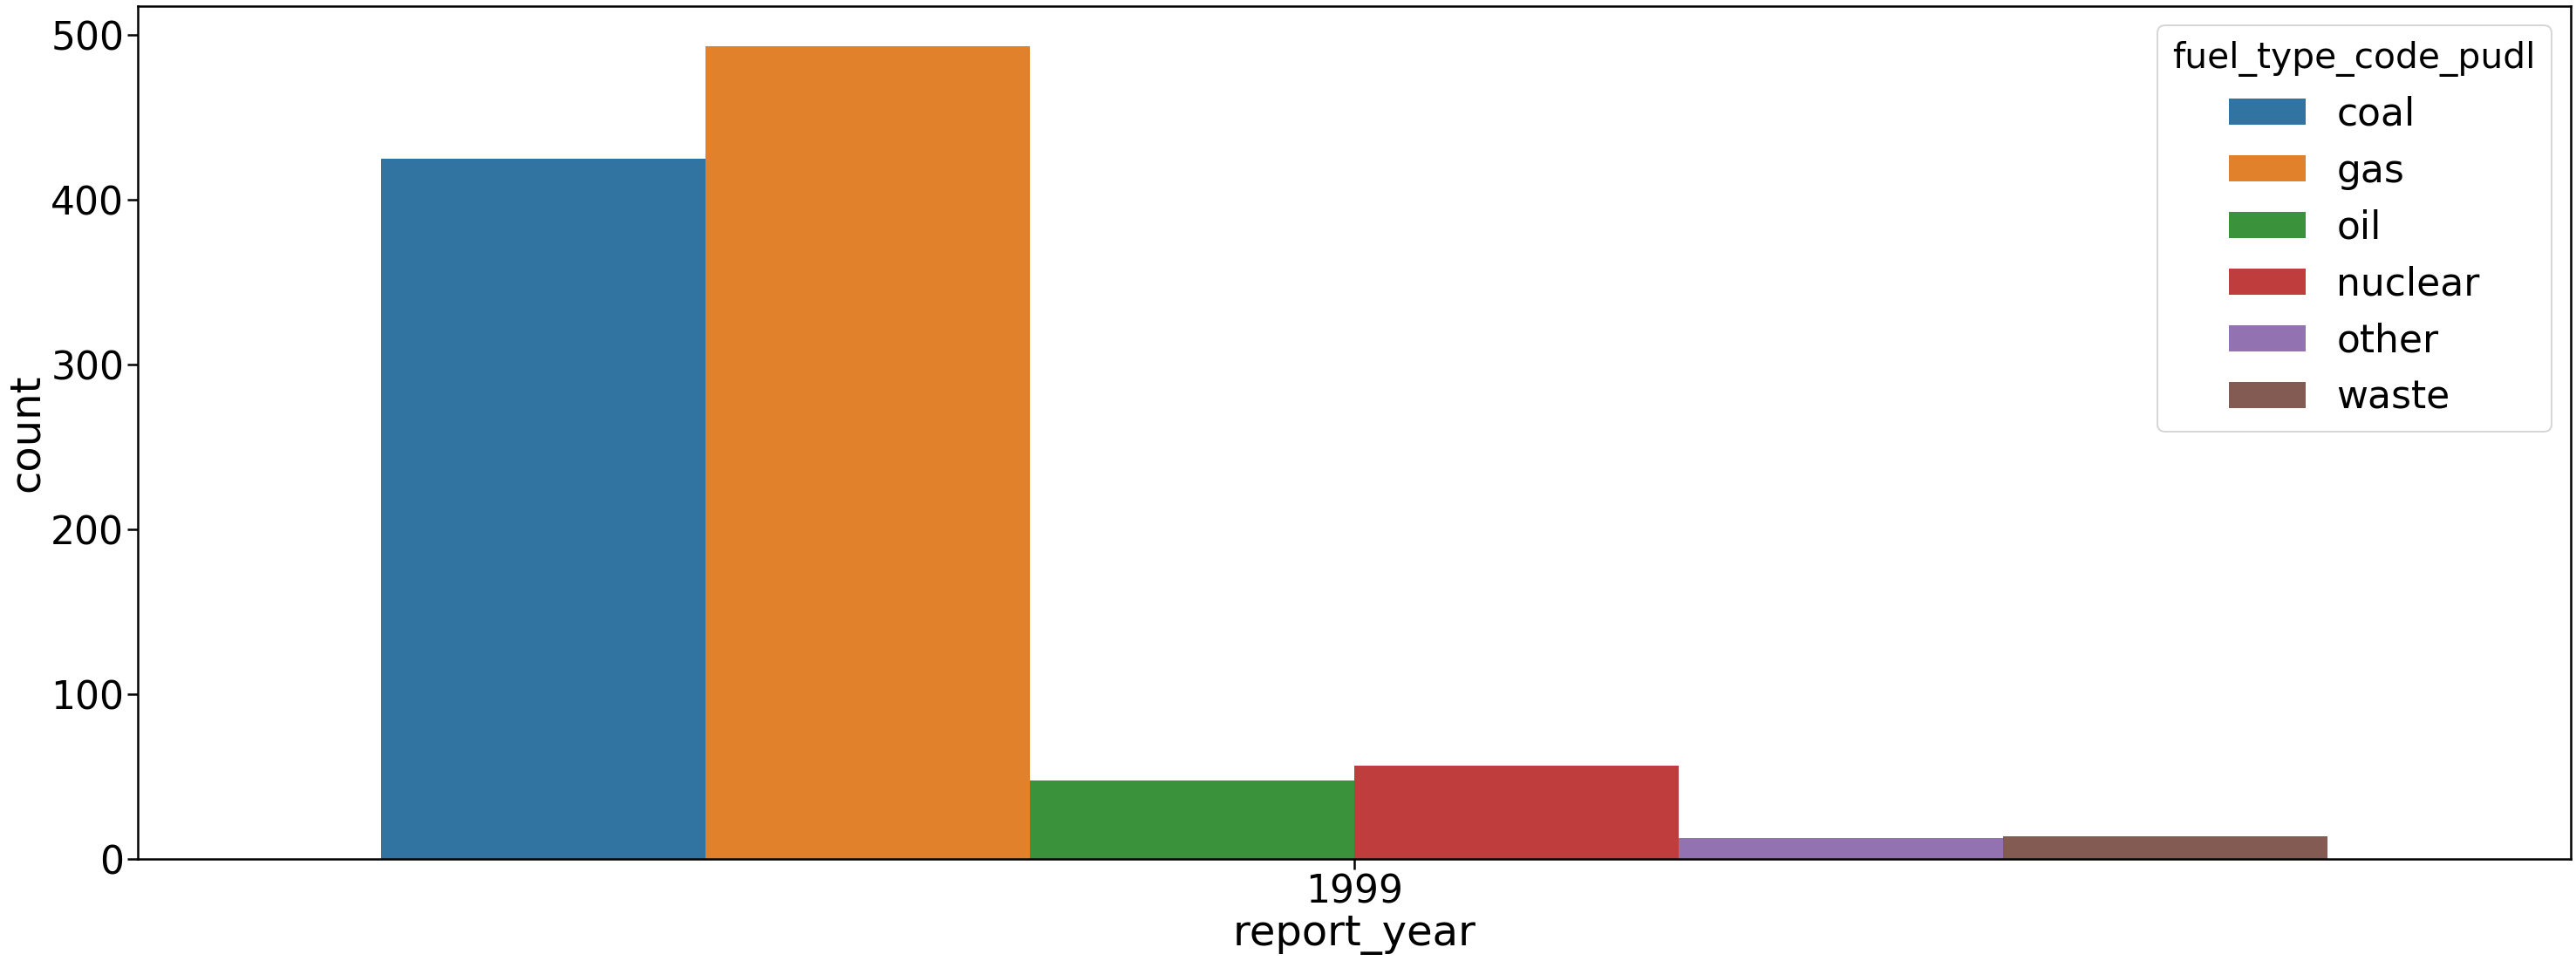




   ----------------------------------[]------------------------------------------------         


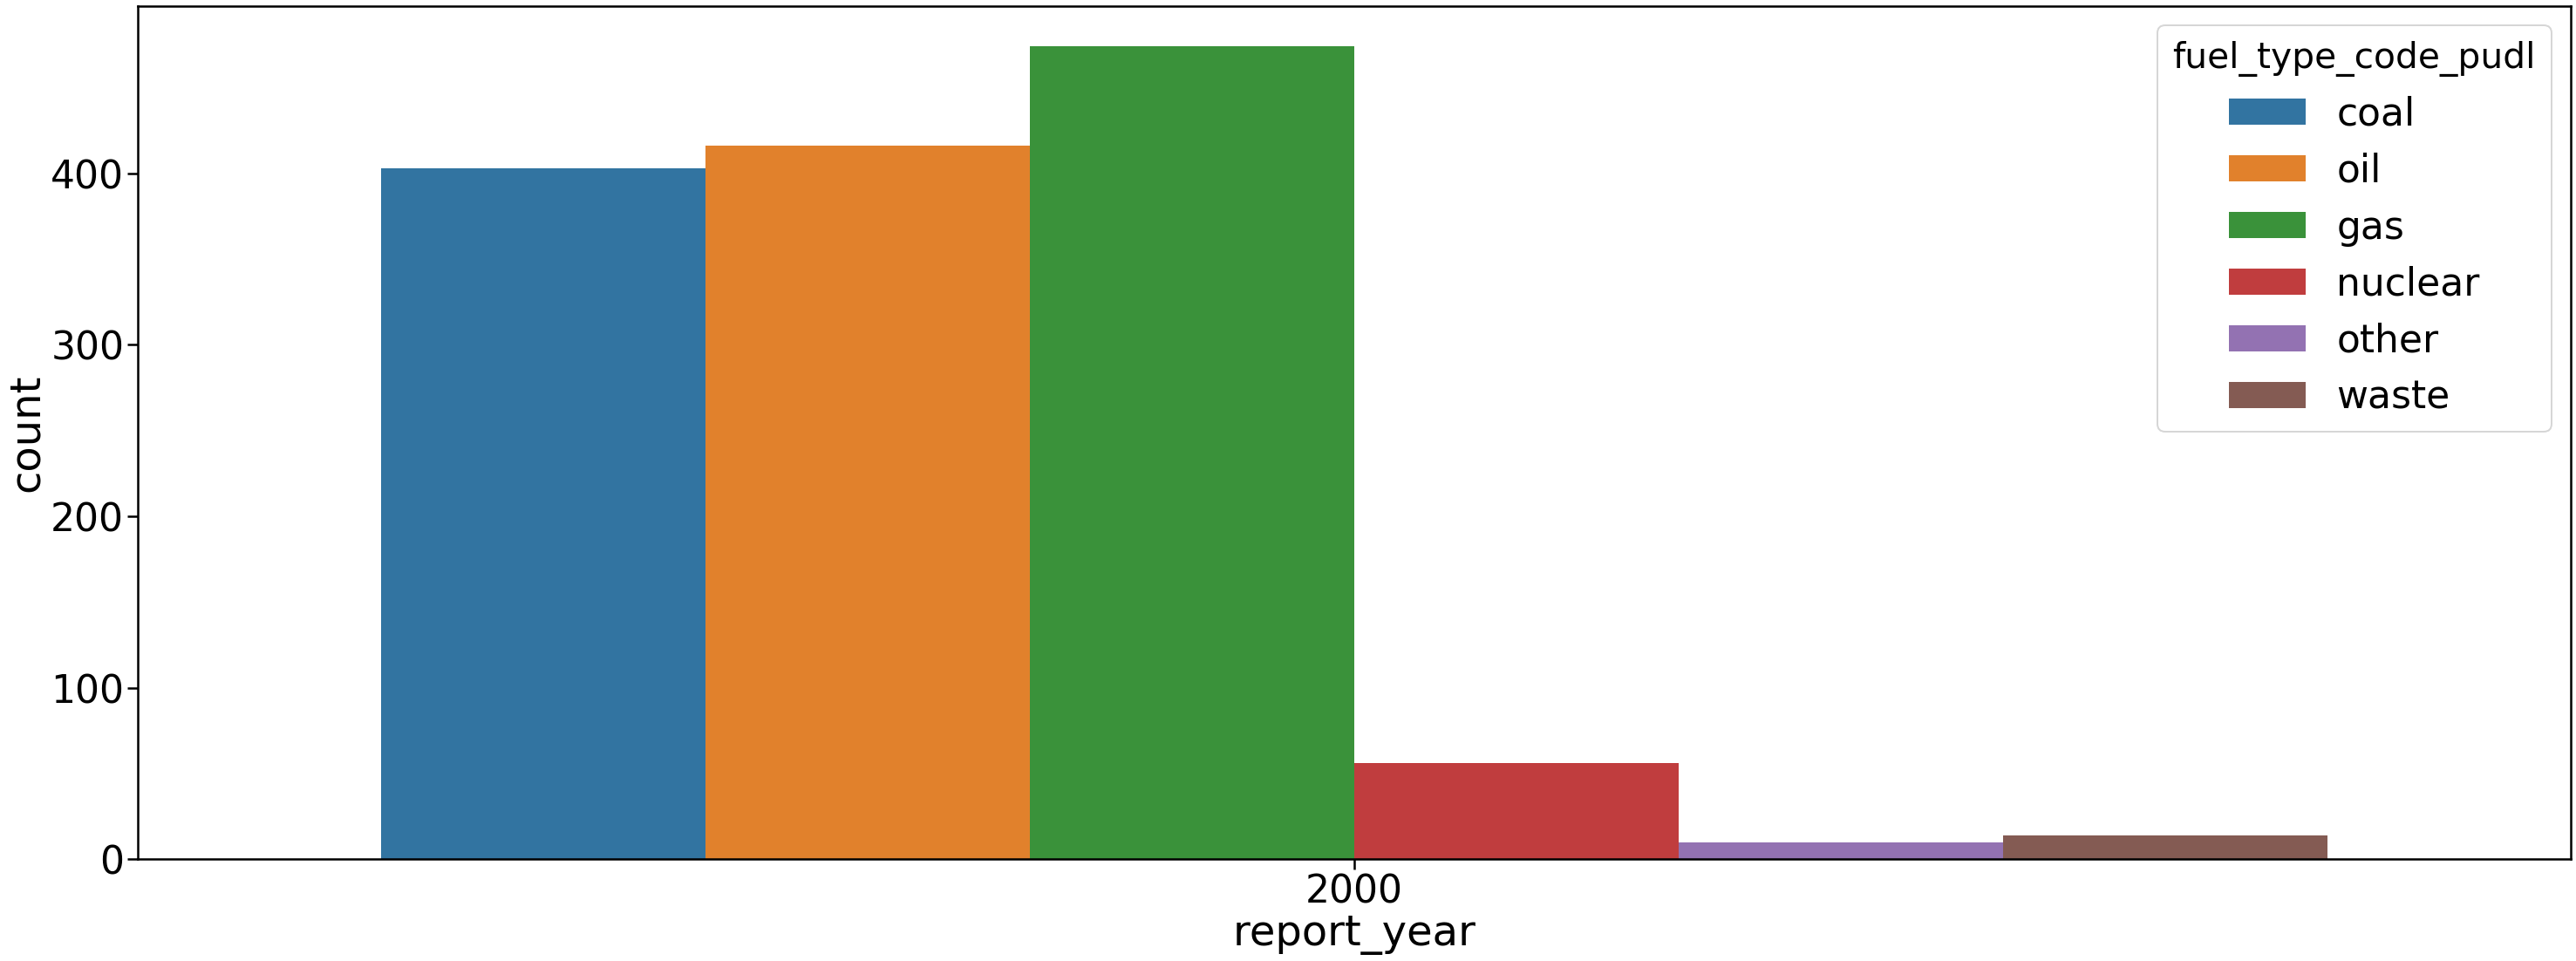




   ----------------------------------[]------------------------------------------------         


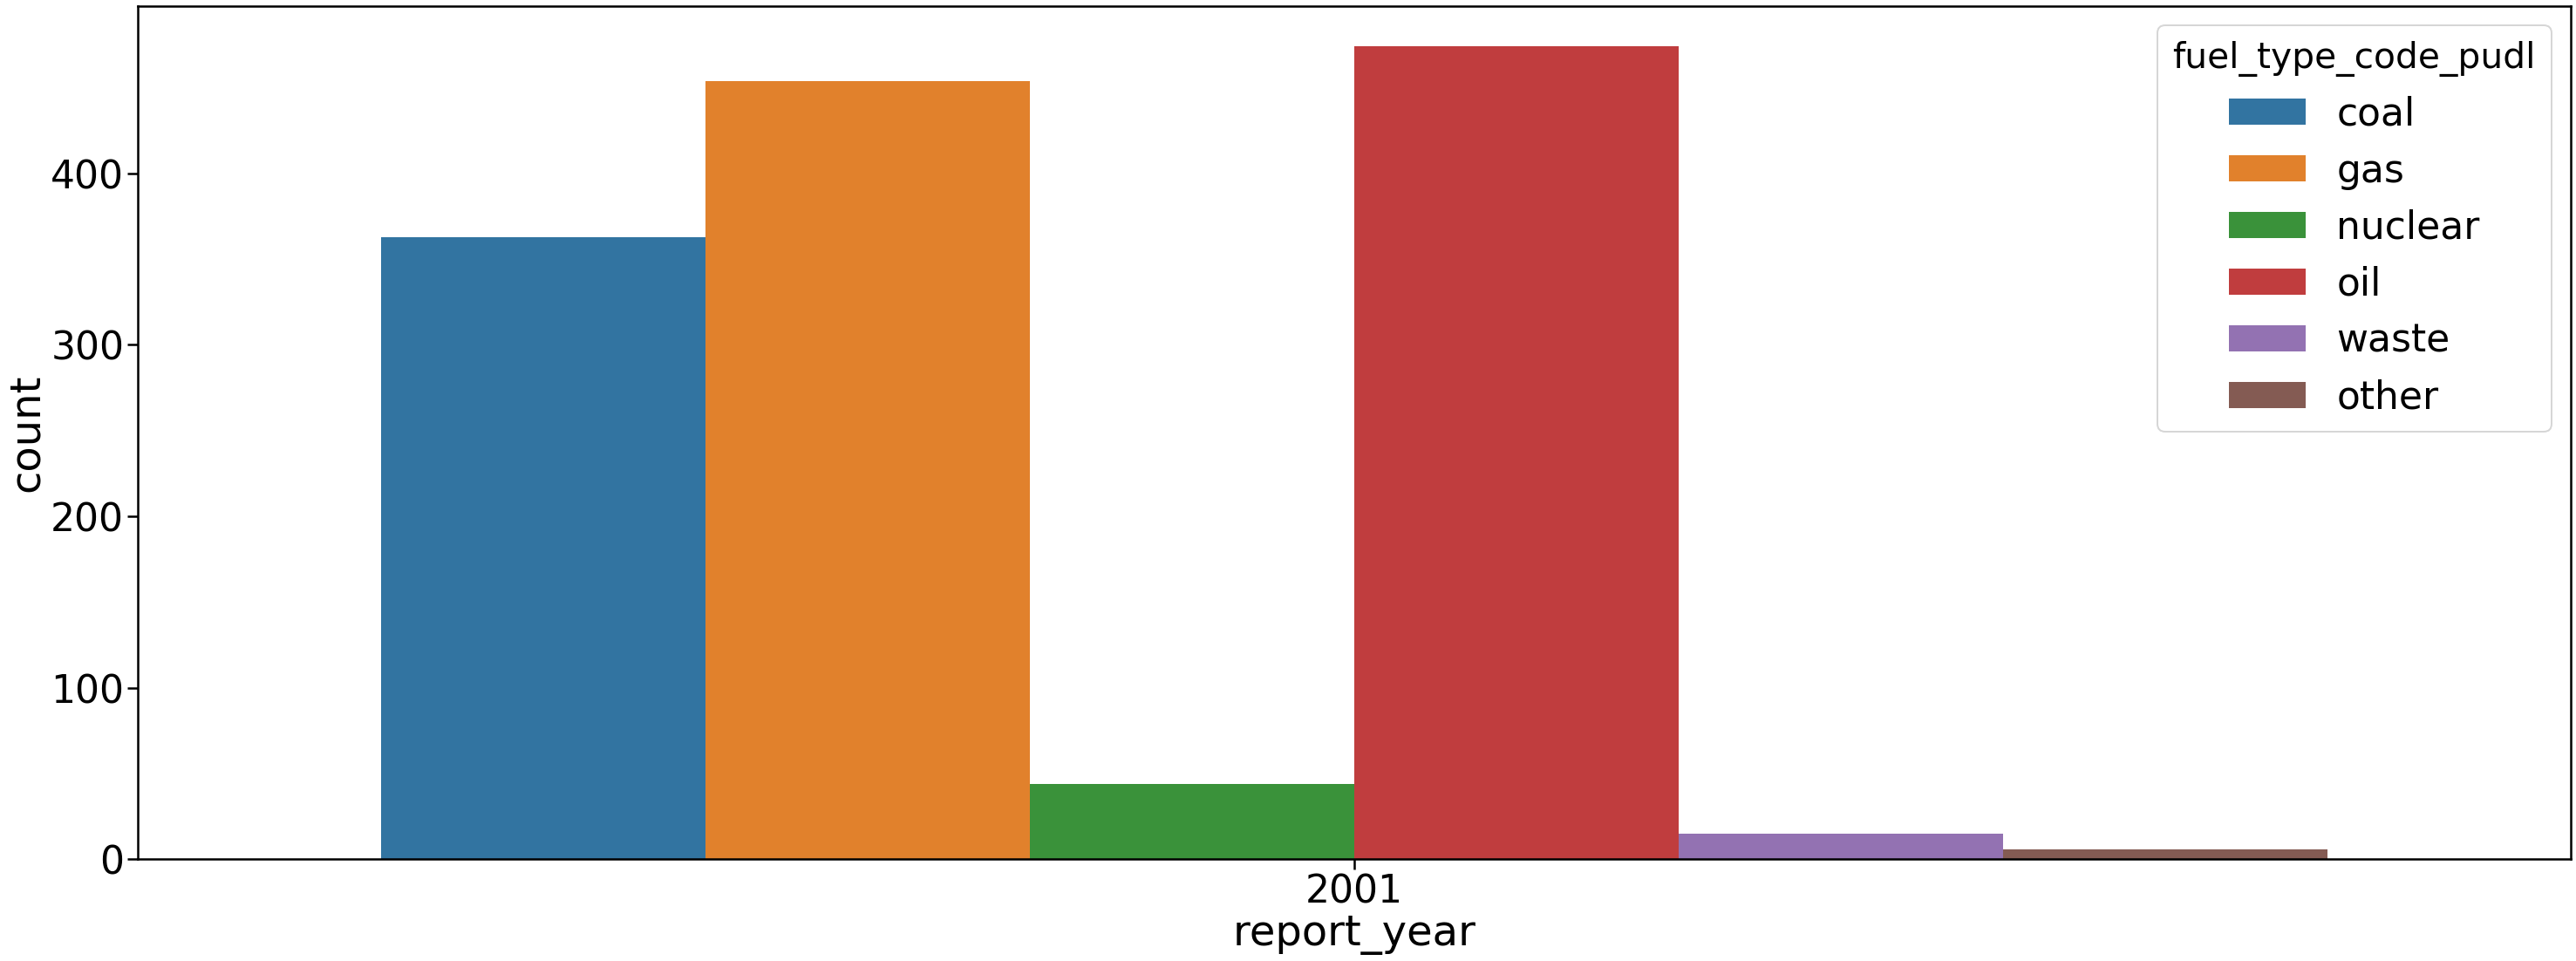




   ----------------------------------[]------------------------------------------------         


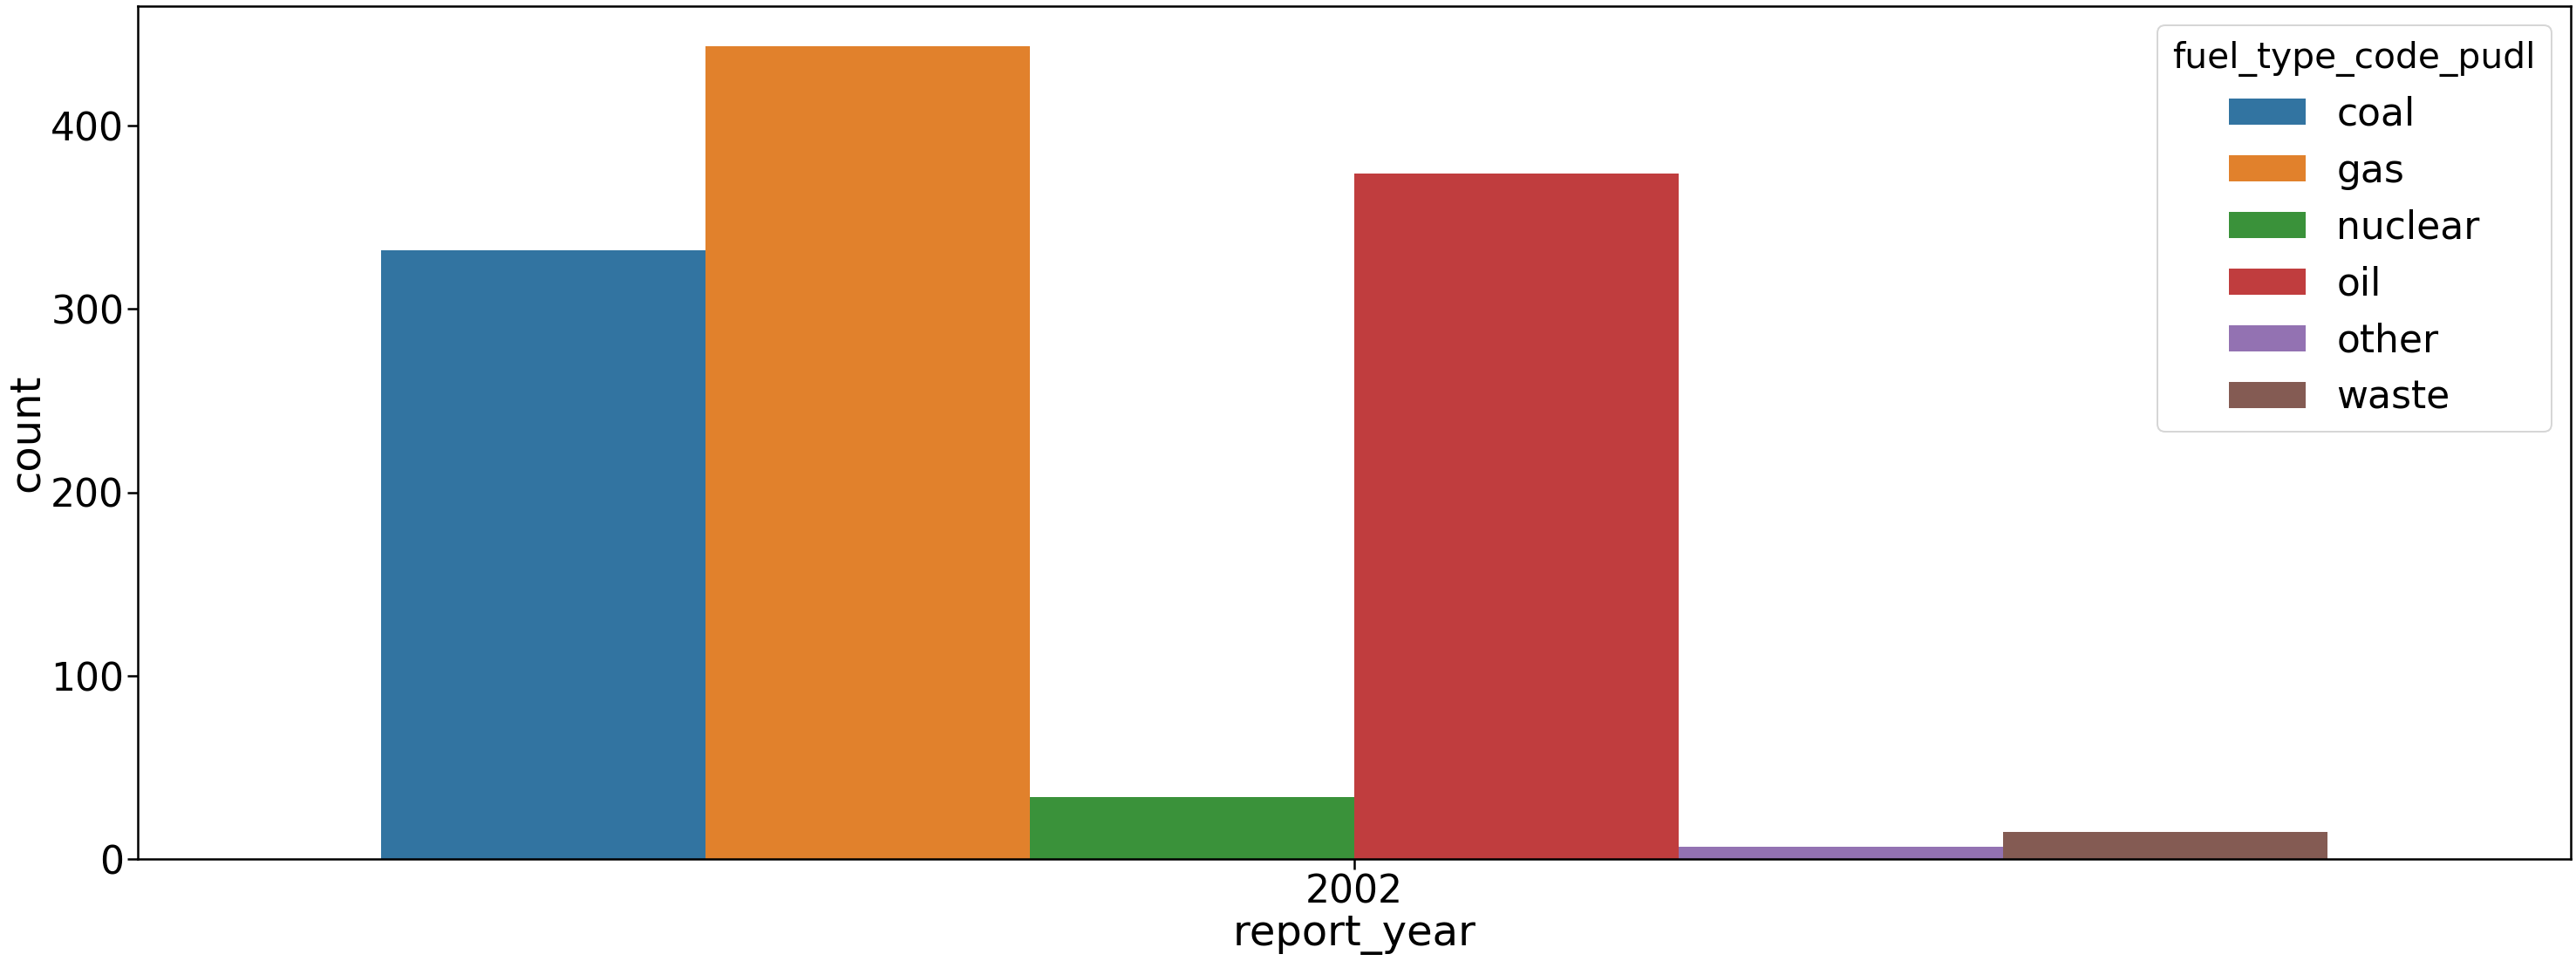




   ----------------------------------[]------------------------------------------------         


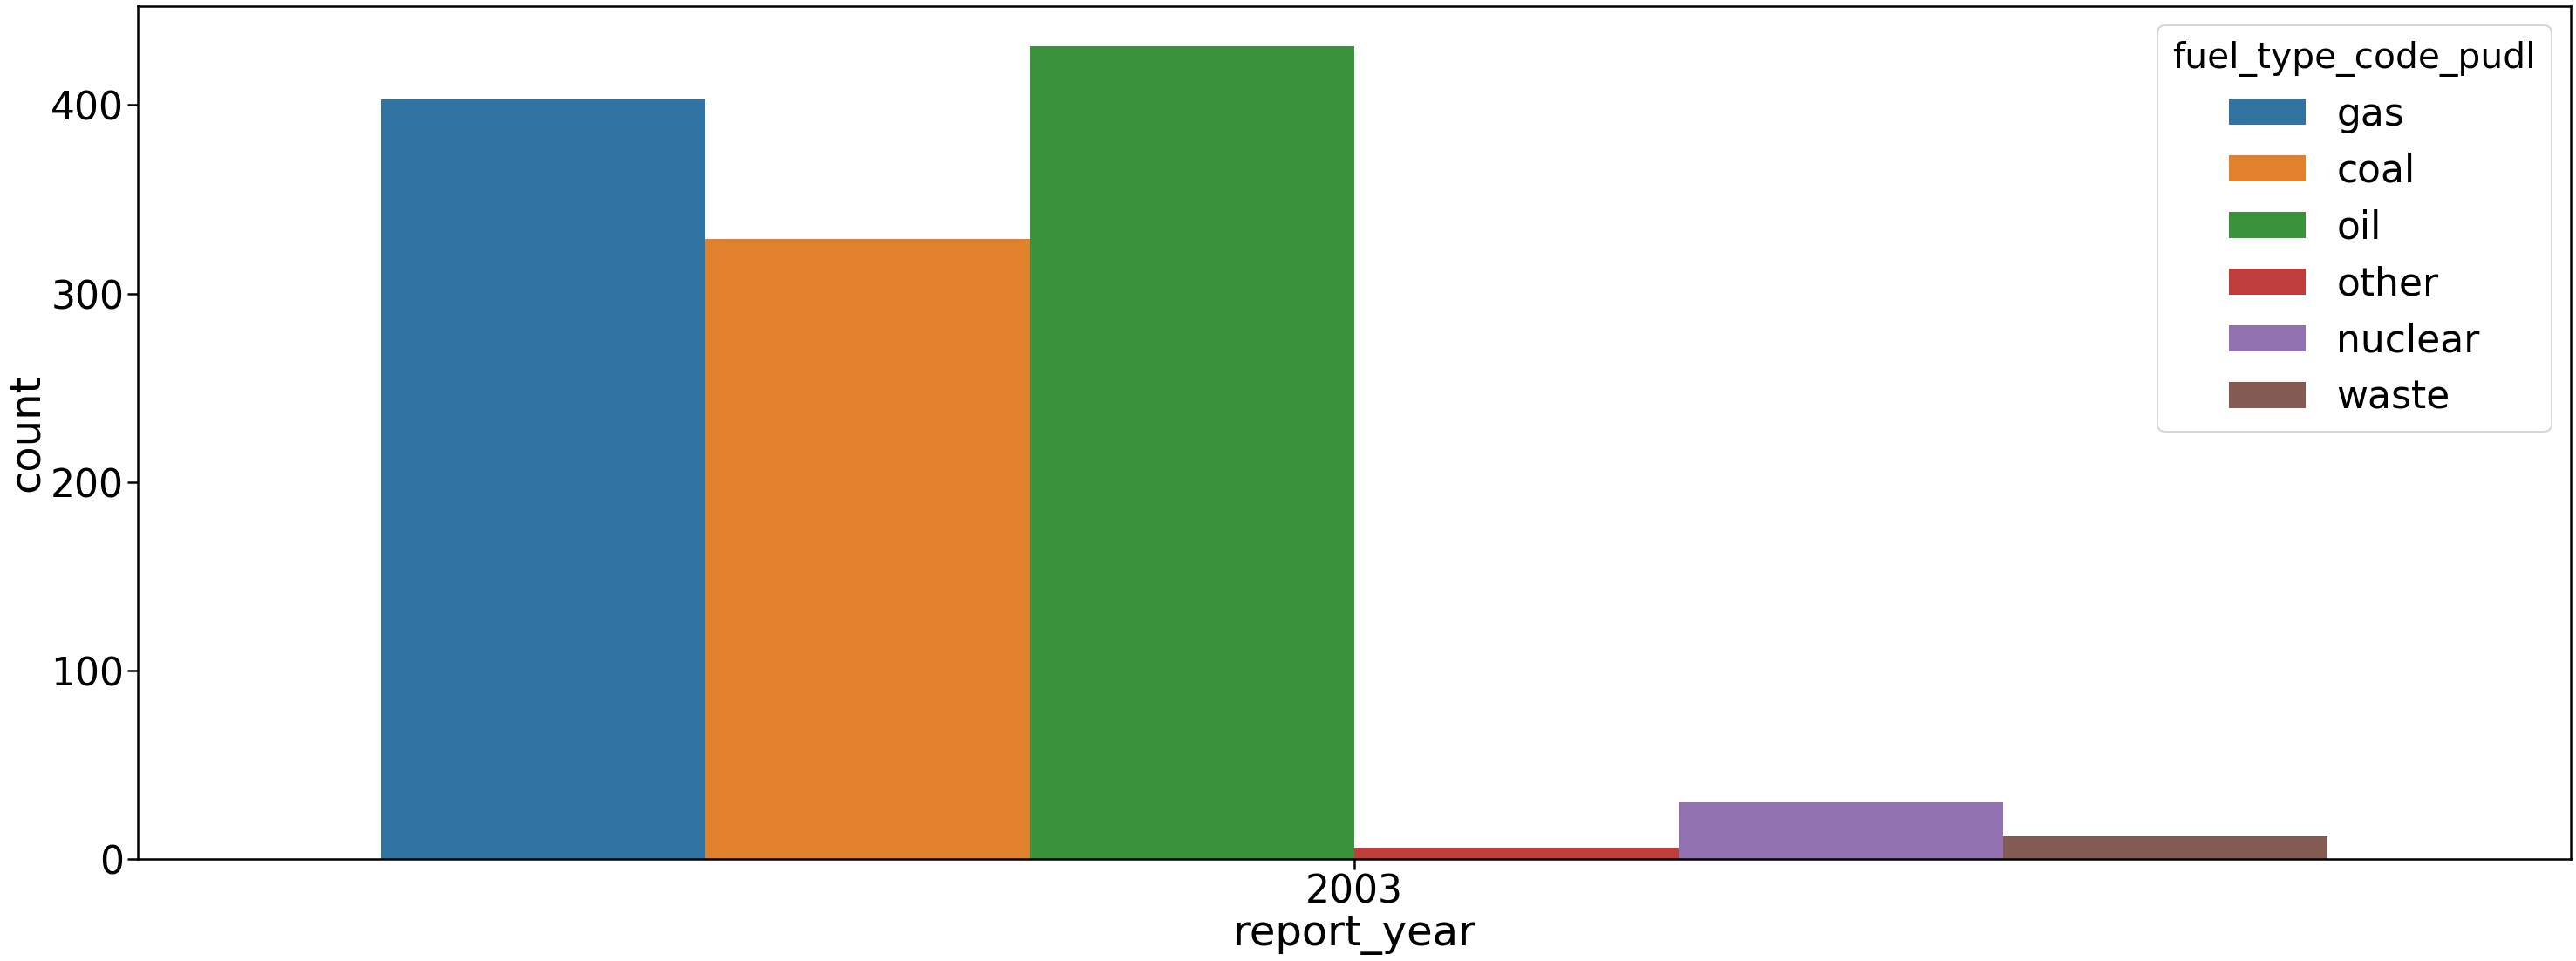




   ----------------------------------[]------------------------------------------------         


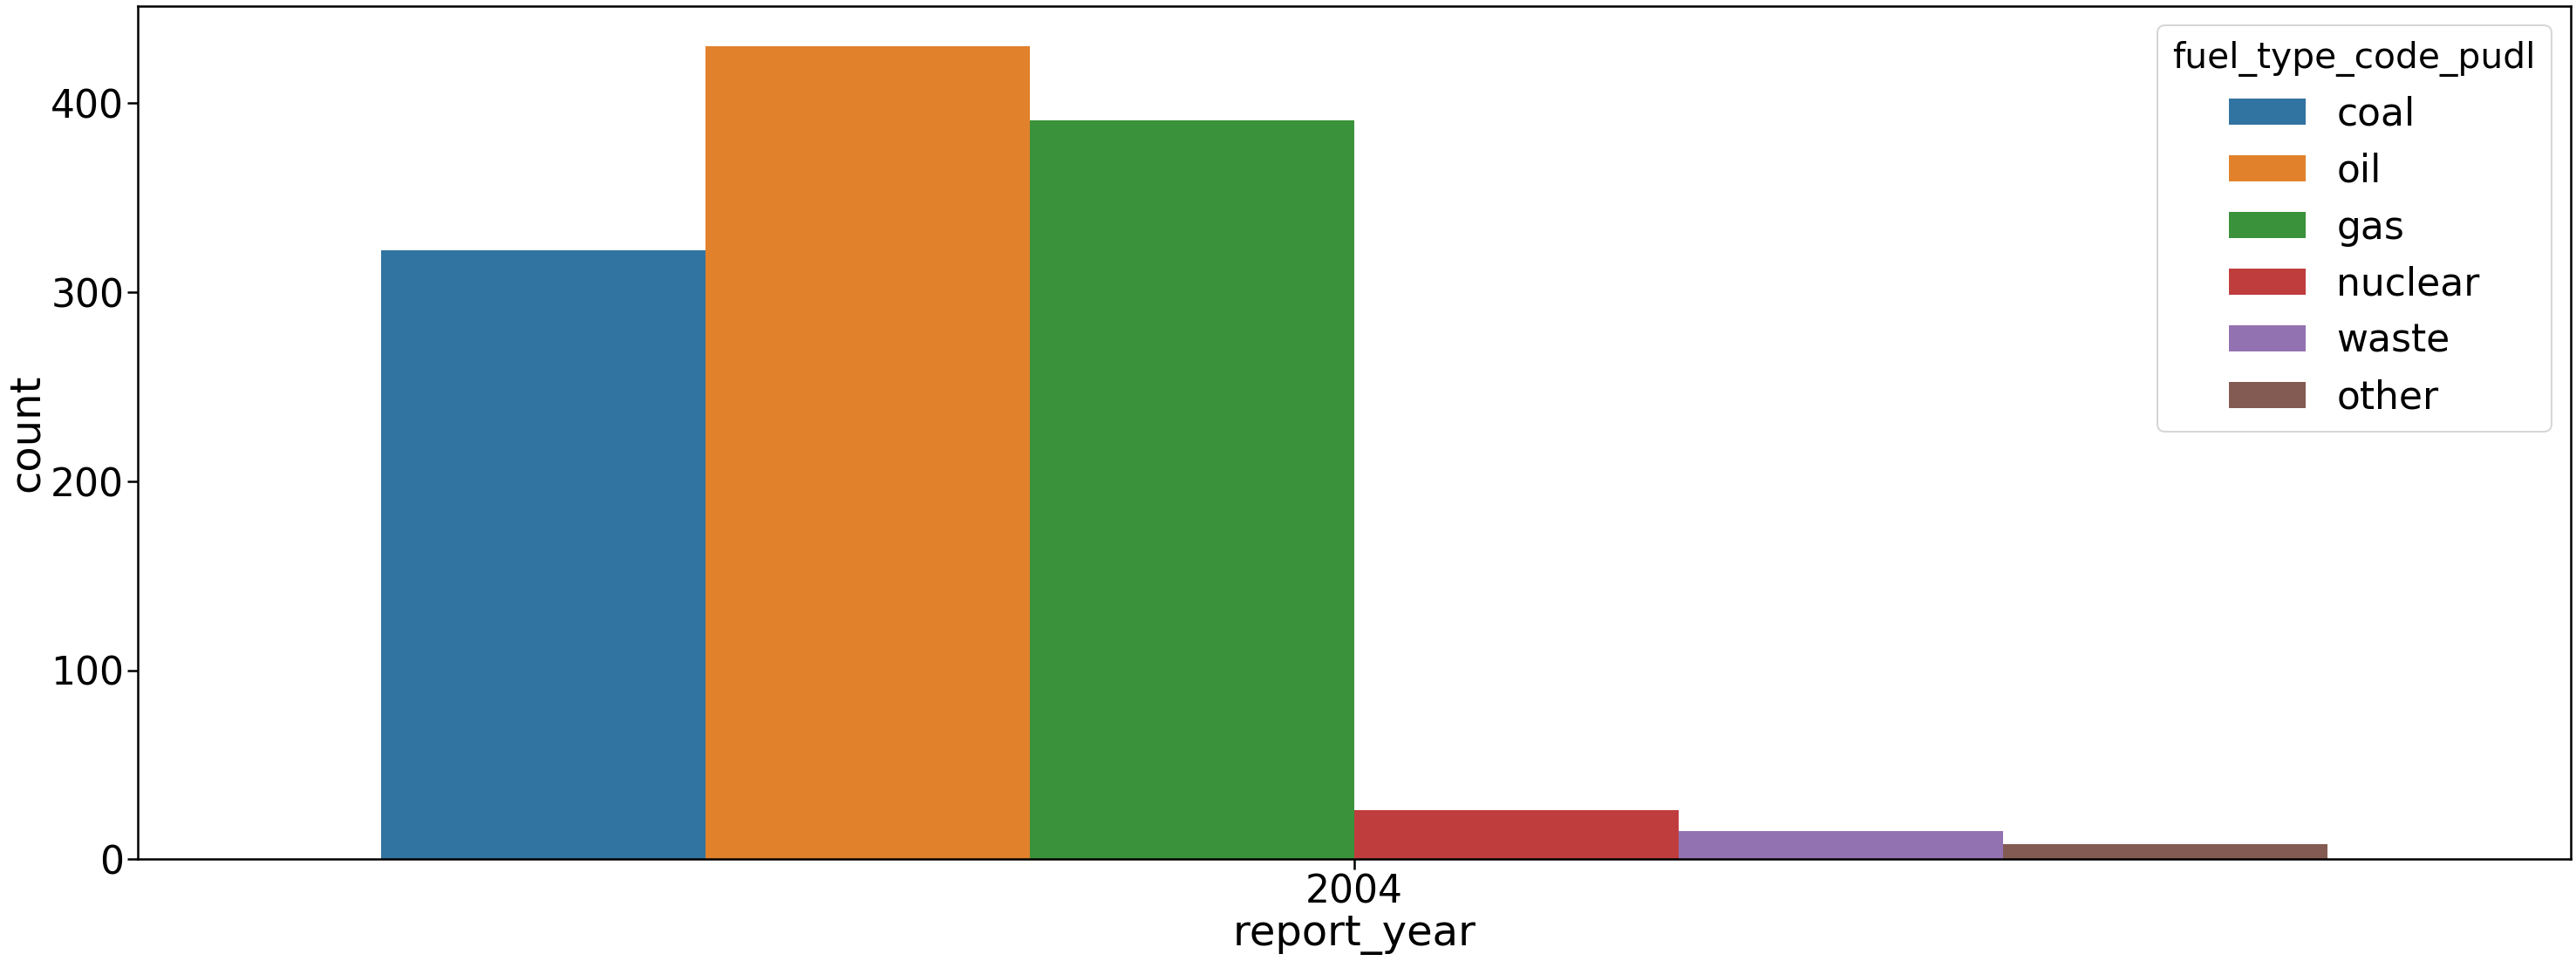




   ----------------------------------[]------------------------------------------------         


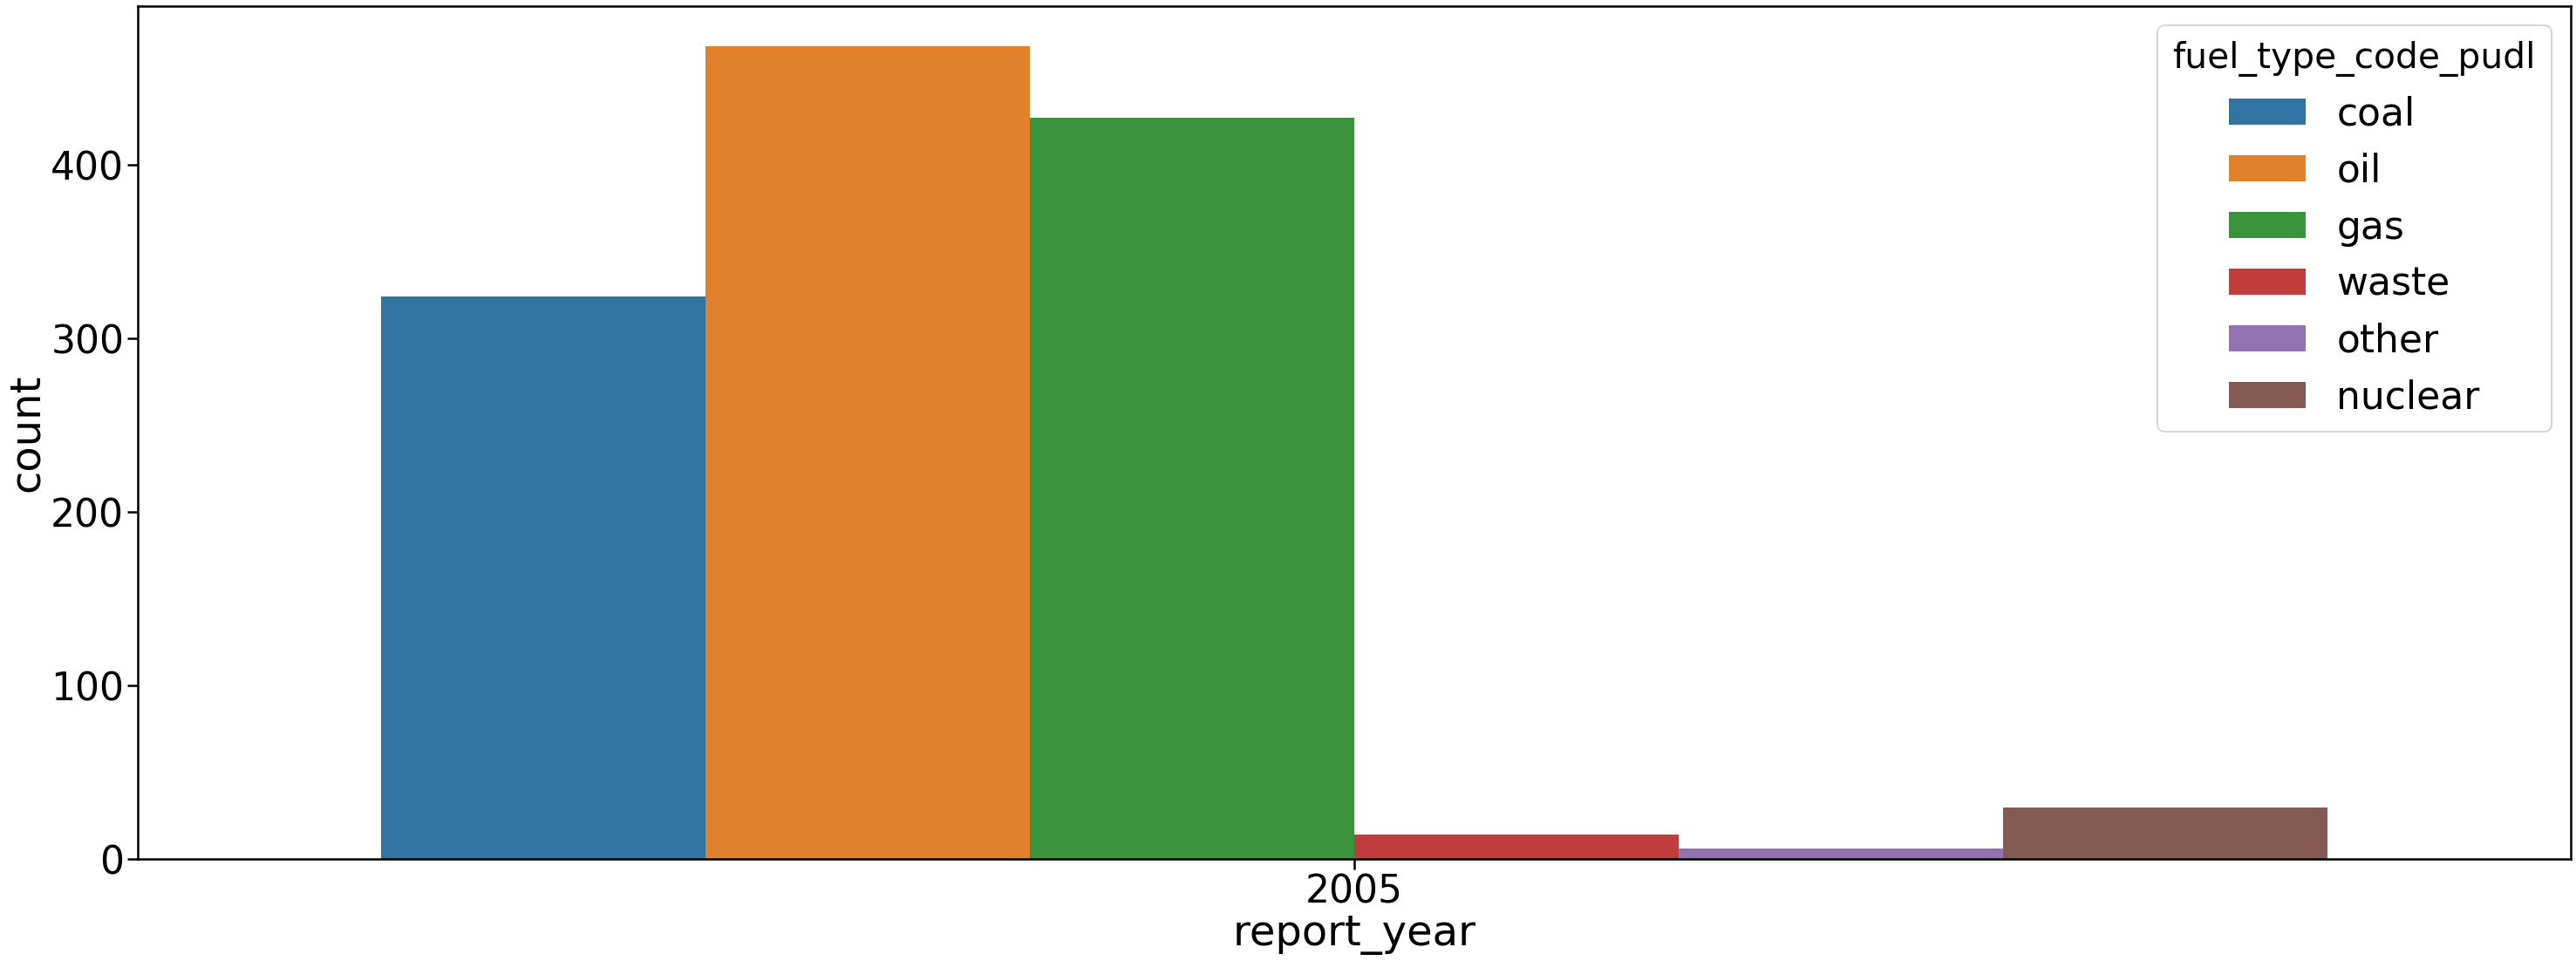




   ----------------------------------[]------------------------------------------------         


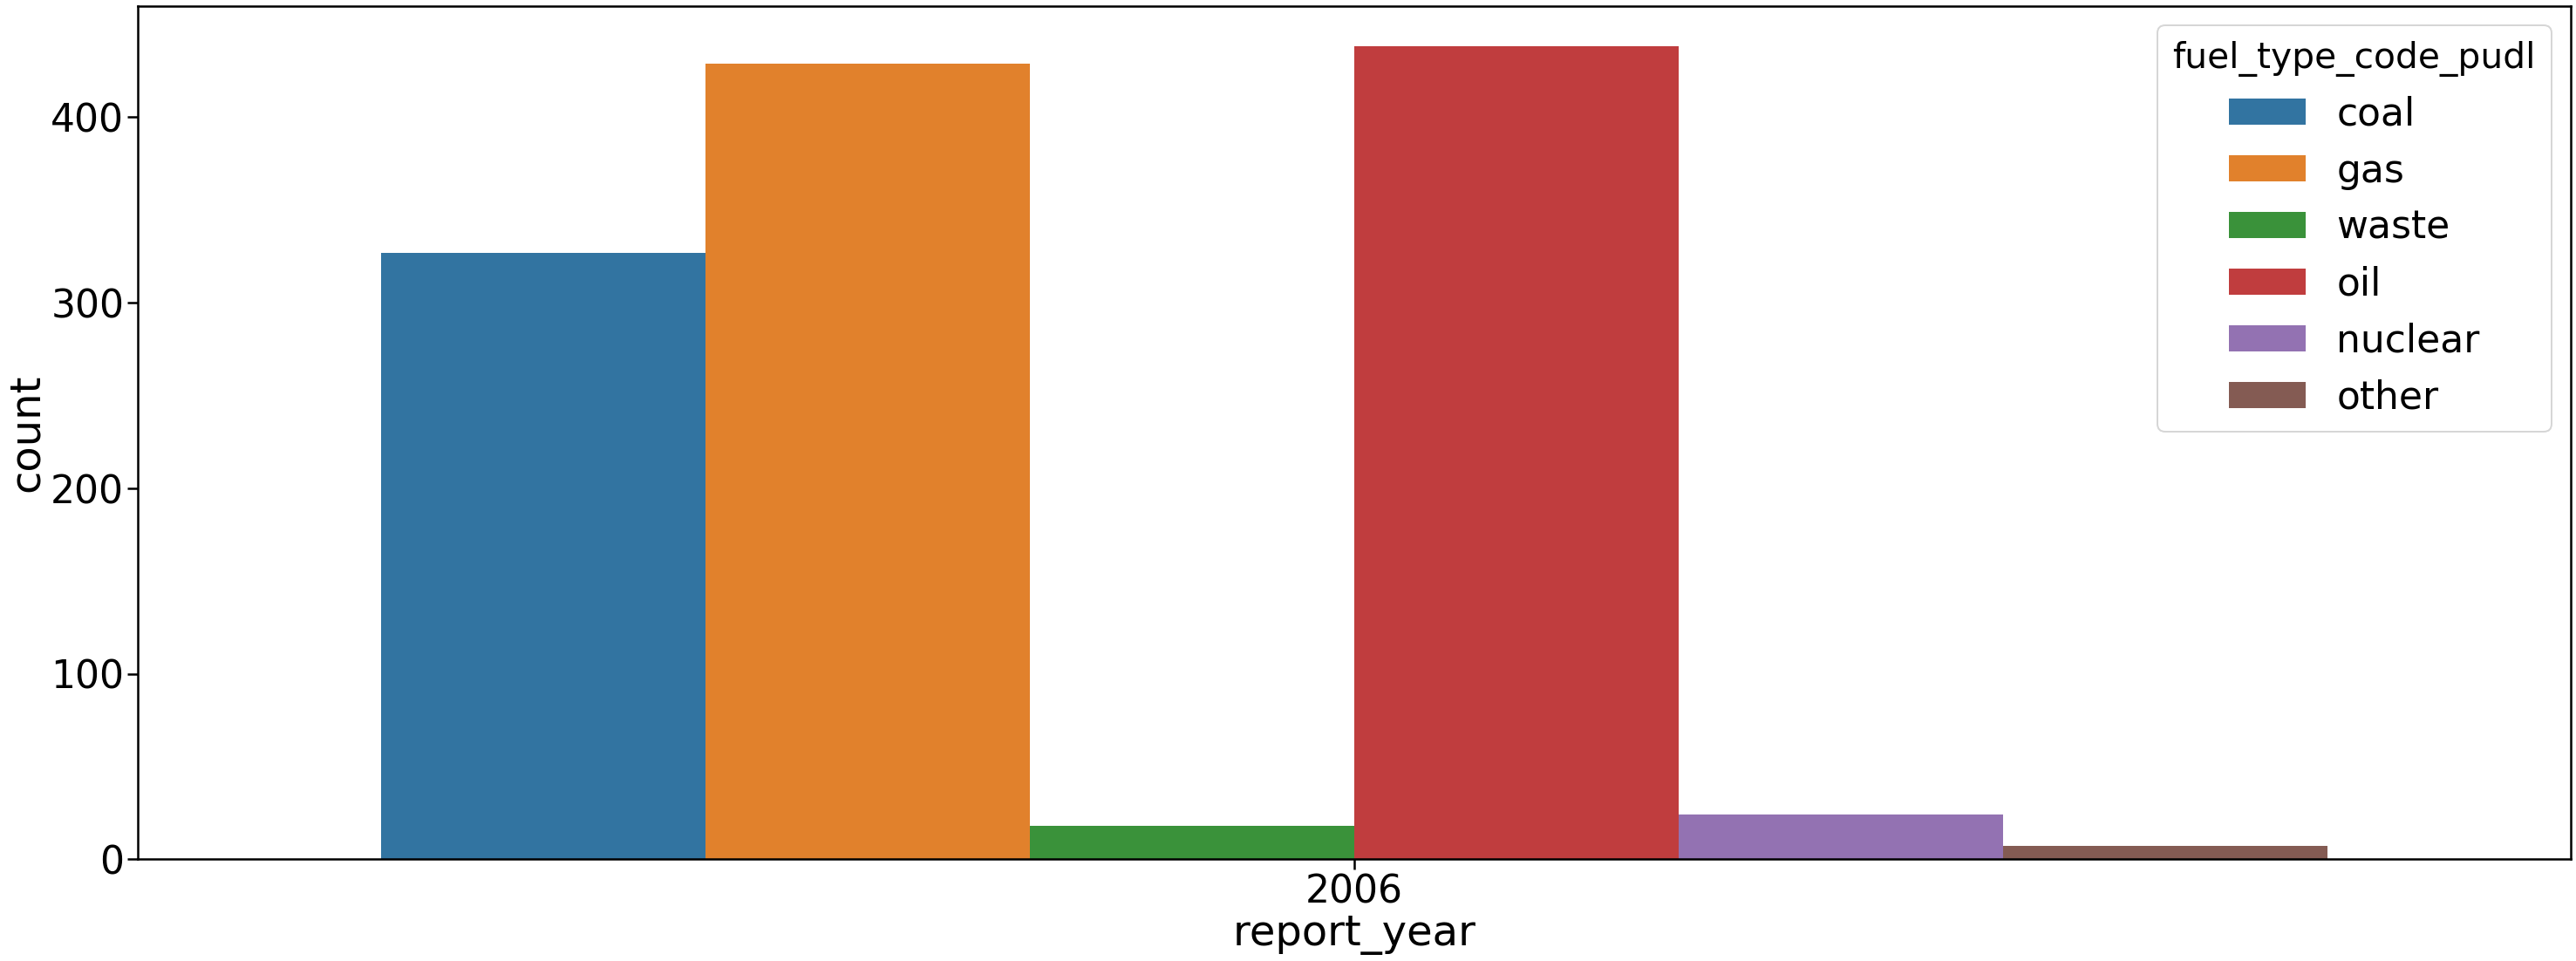




   ----------------------------------[]------------------------------------------------         


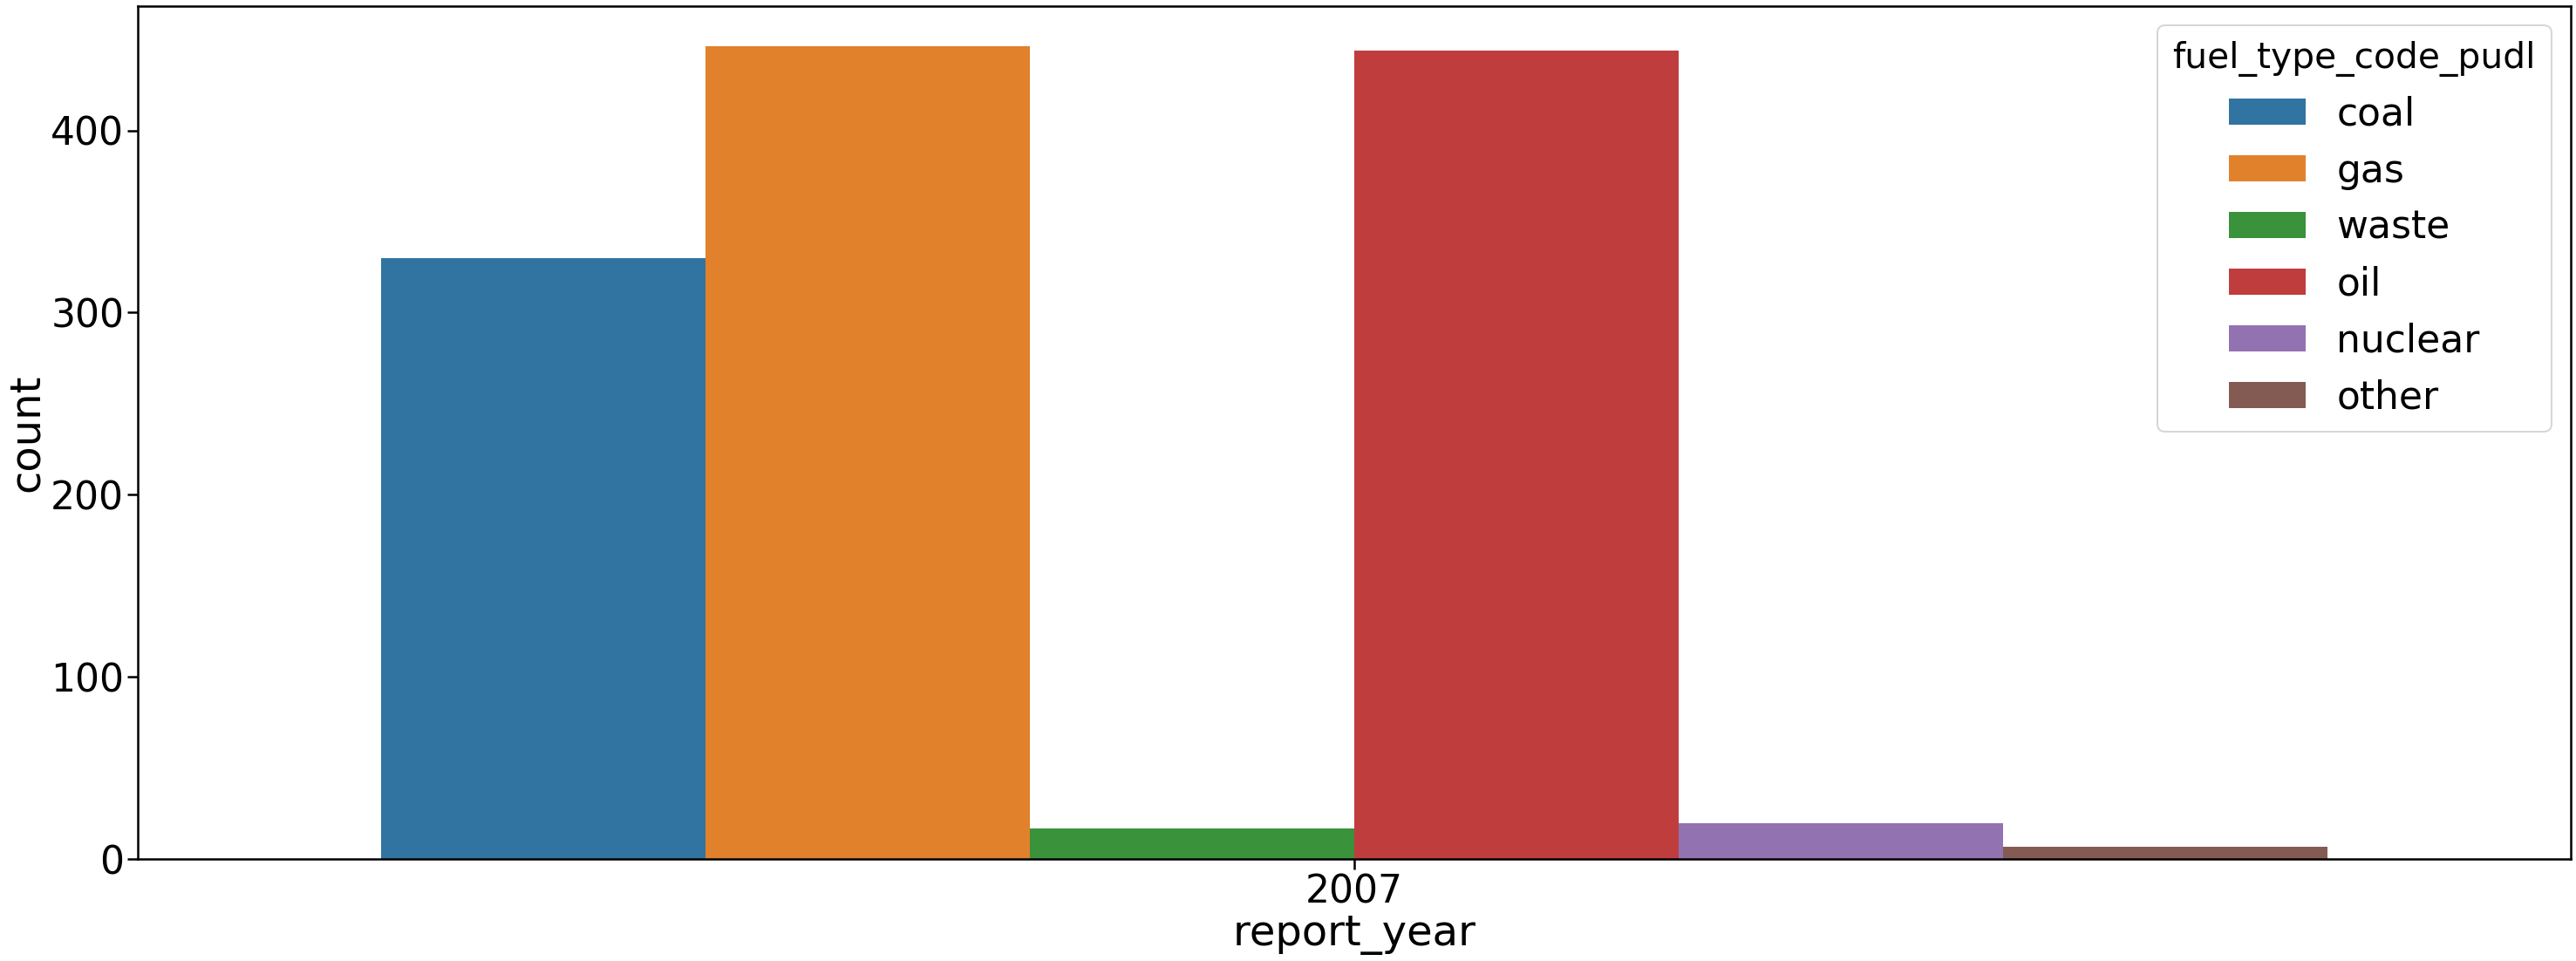




   ----------------------------------[]------------------------------------------------         


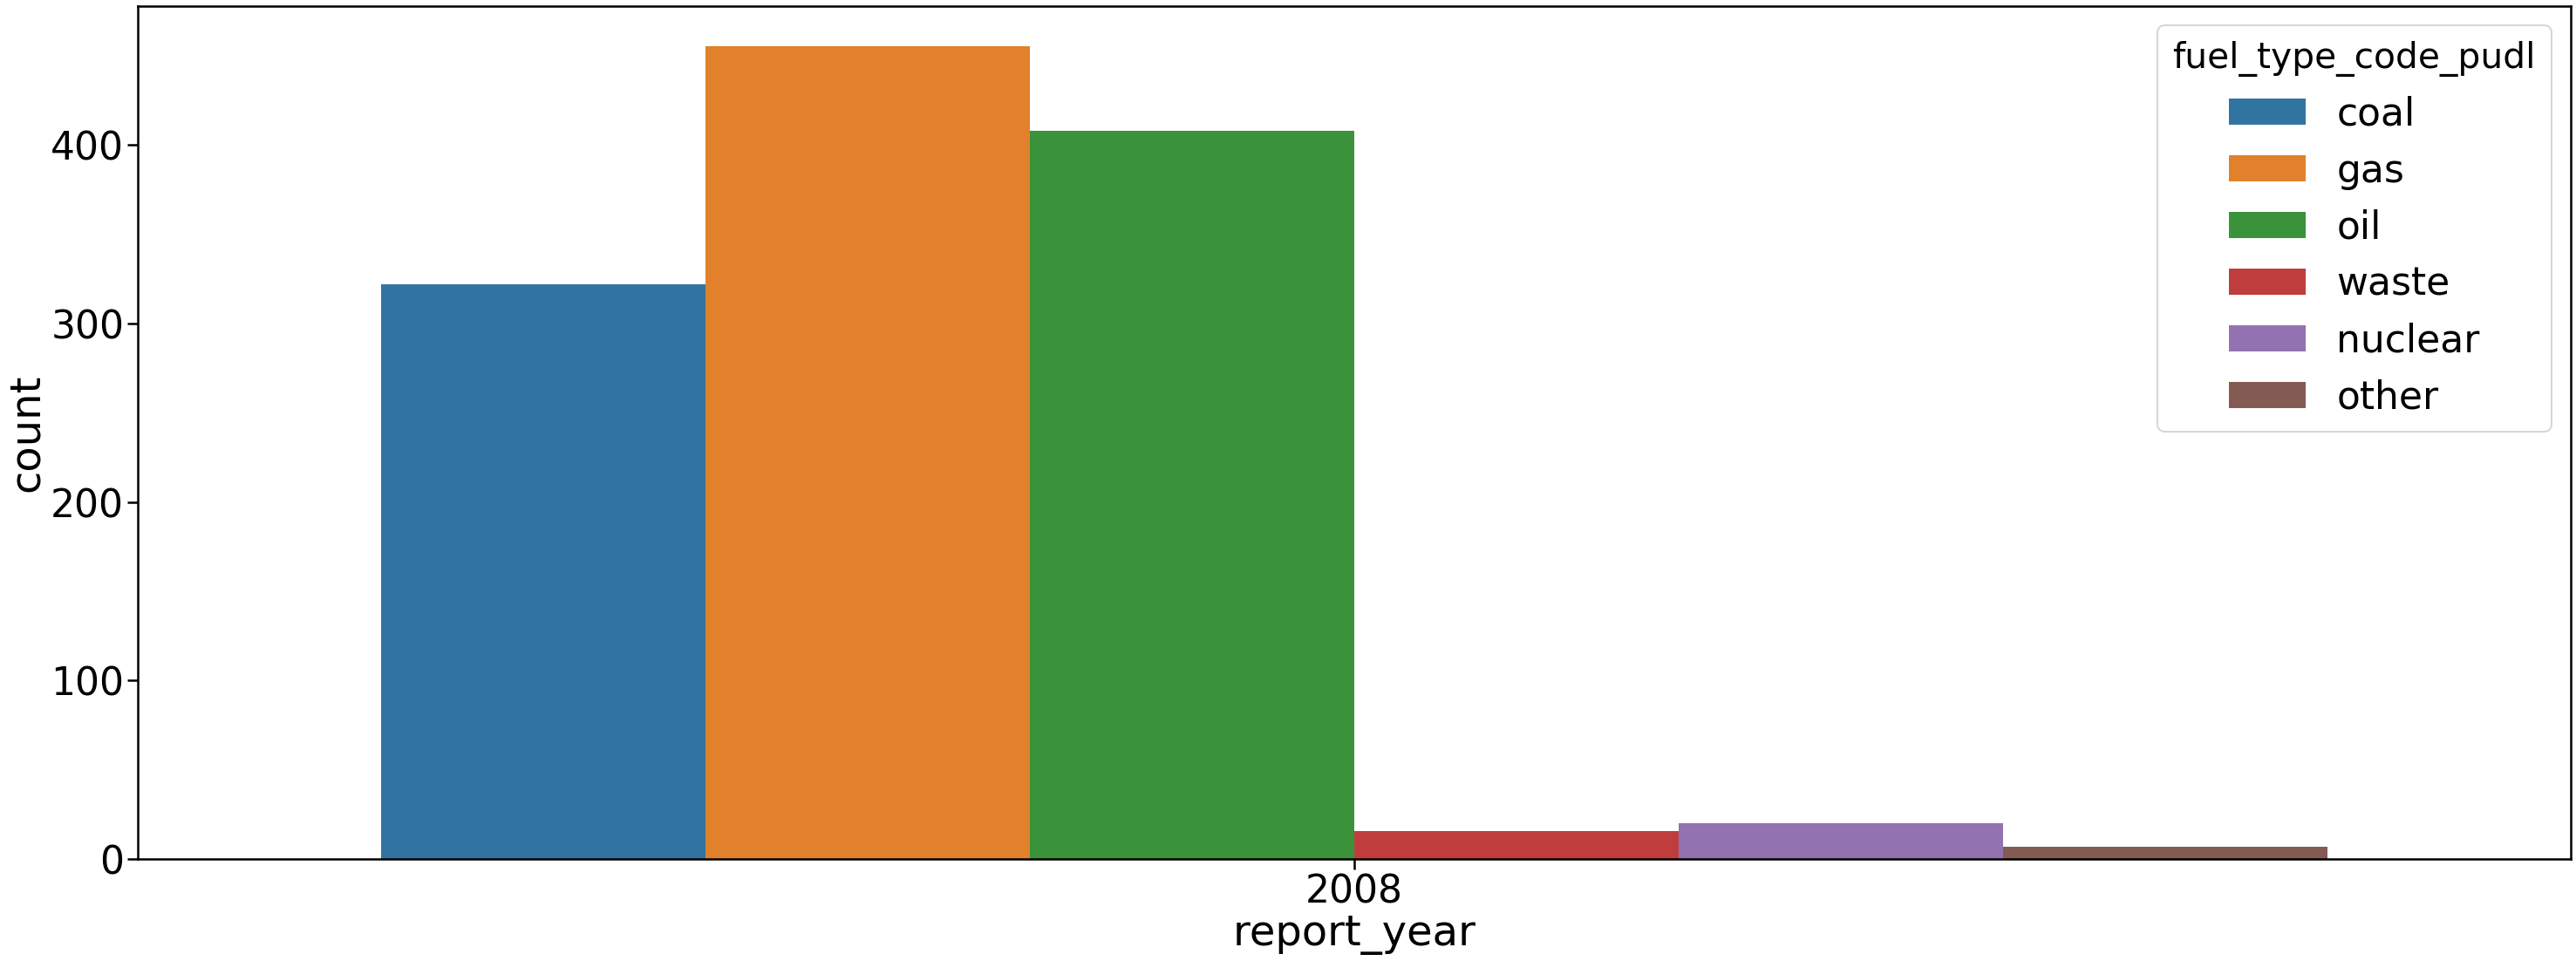




   ----------------------------------[]------------------------------------------------         


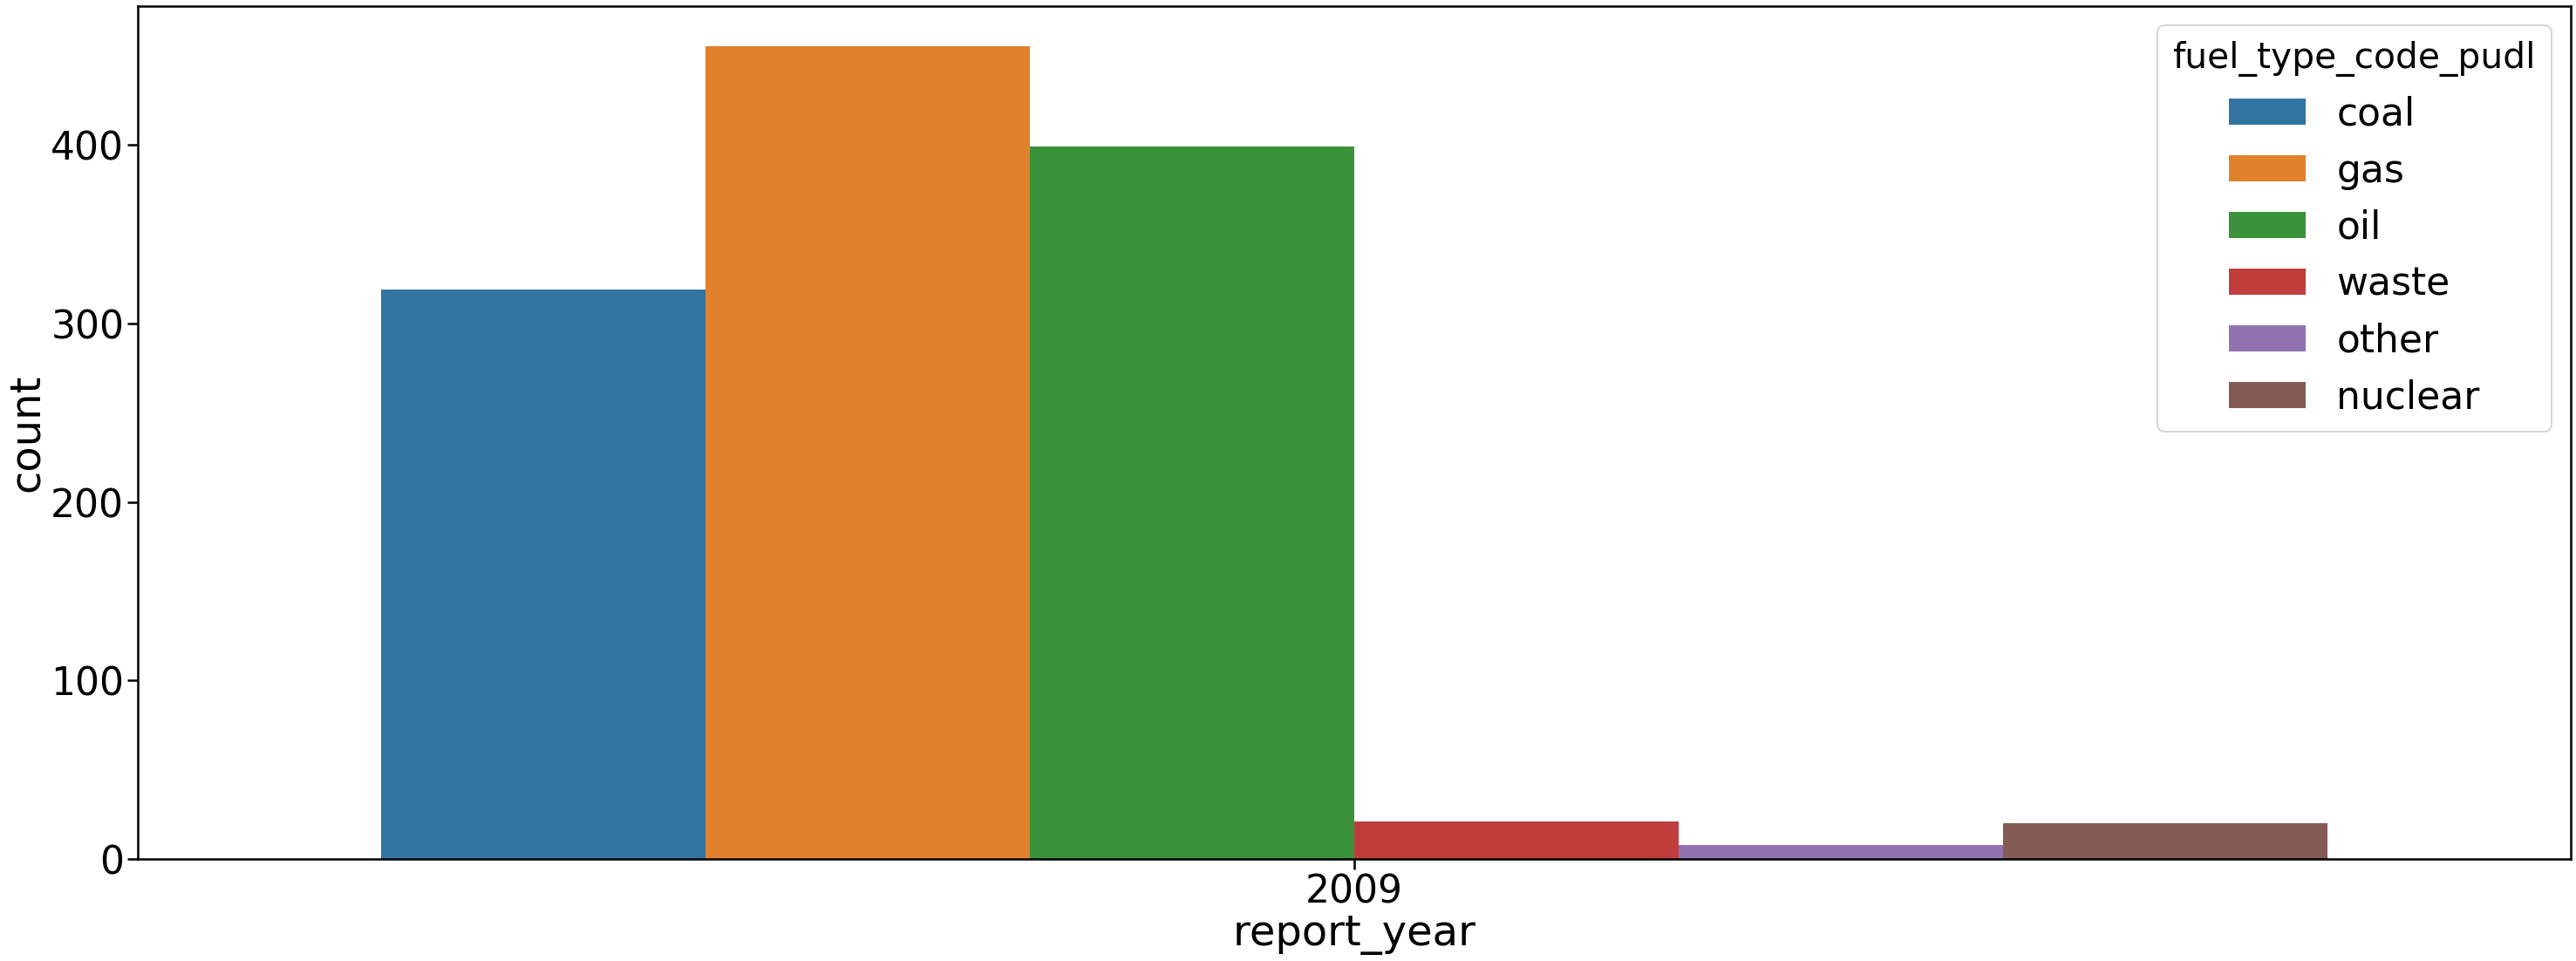




   ----------------------------------[]------------------------------------------------         


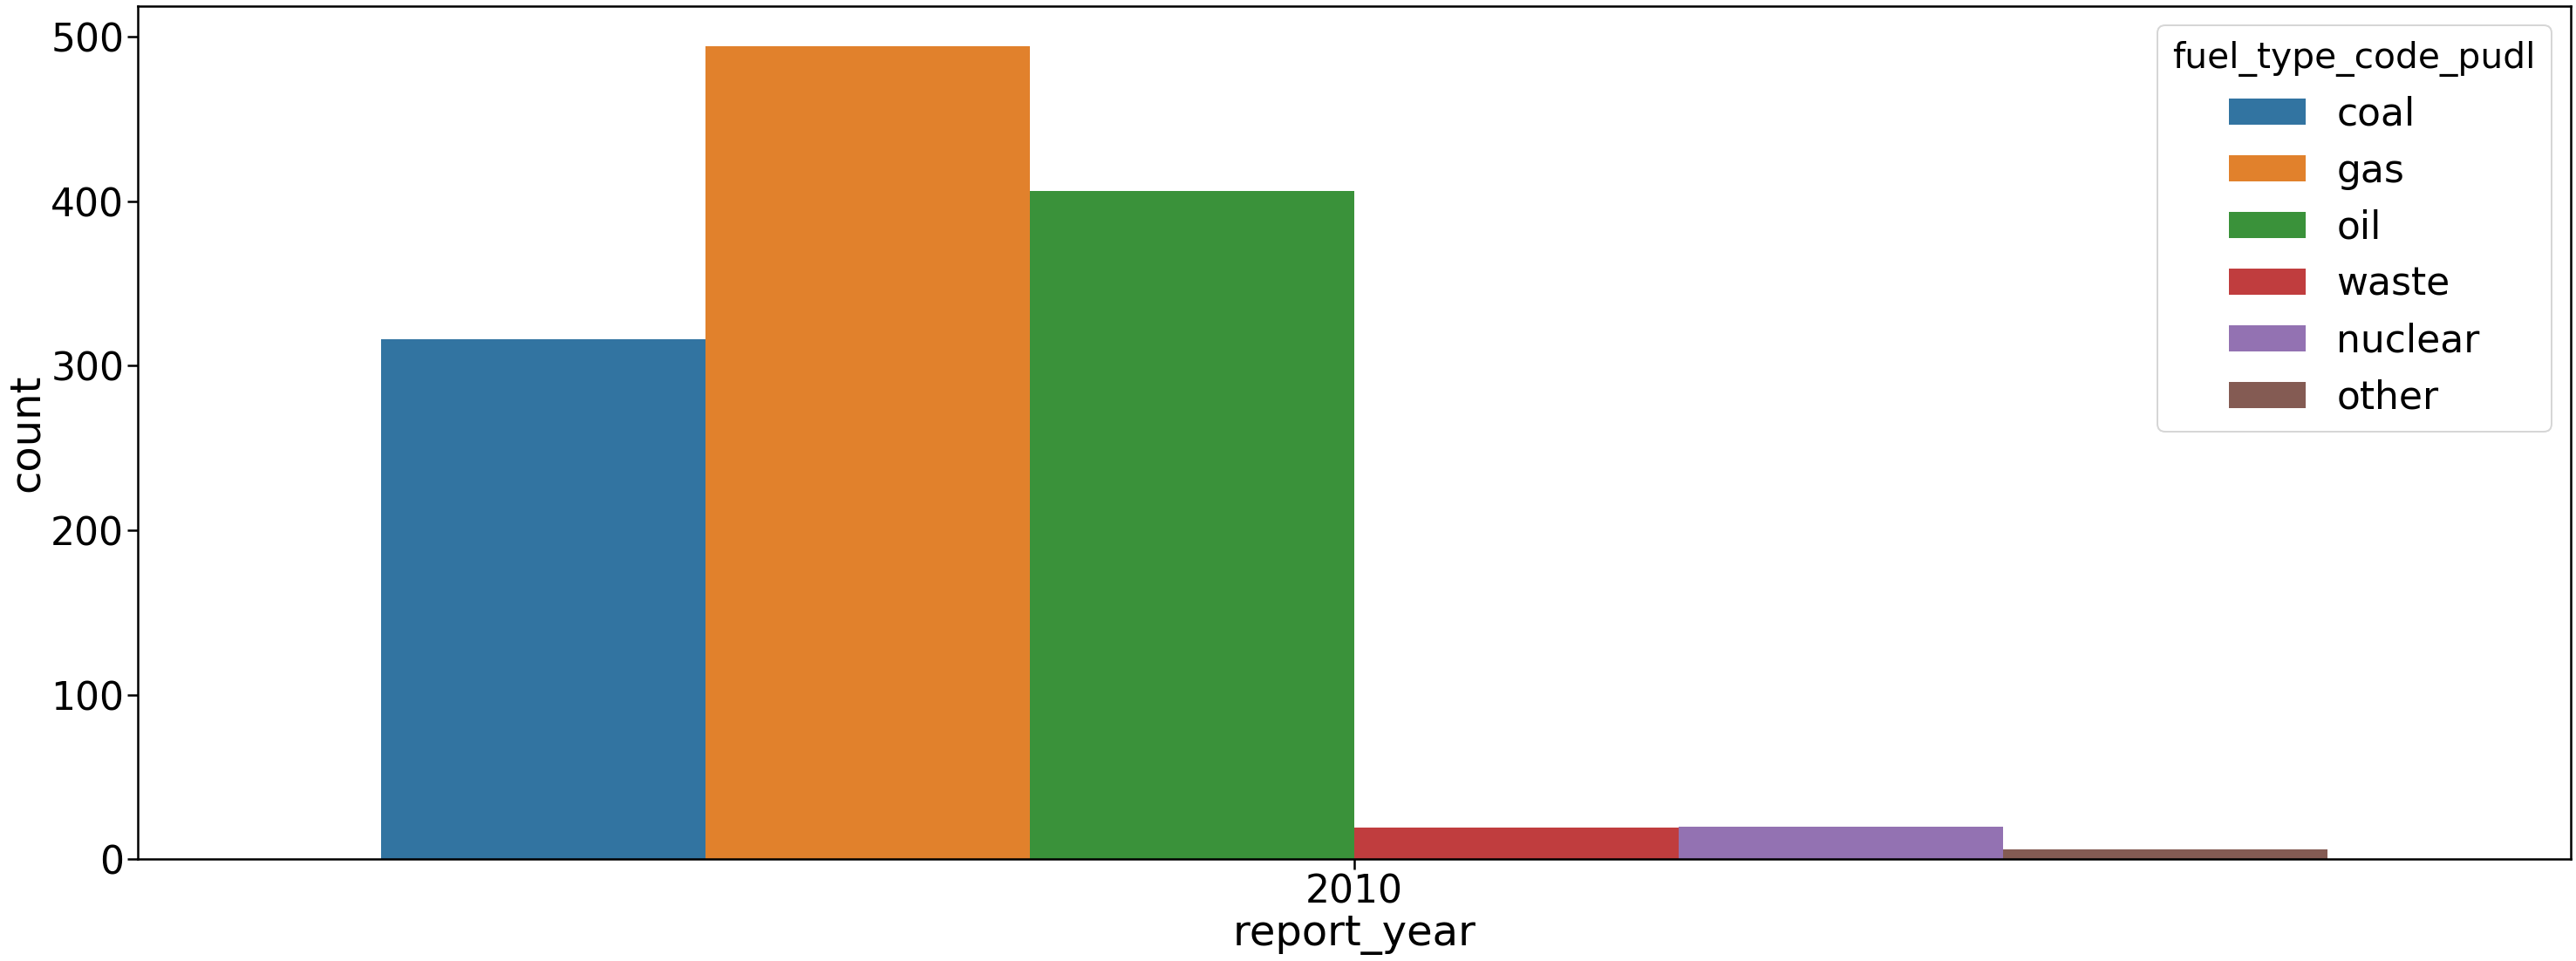




   ----------------------------------[]------------------------------------------------         


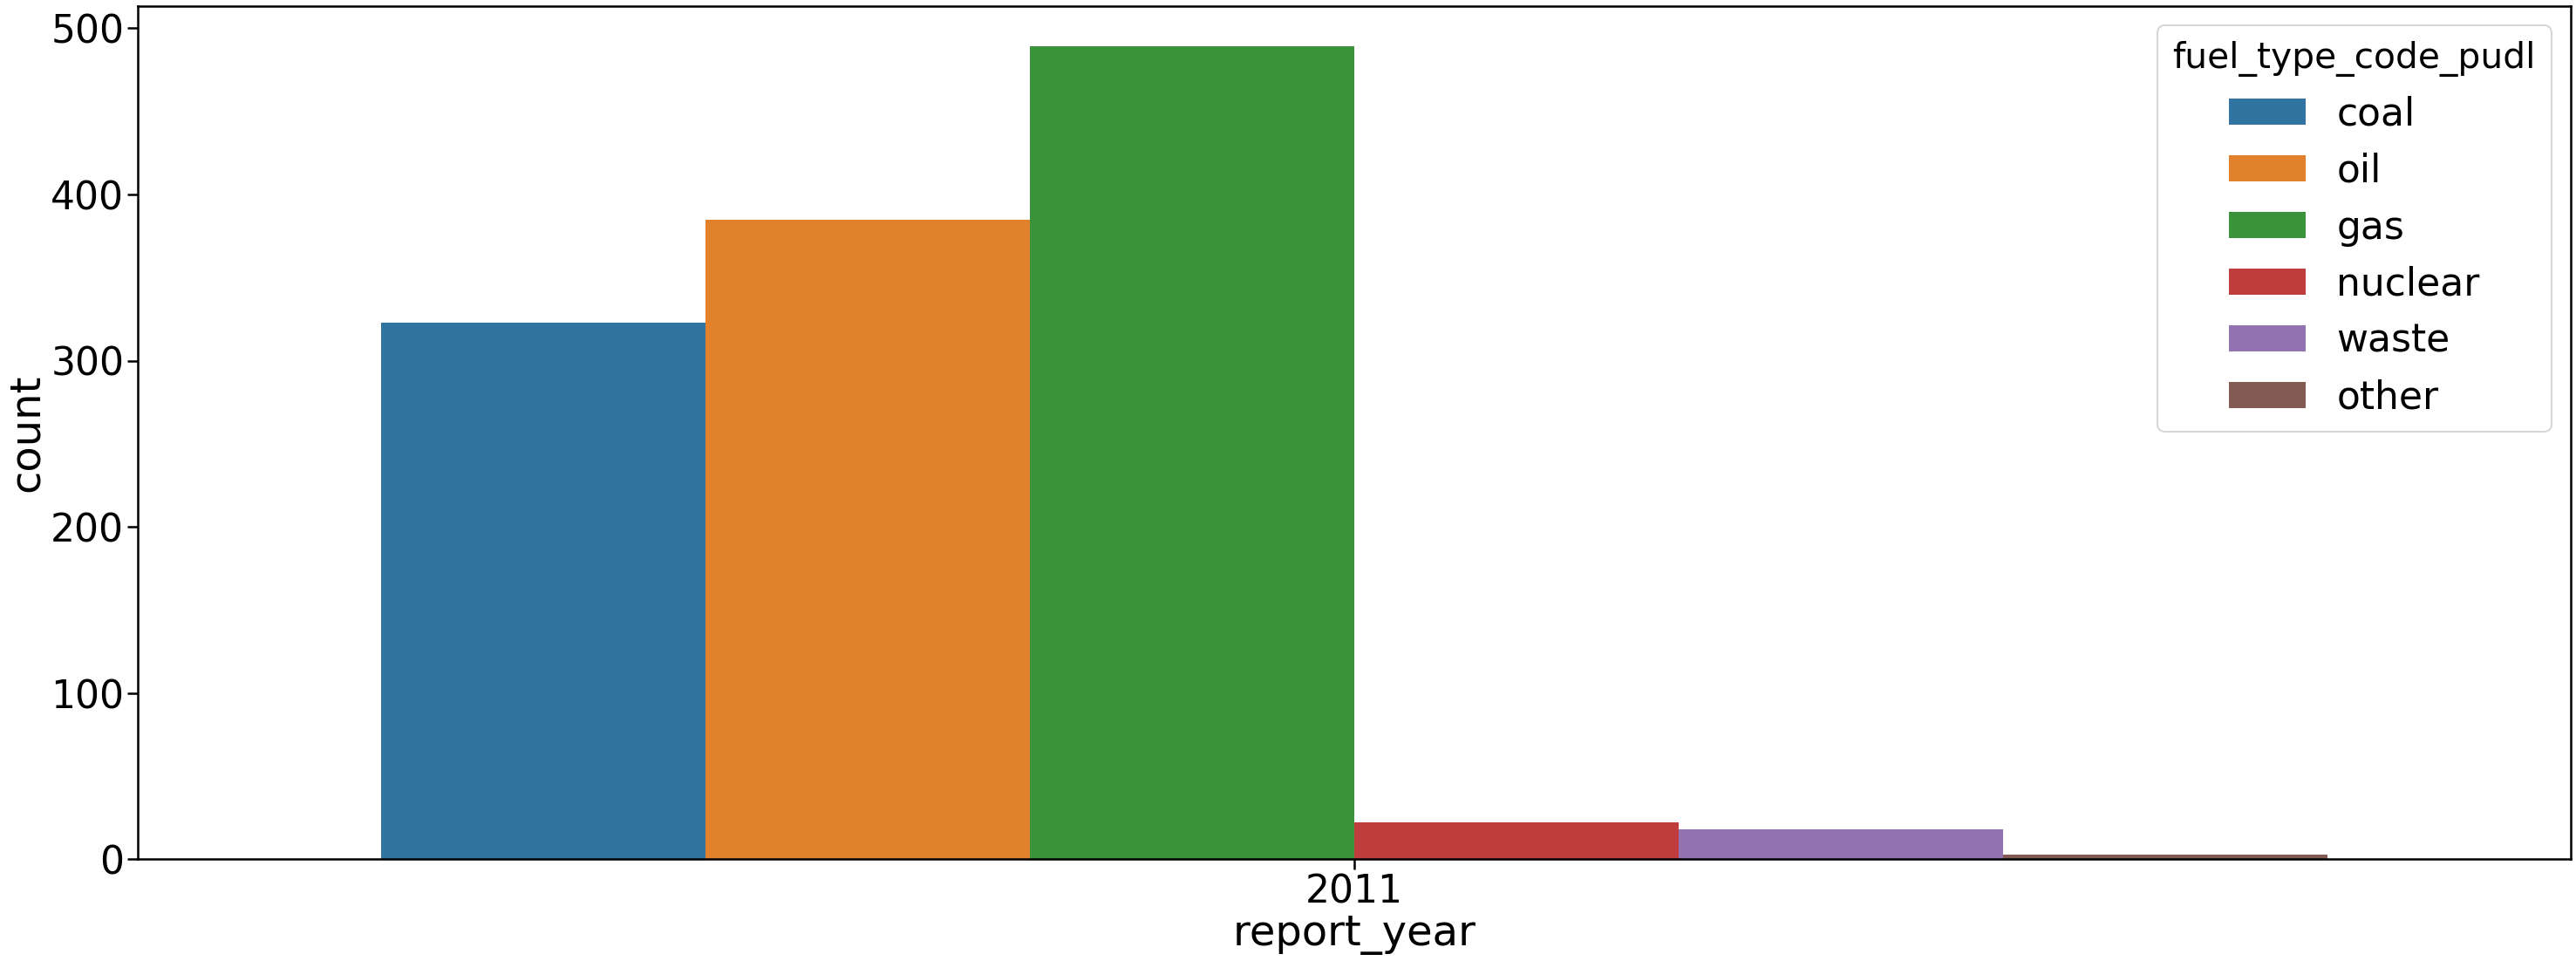




   ----------------------------------[]------------------------------------------------         


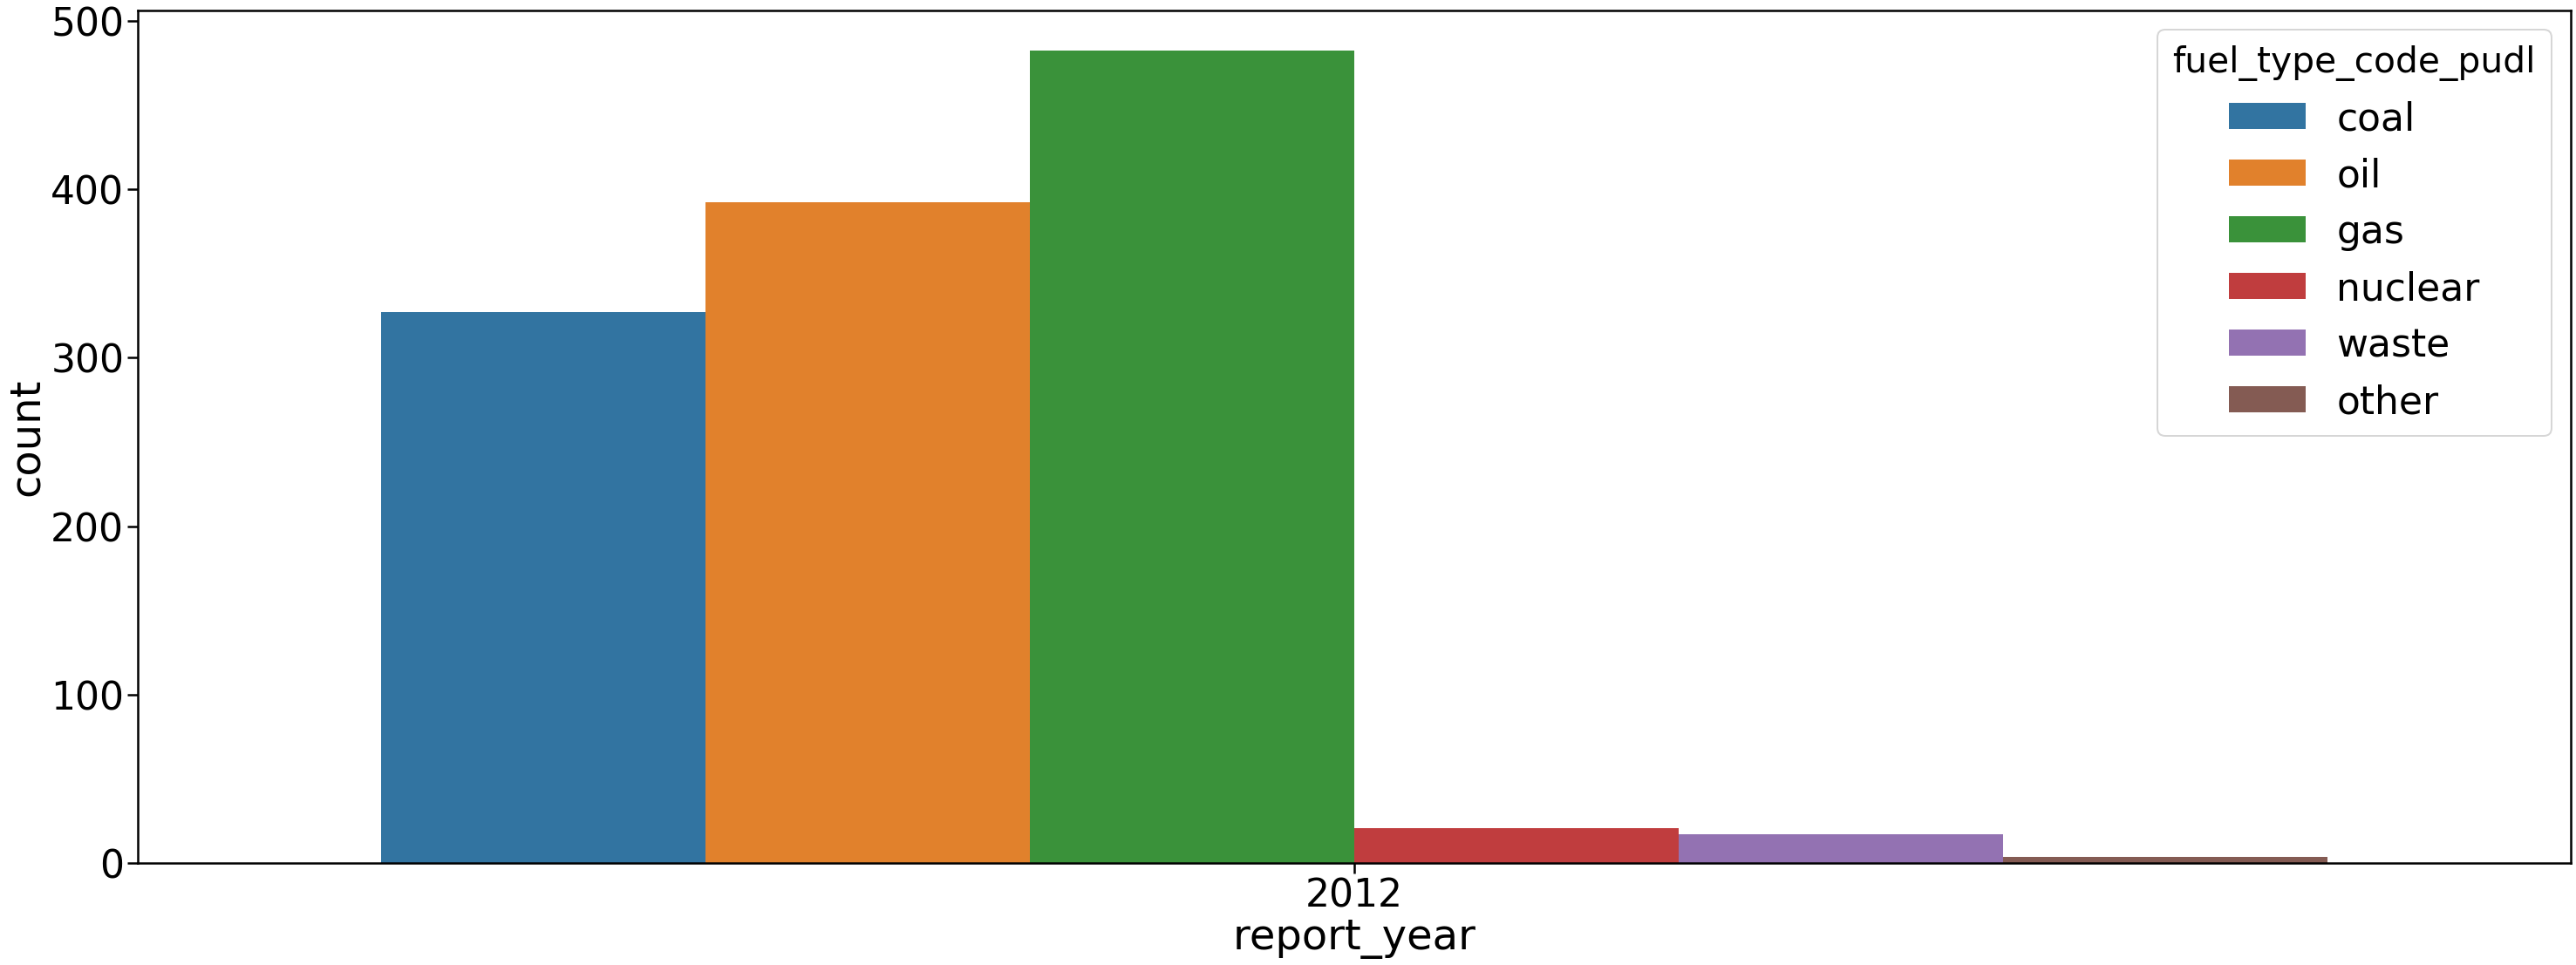




   ----------------------------------[]------------------------------------------------         


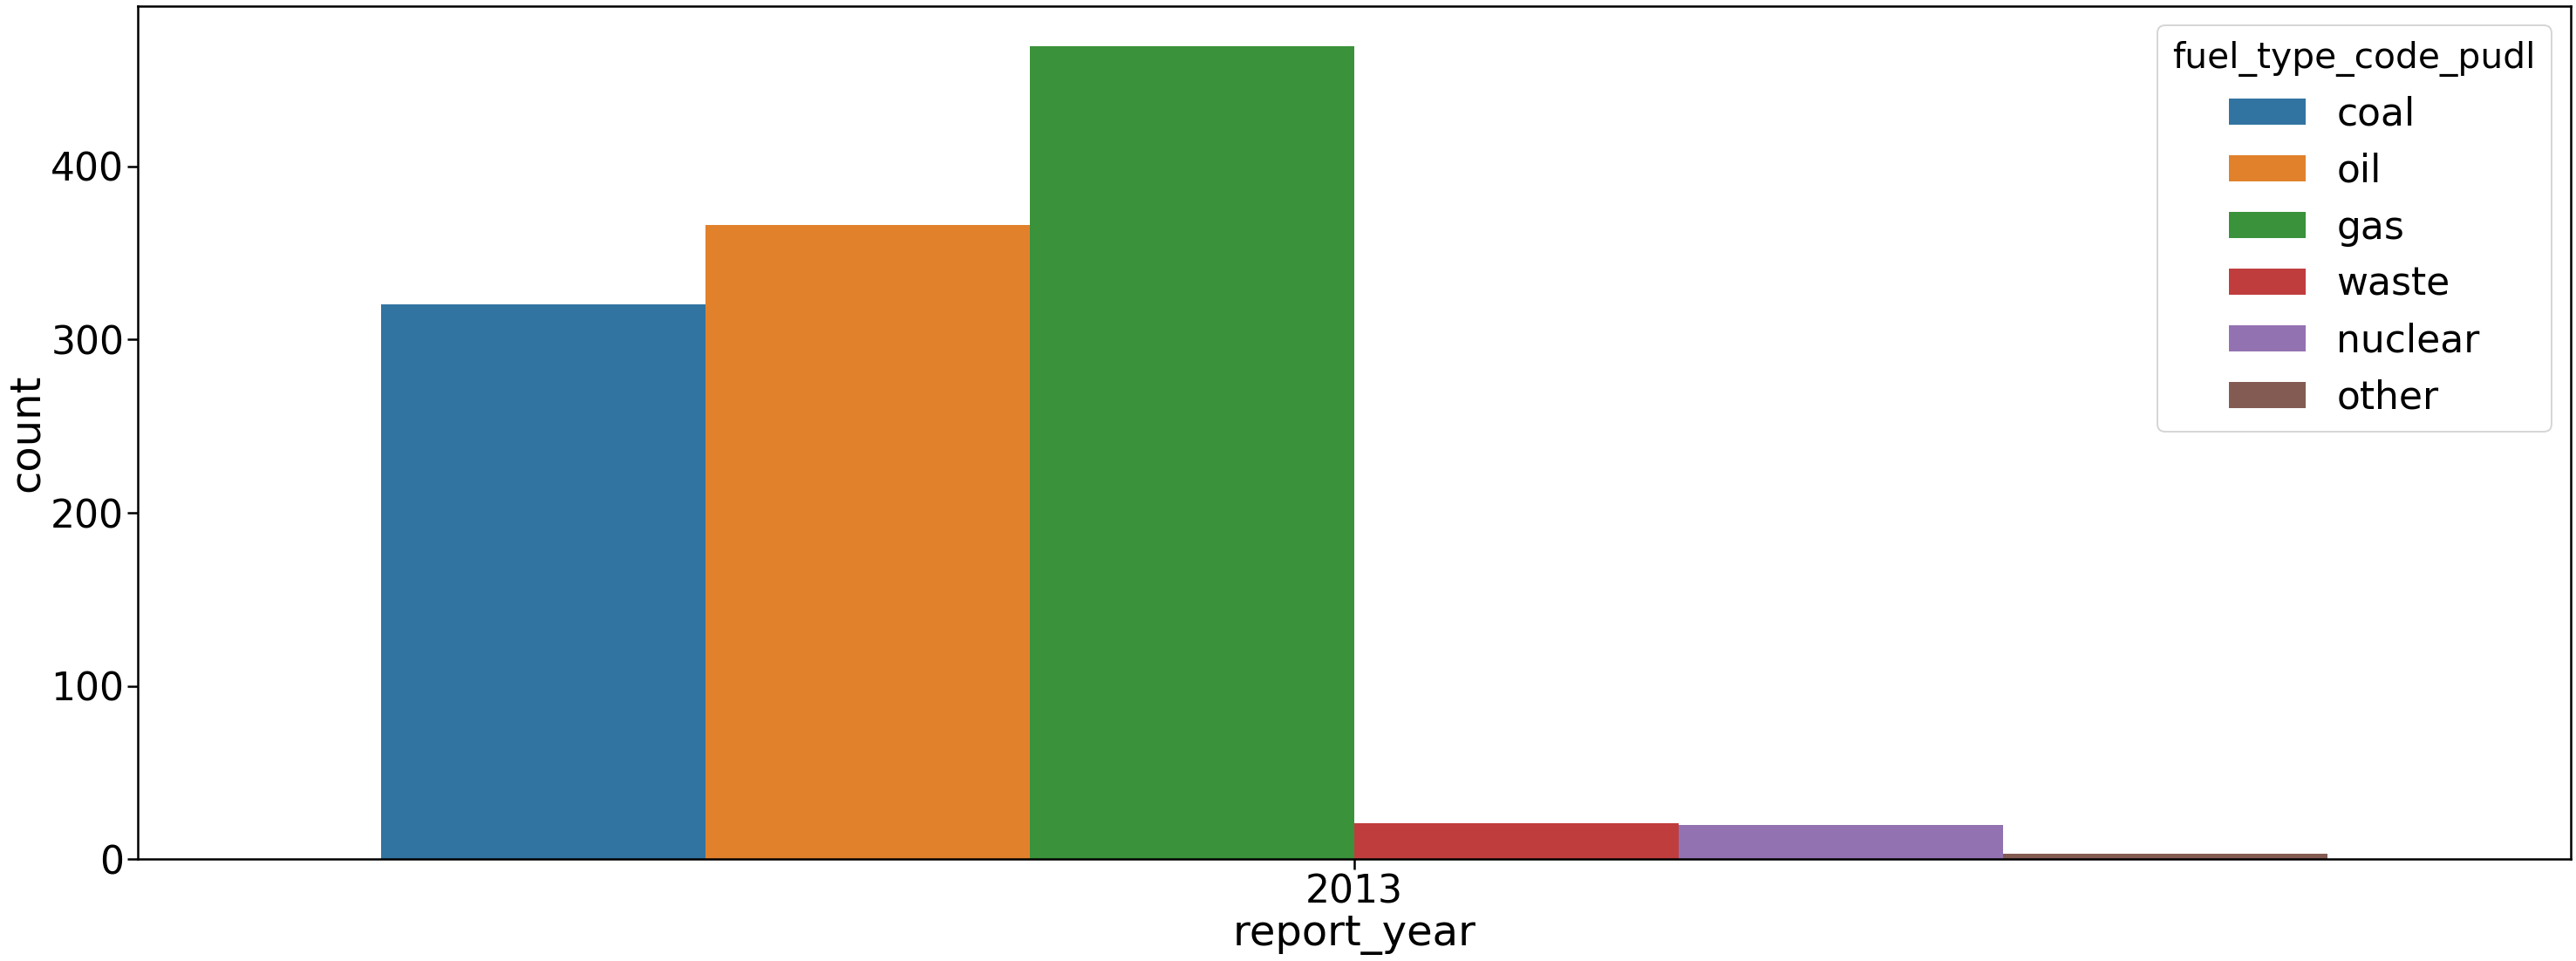




   ----------------------------------[]------------------------------------------------         


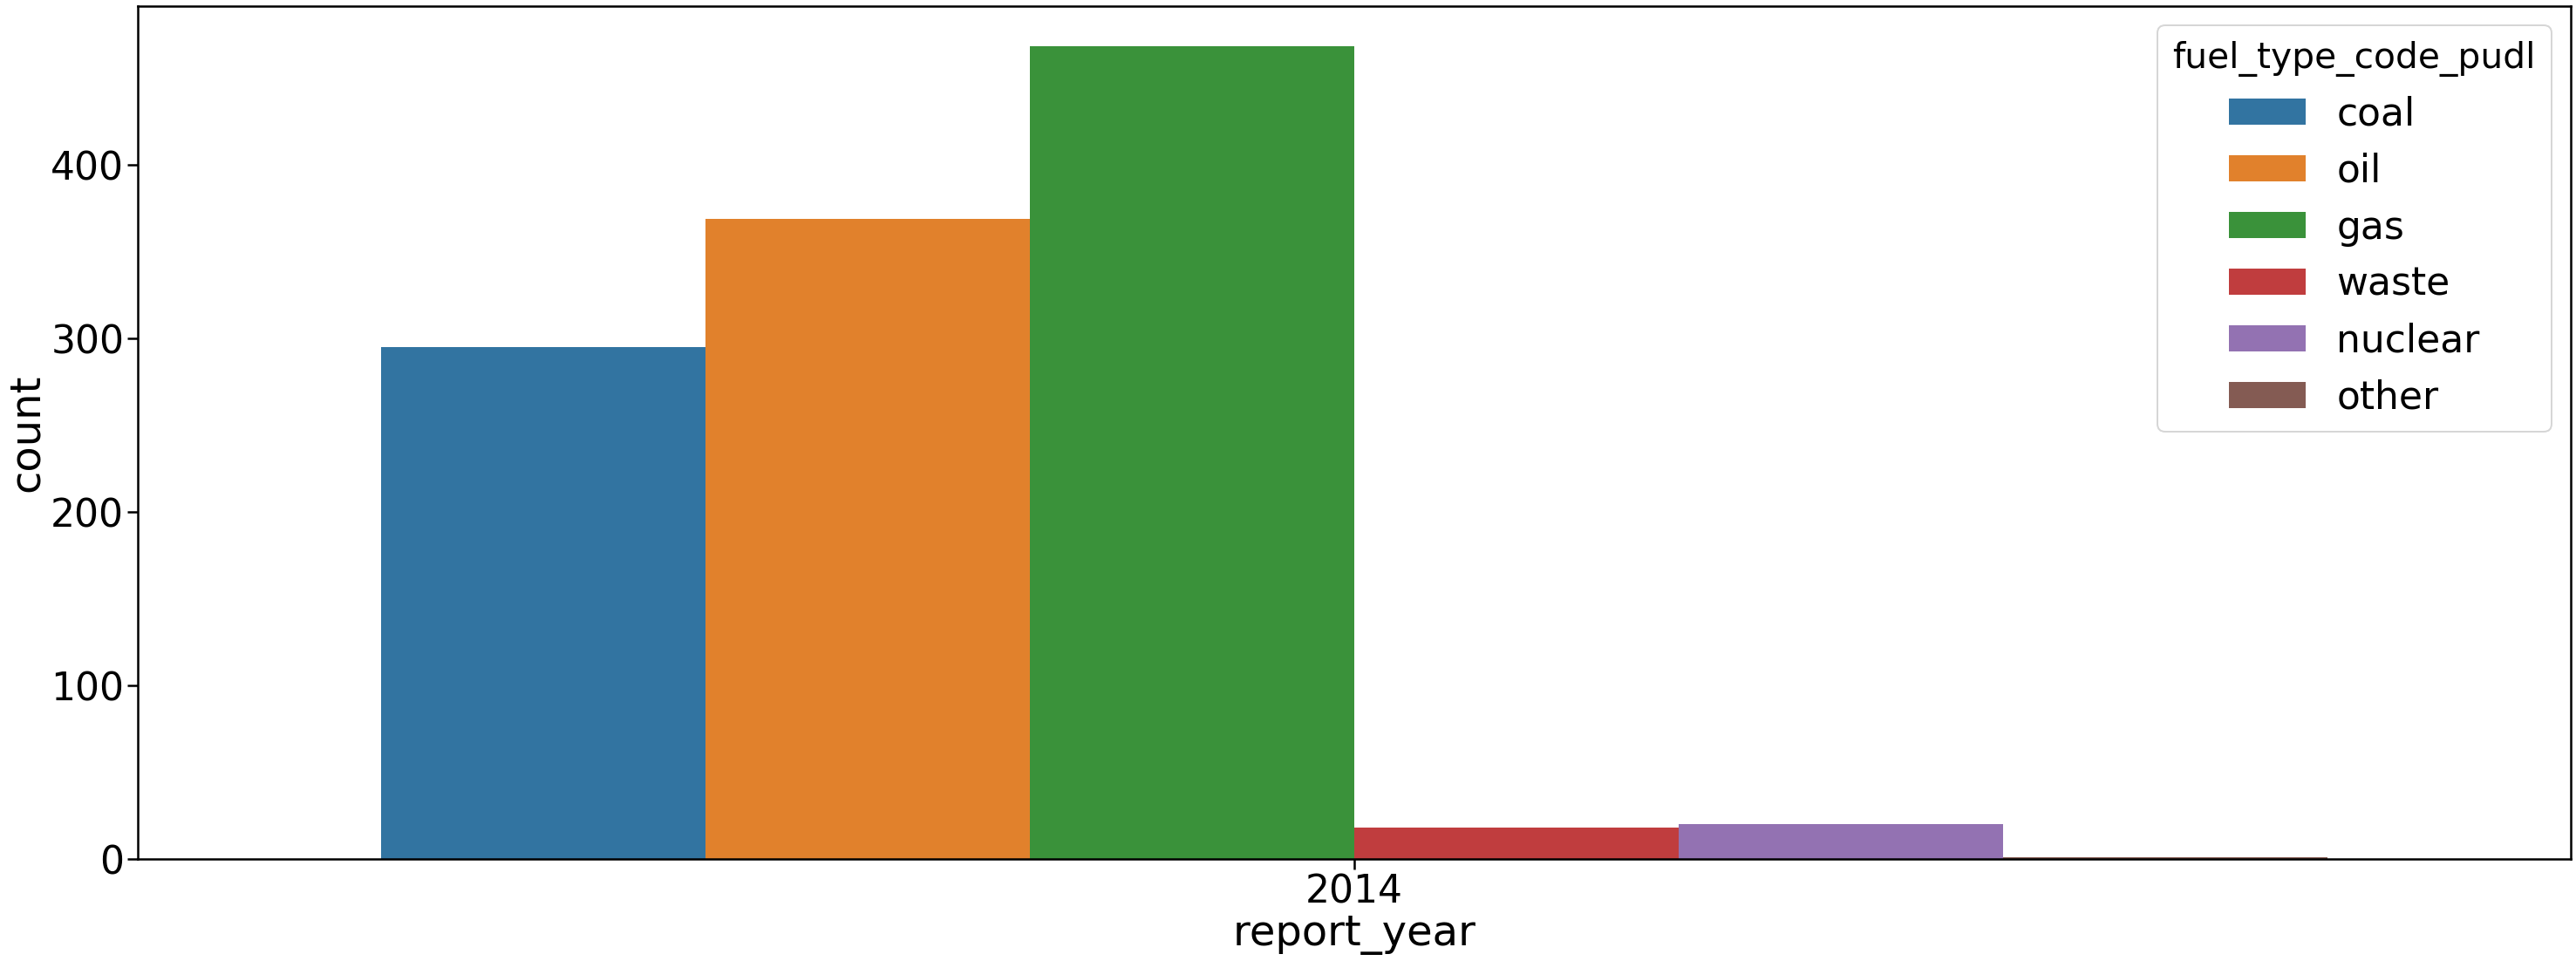




   ----------------------------------[]------------------------------------------------         


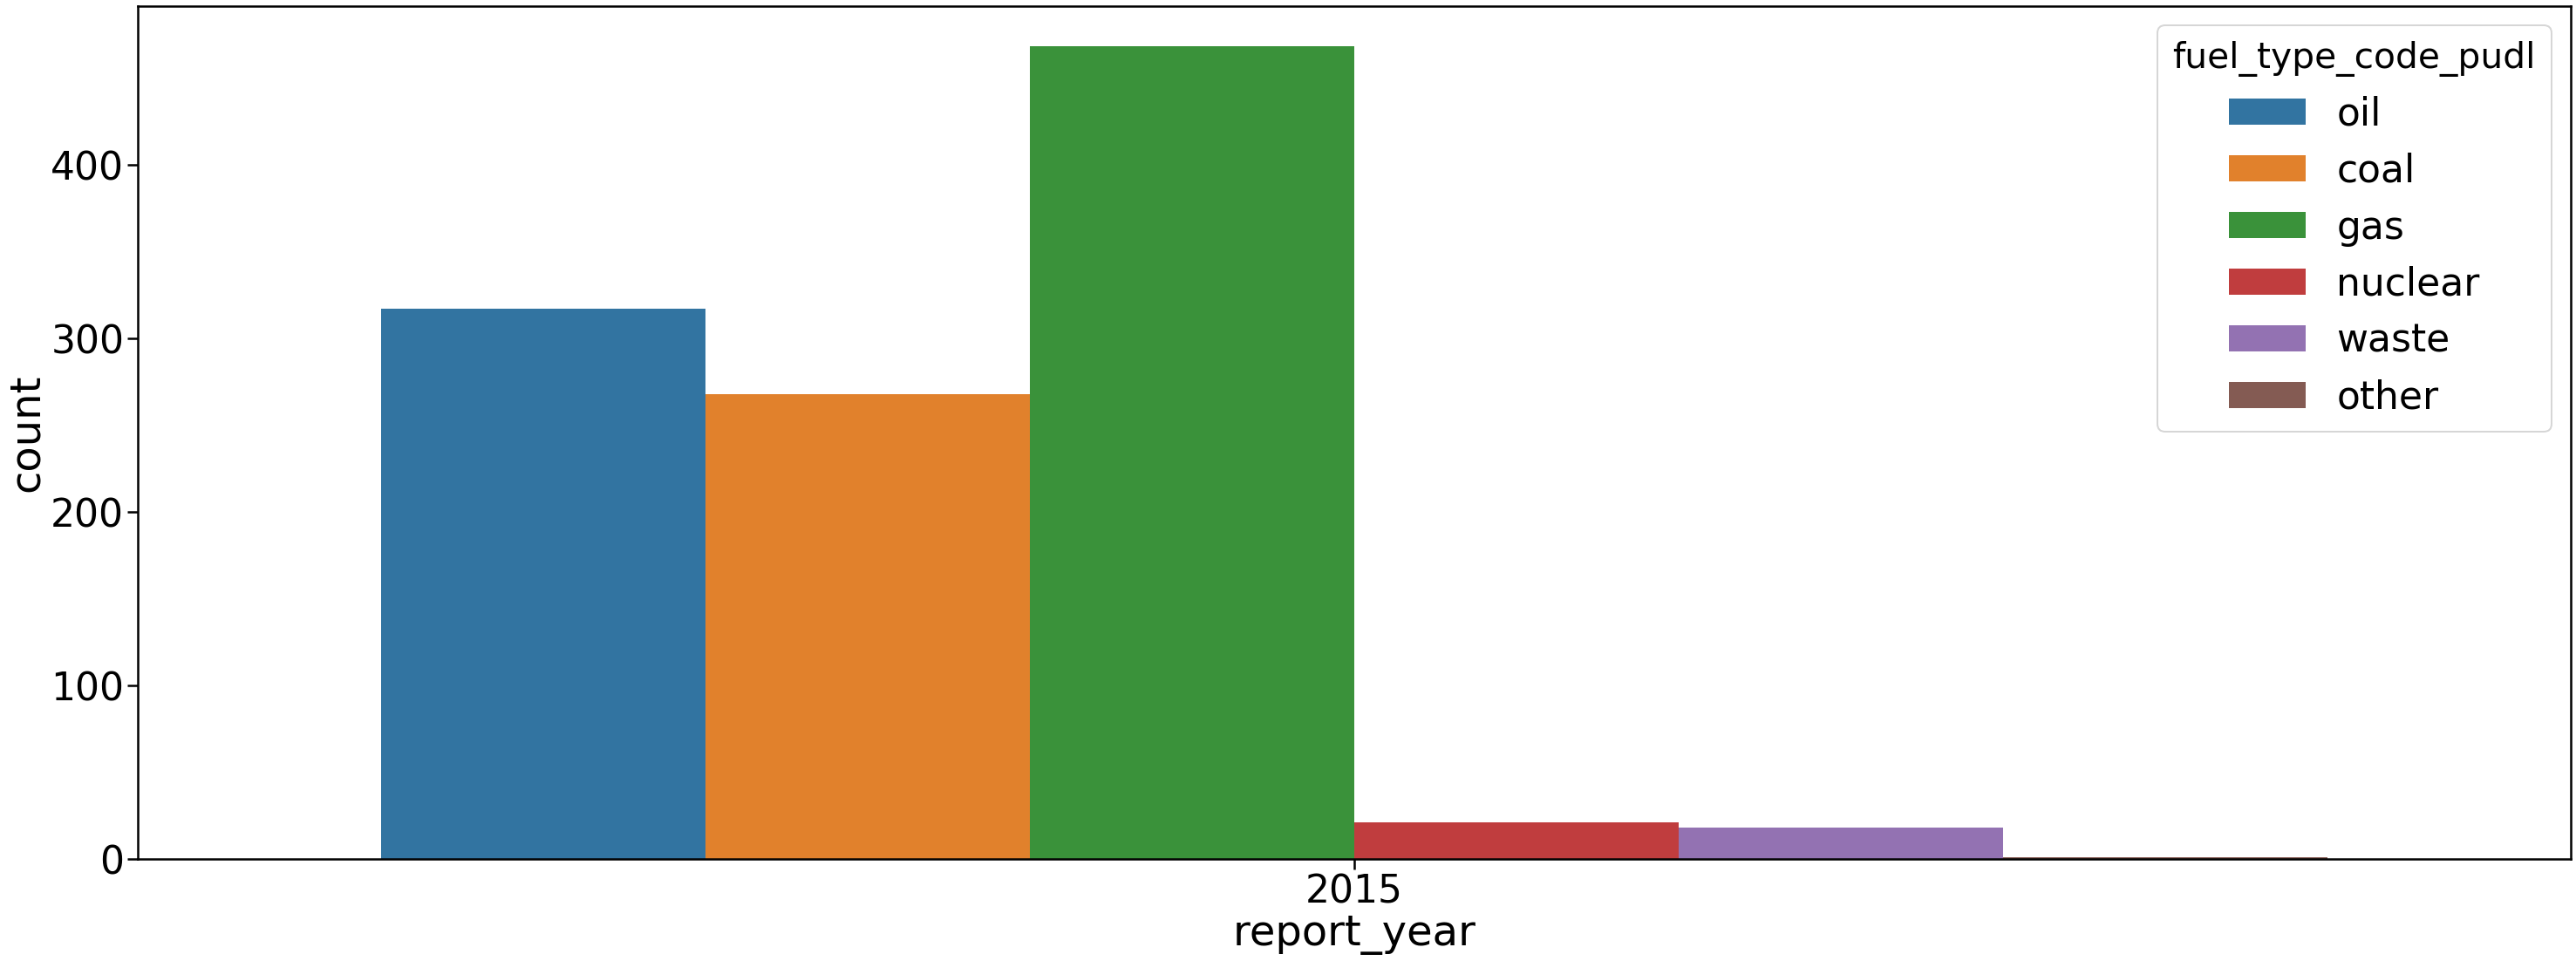




   ----------------------------------[]------------------------------------------------         


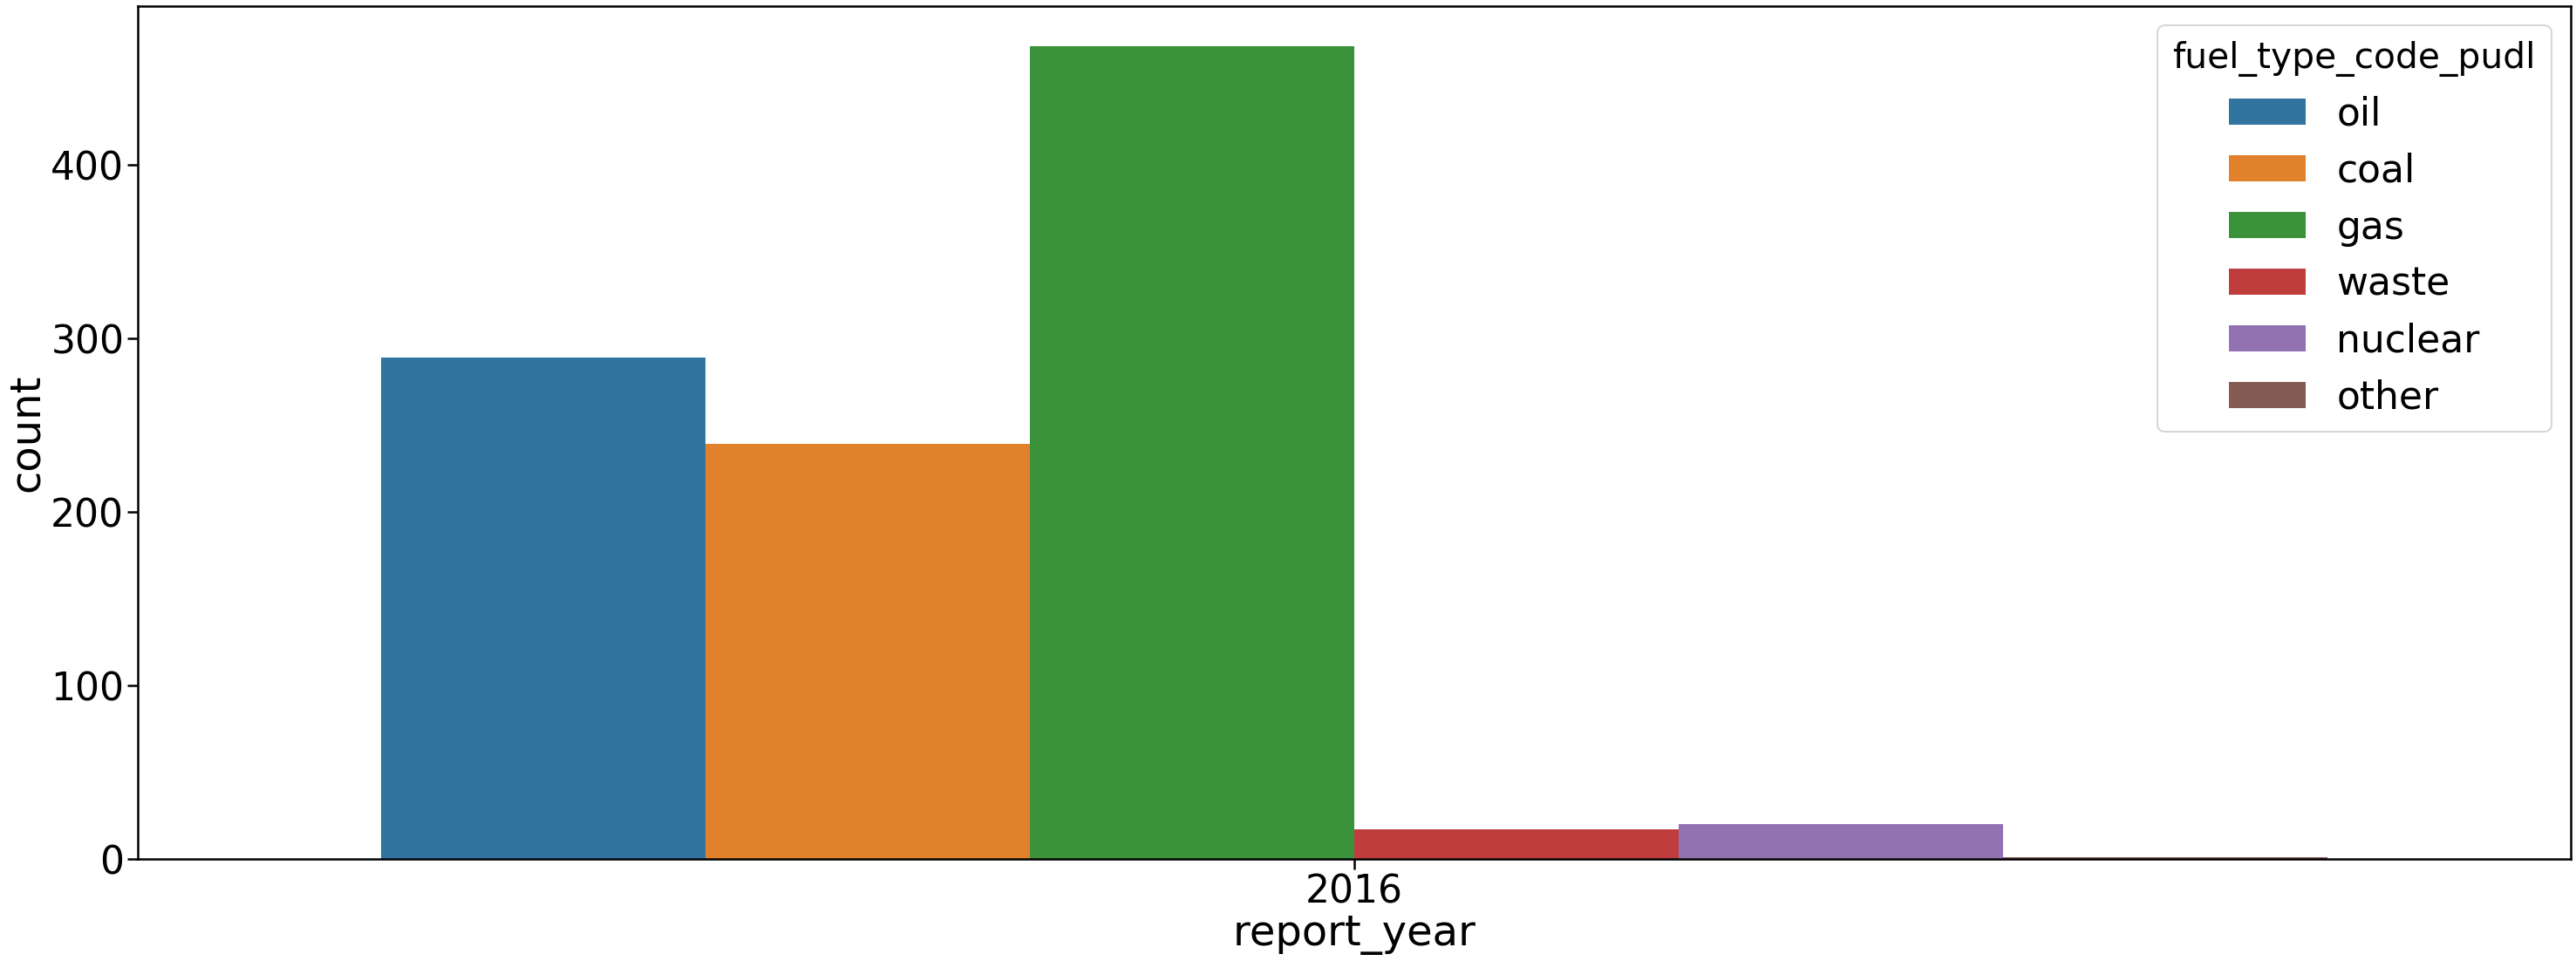




   ----------------------------------[]------------------------------------------------         


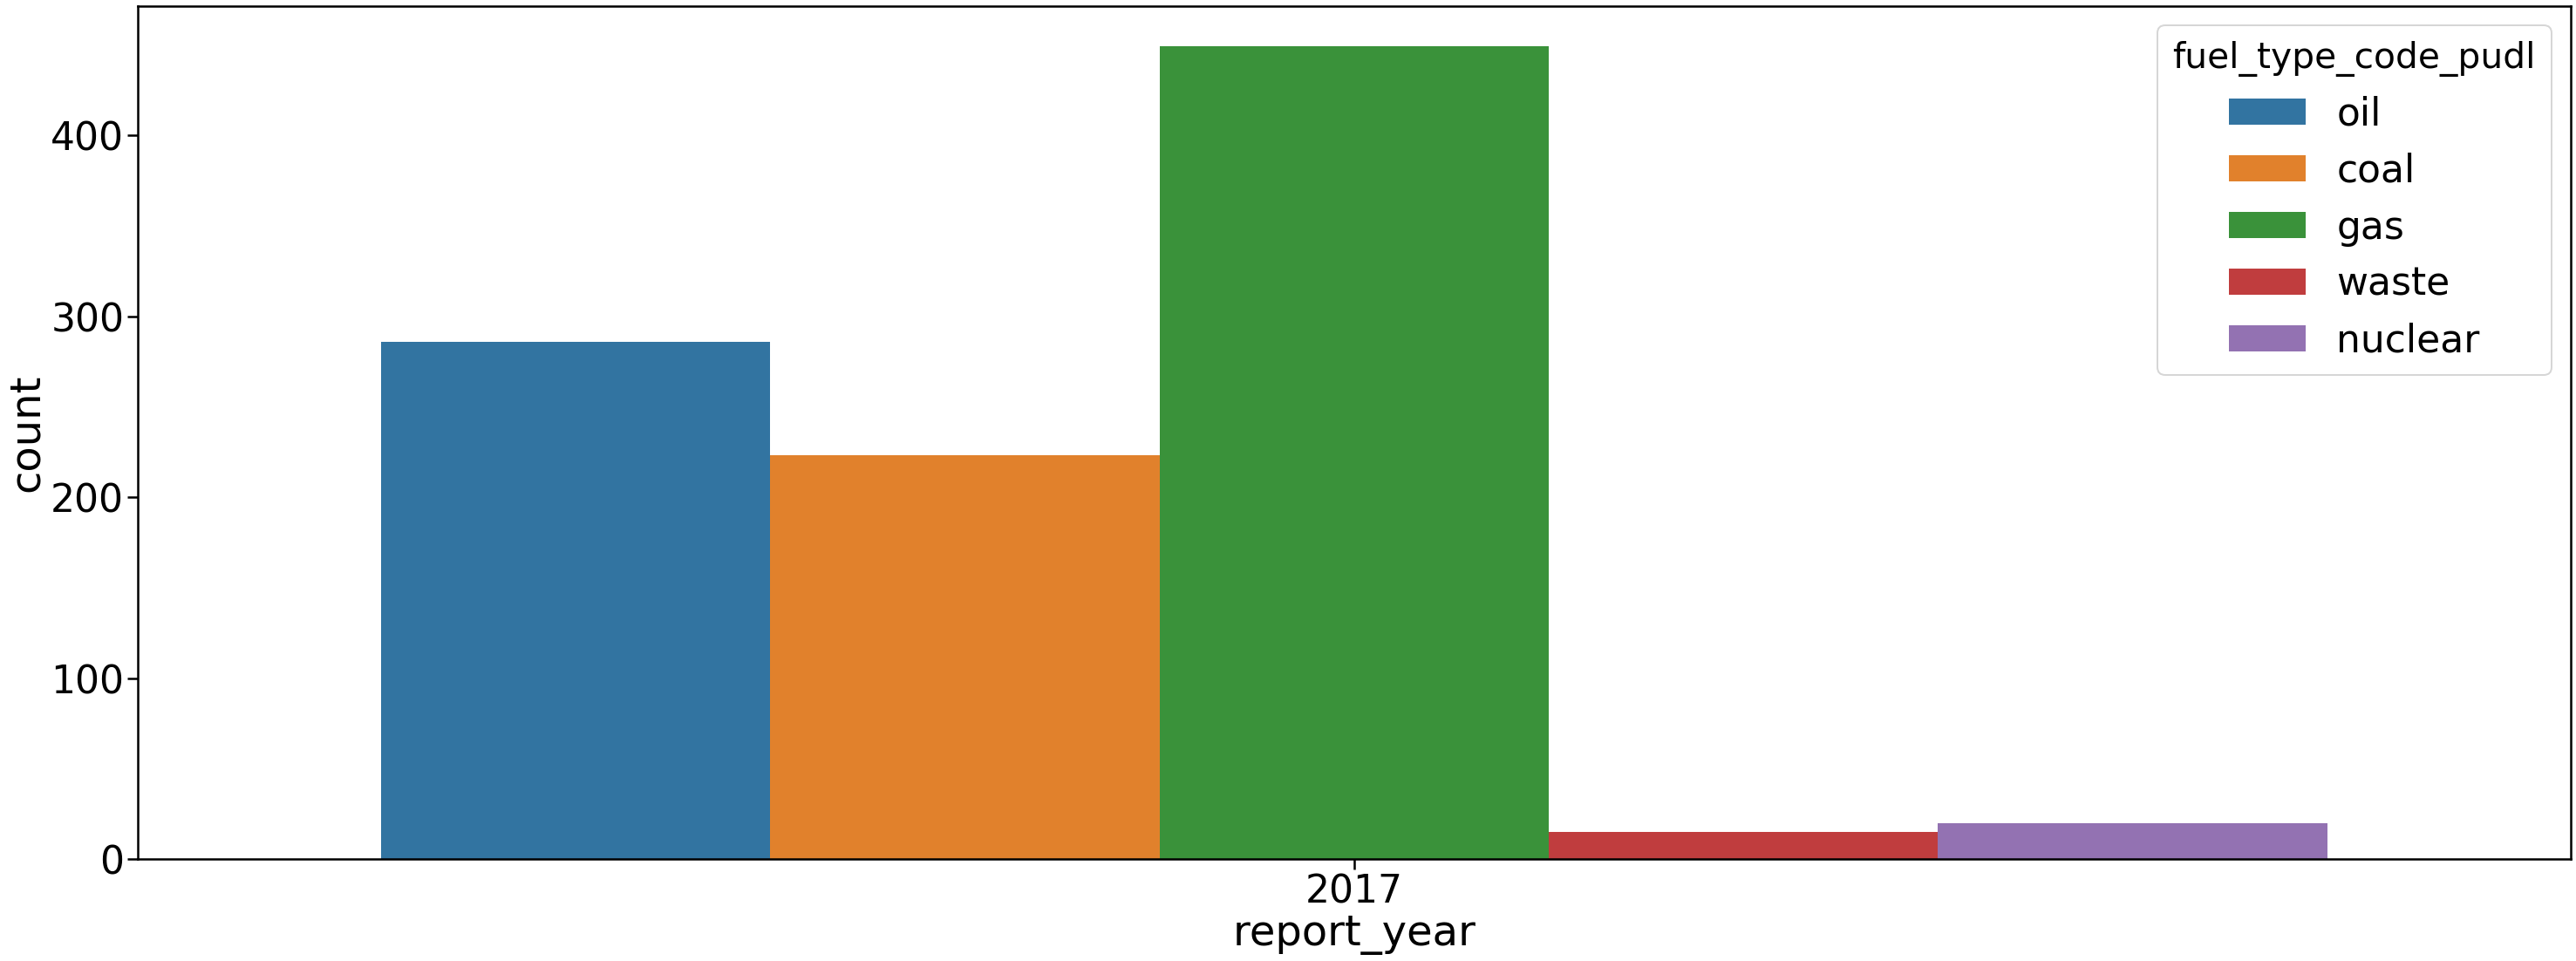




   ----------------------------------[]------------------------------------------------         


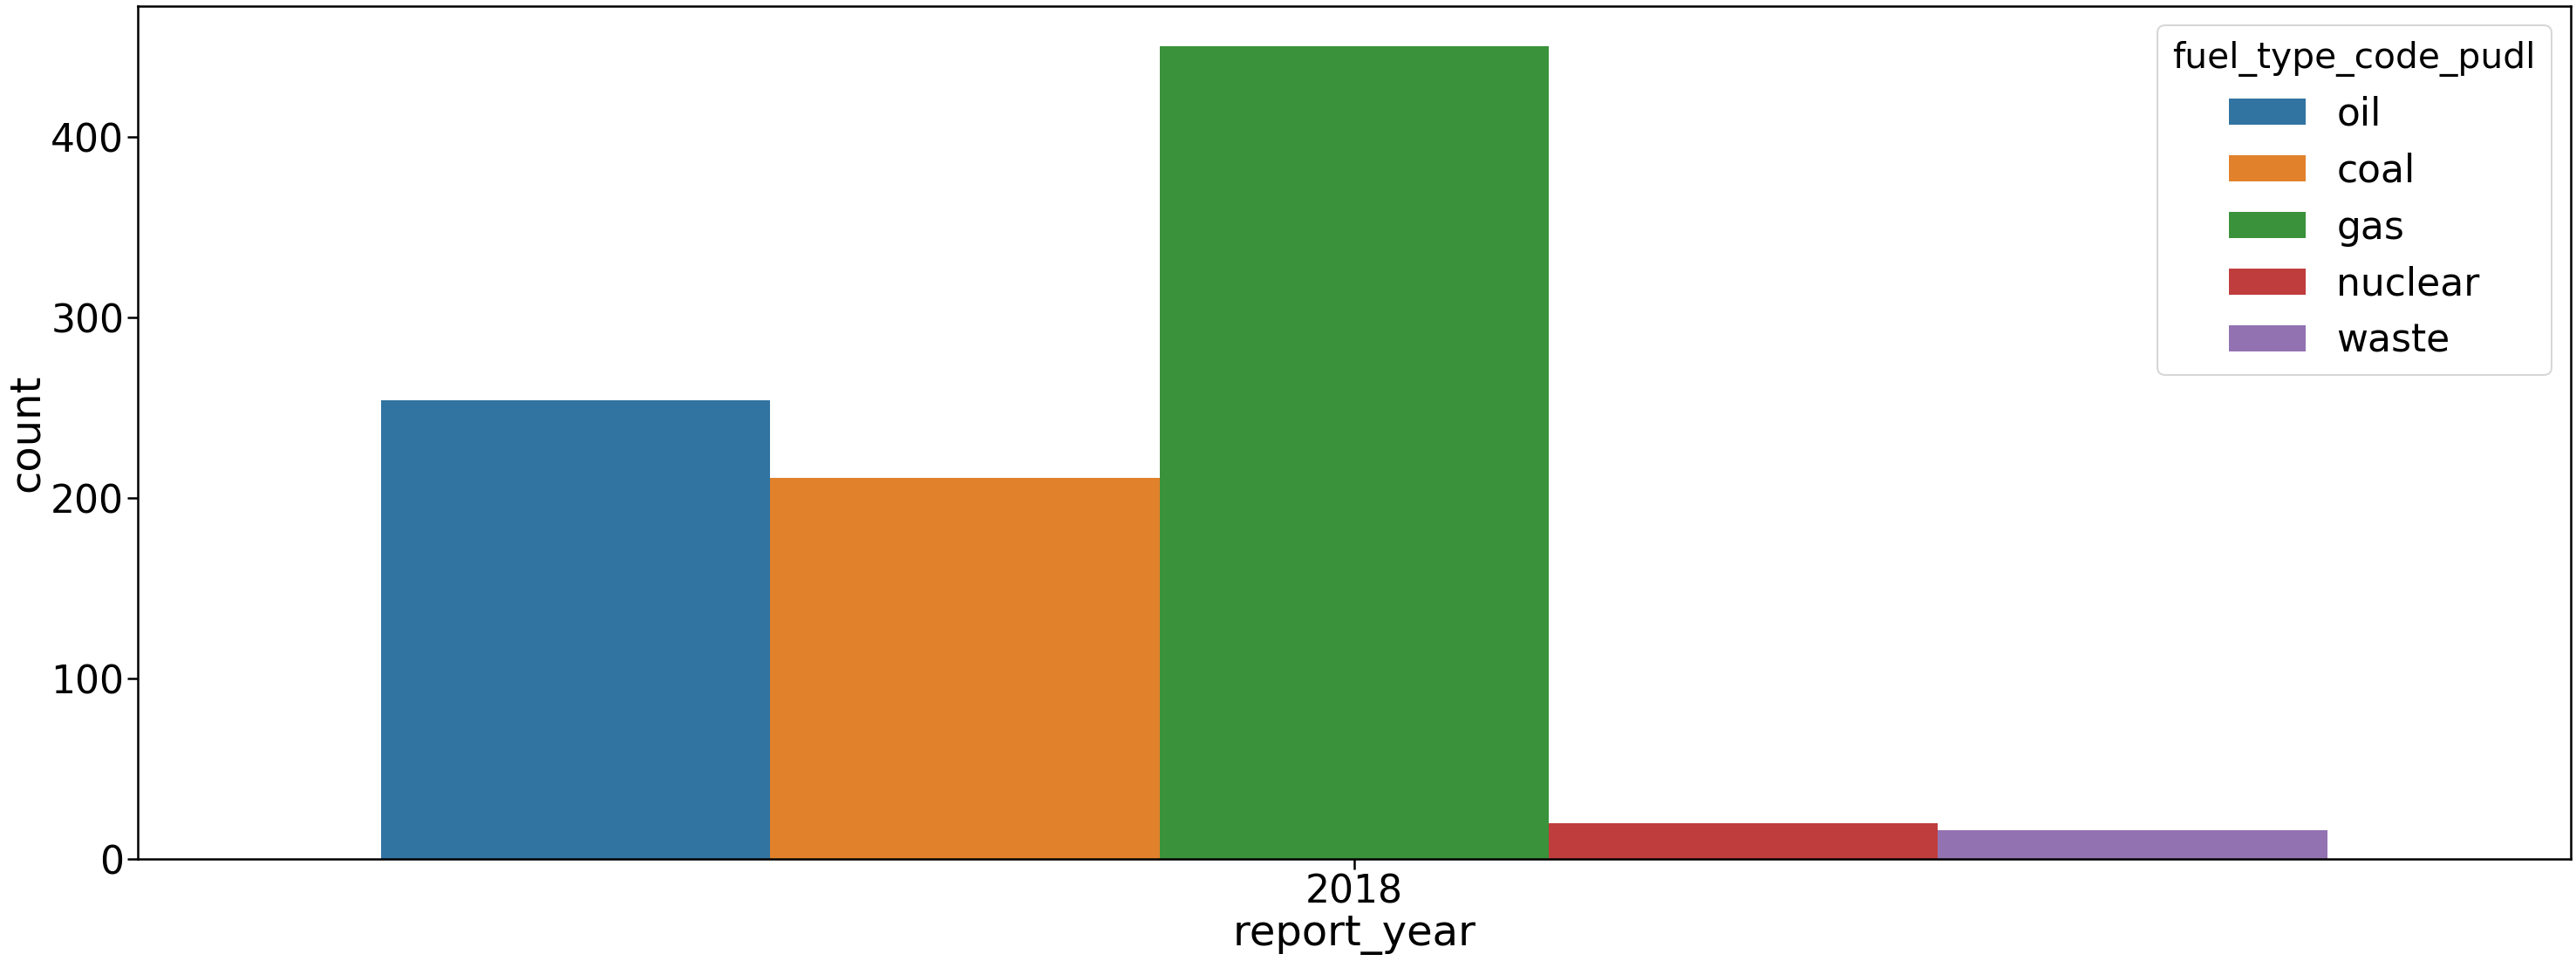

In [28]:
## loop to plot the fuel types consumed  yearly  
startYear = 1993
for eachYear in years:
    plt.figure(figsize=(50,18))
    sns.set_context('poster',font_scale=2)
    #plt.title('Report')
    sns.countplot('report_year', data= eachYear, hue='fuel_type_code_pudl')
    print('\n\n')
    print('   ----------------------------------[]------------------------------------------------         ')
    plt.show()
    startYear +=1
    

In [29]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [31]:
data.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [ ]:
# plt.figure(figsize=(50,18))
# sns.countplot('fuel_qty_burned',data=data,hue='fuel_type_code_pudl')

In [35]:
data['plant_name_ferc1'].nunique()

2315

In [36]:
data.shape

(29523, 11)

In [37]:
data['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

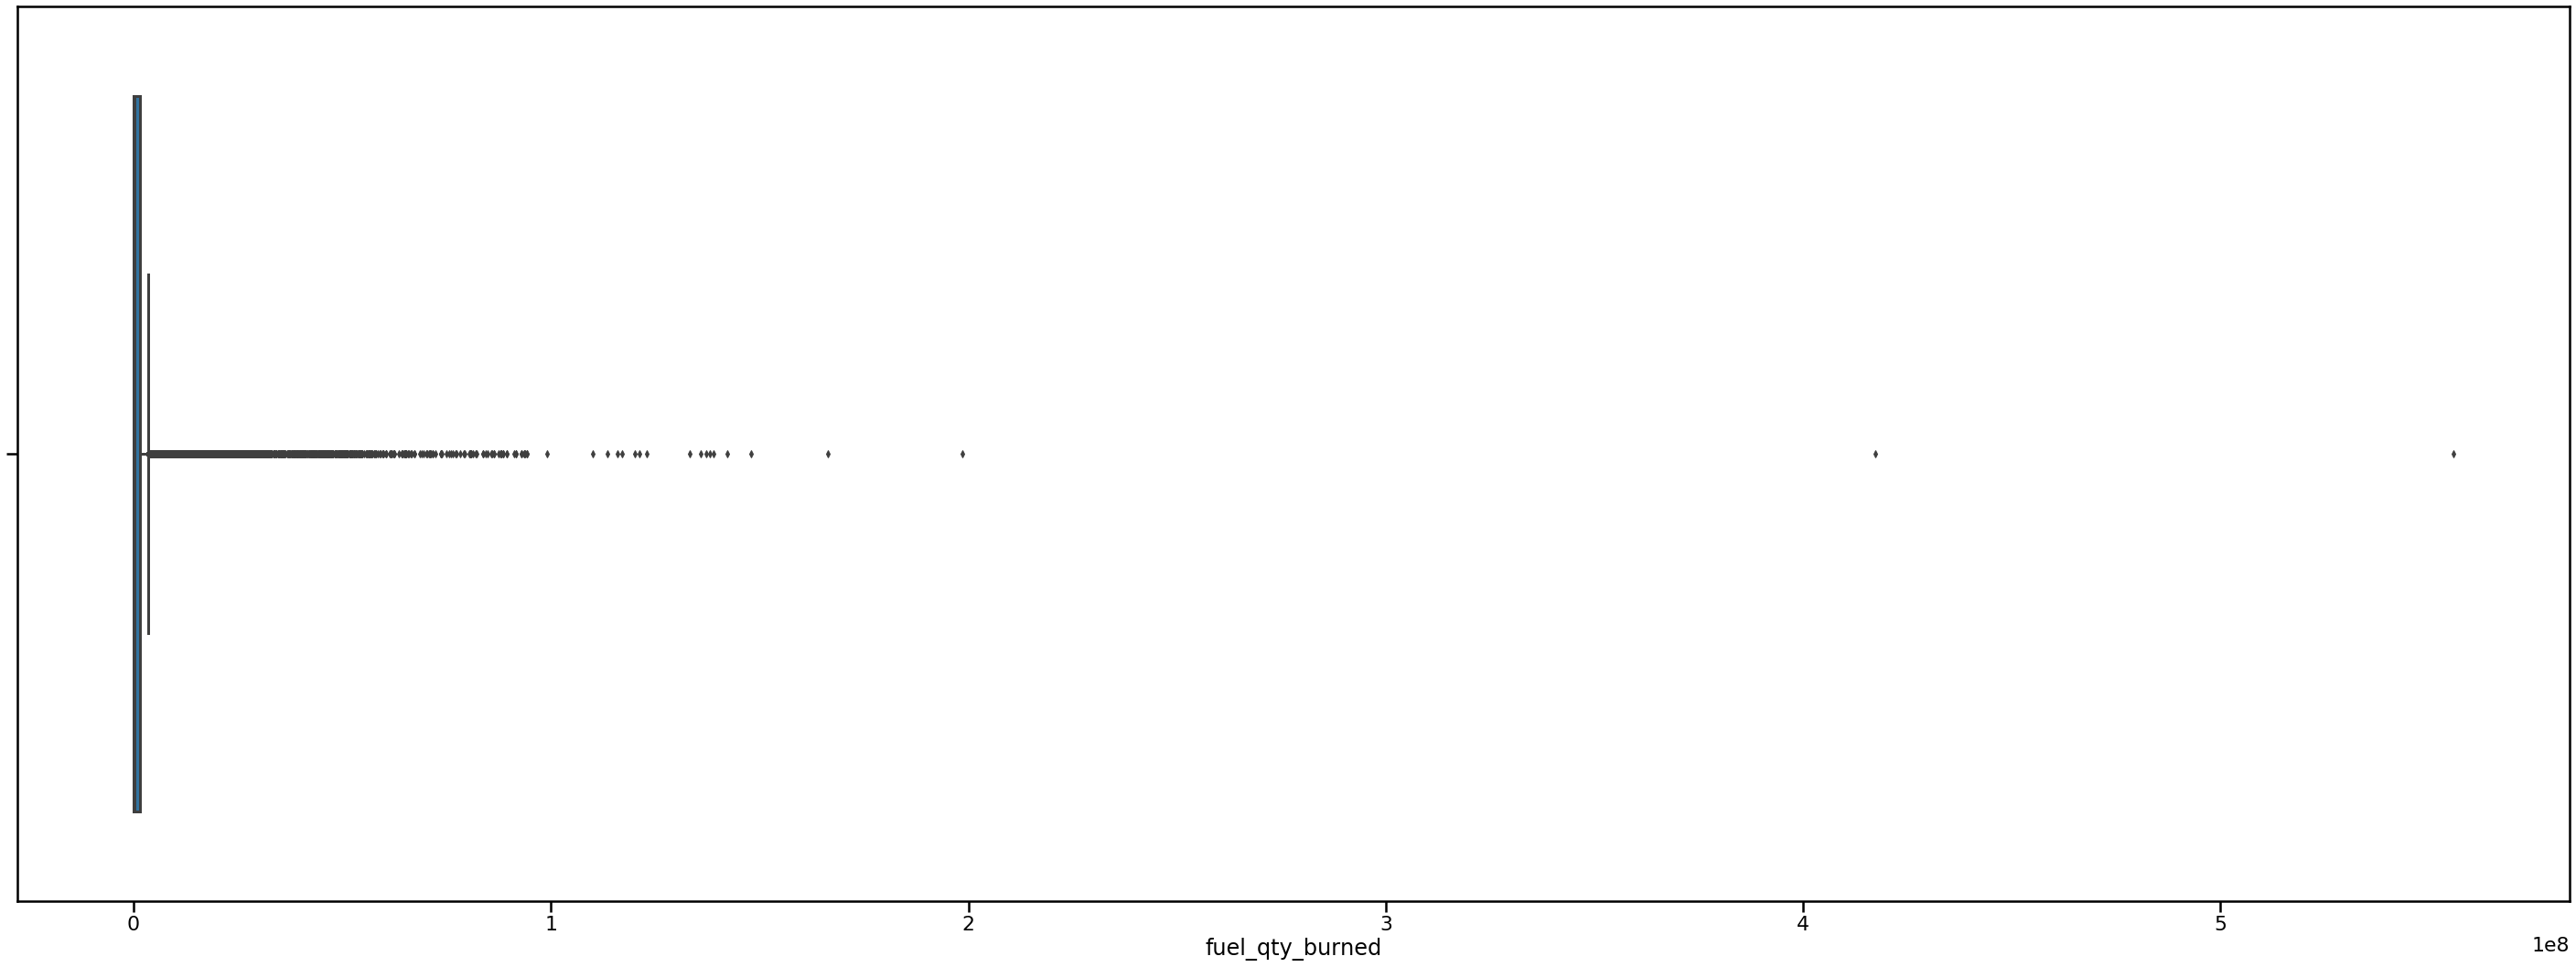

In [63]:
plt.figure(figsize=(50,18))
sns.boxplot(x='fuel_qty_burned',data=data)

In [48]:
data['fuel_qty_burned'].max()

555894250.0

In [49]:
data['fuel_qty_burned'].min()

1.0

In [50]:
data['fuel_mmbtu_per_unit'].max()

341.26

In [51]:
data['fuel_mmbtu_per_unit'].min()

1e-06

In [53]:
data['fuel_cost_per_unit_burned'].max()

139358.0

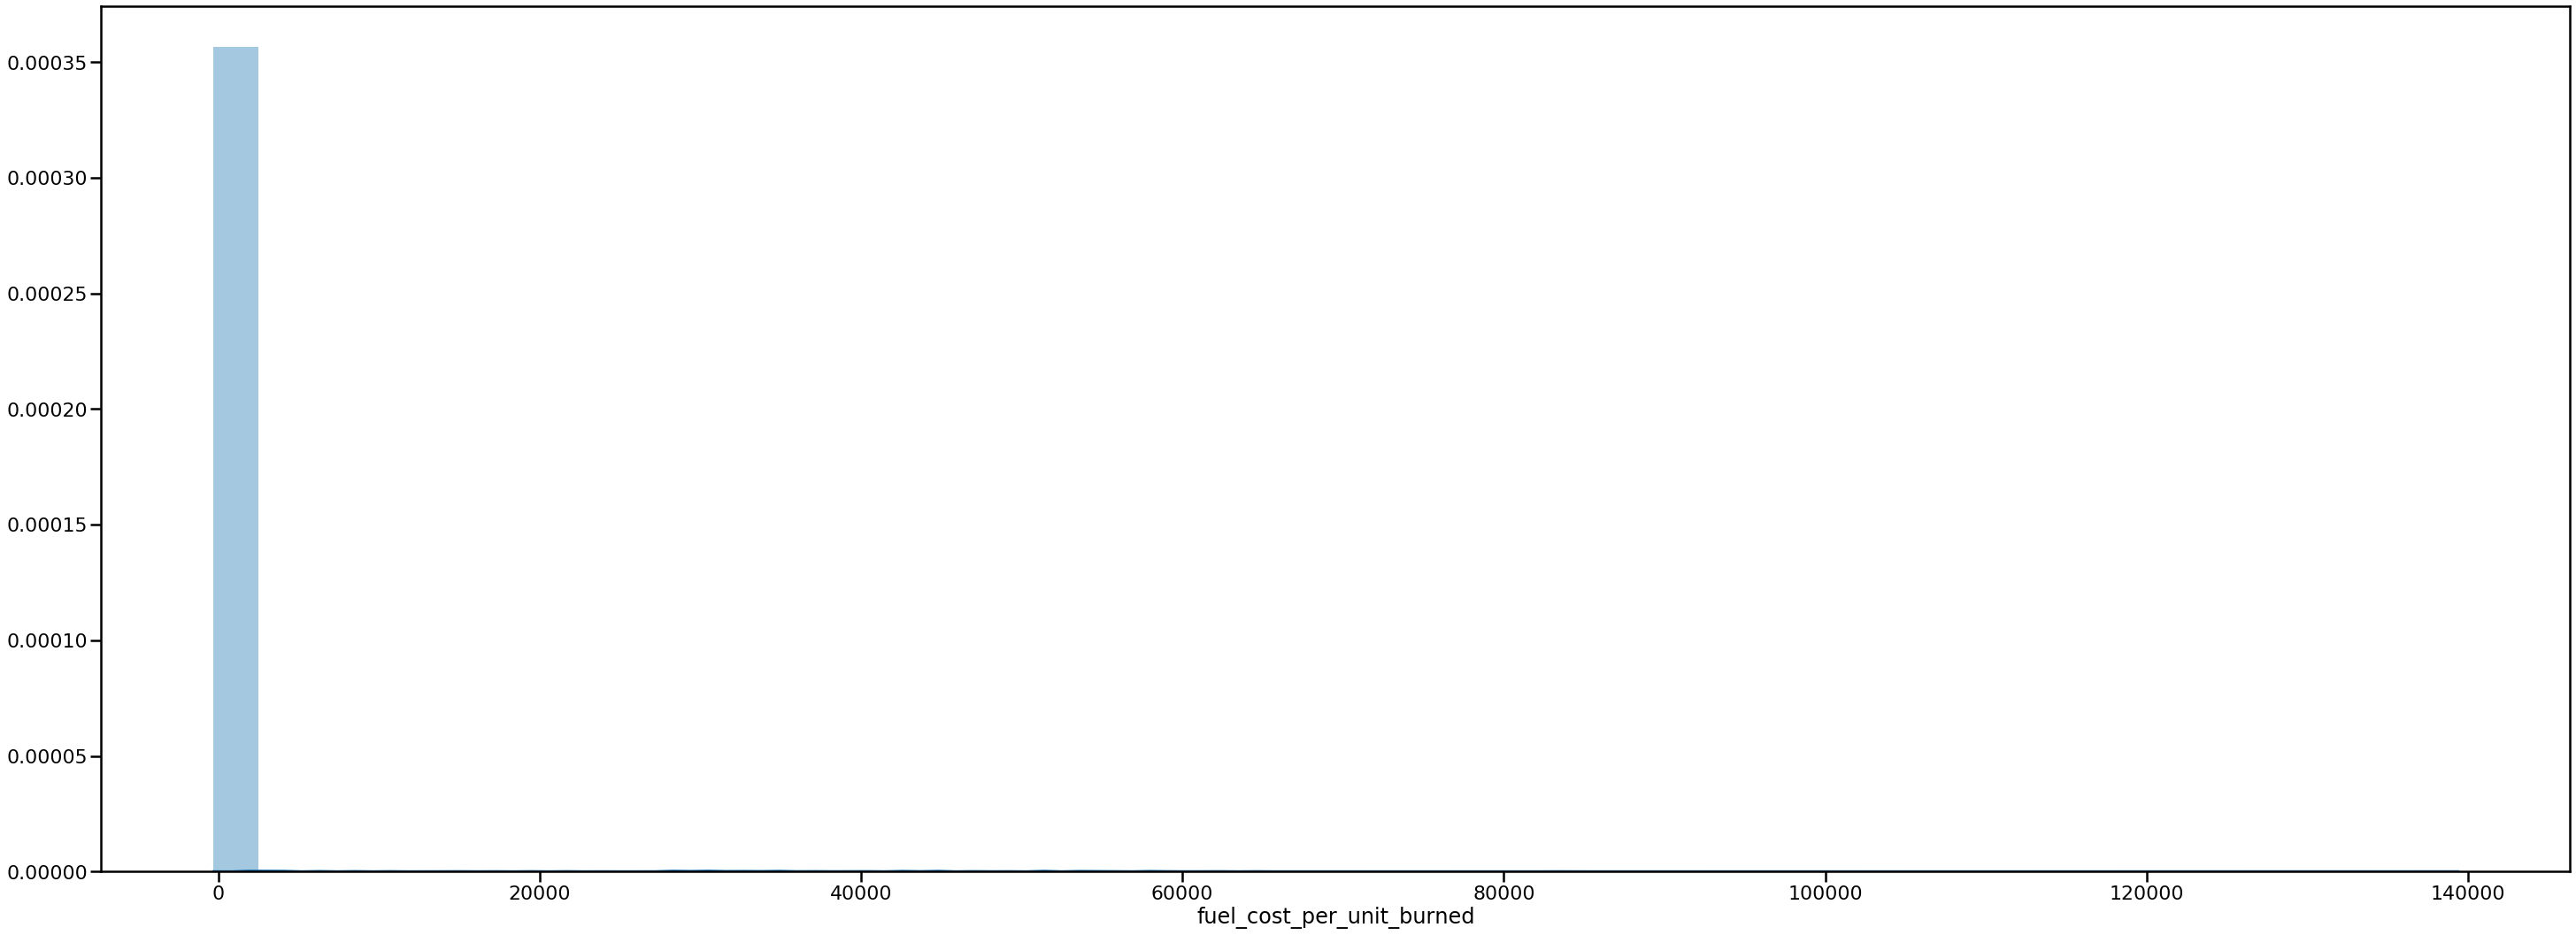

In [62]:
plt.figure(figsize=(50,18))
sns.set_context('poster',font_scale=1)
sns.distplot(a=data['fuel_cost_per_unit_burned'])

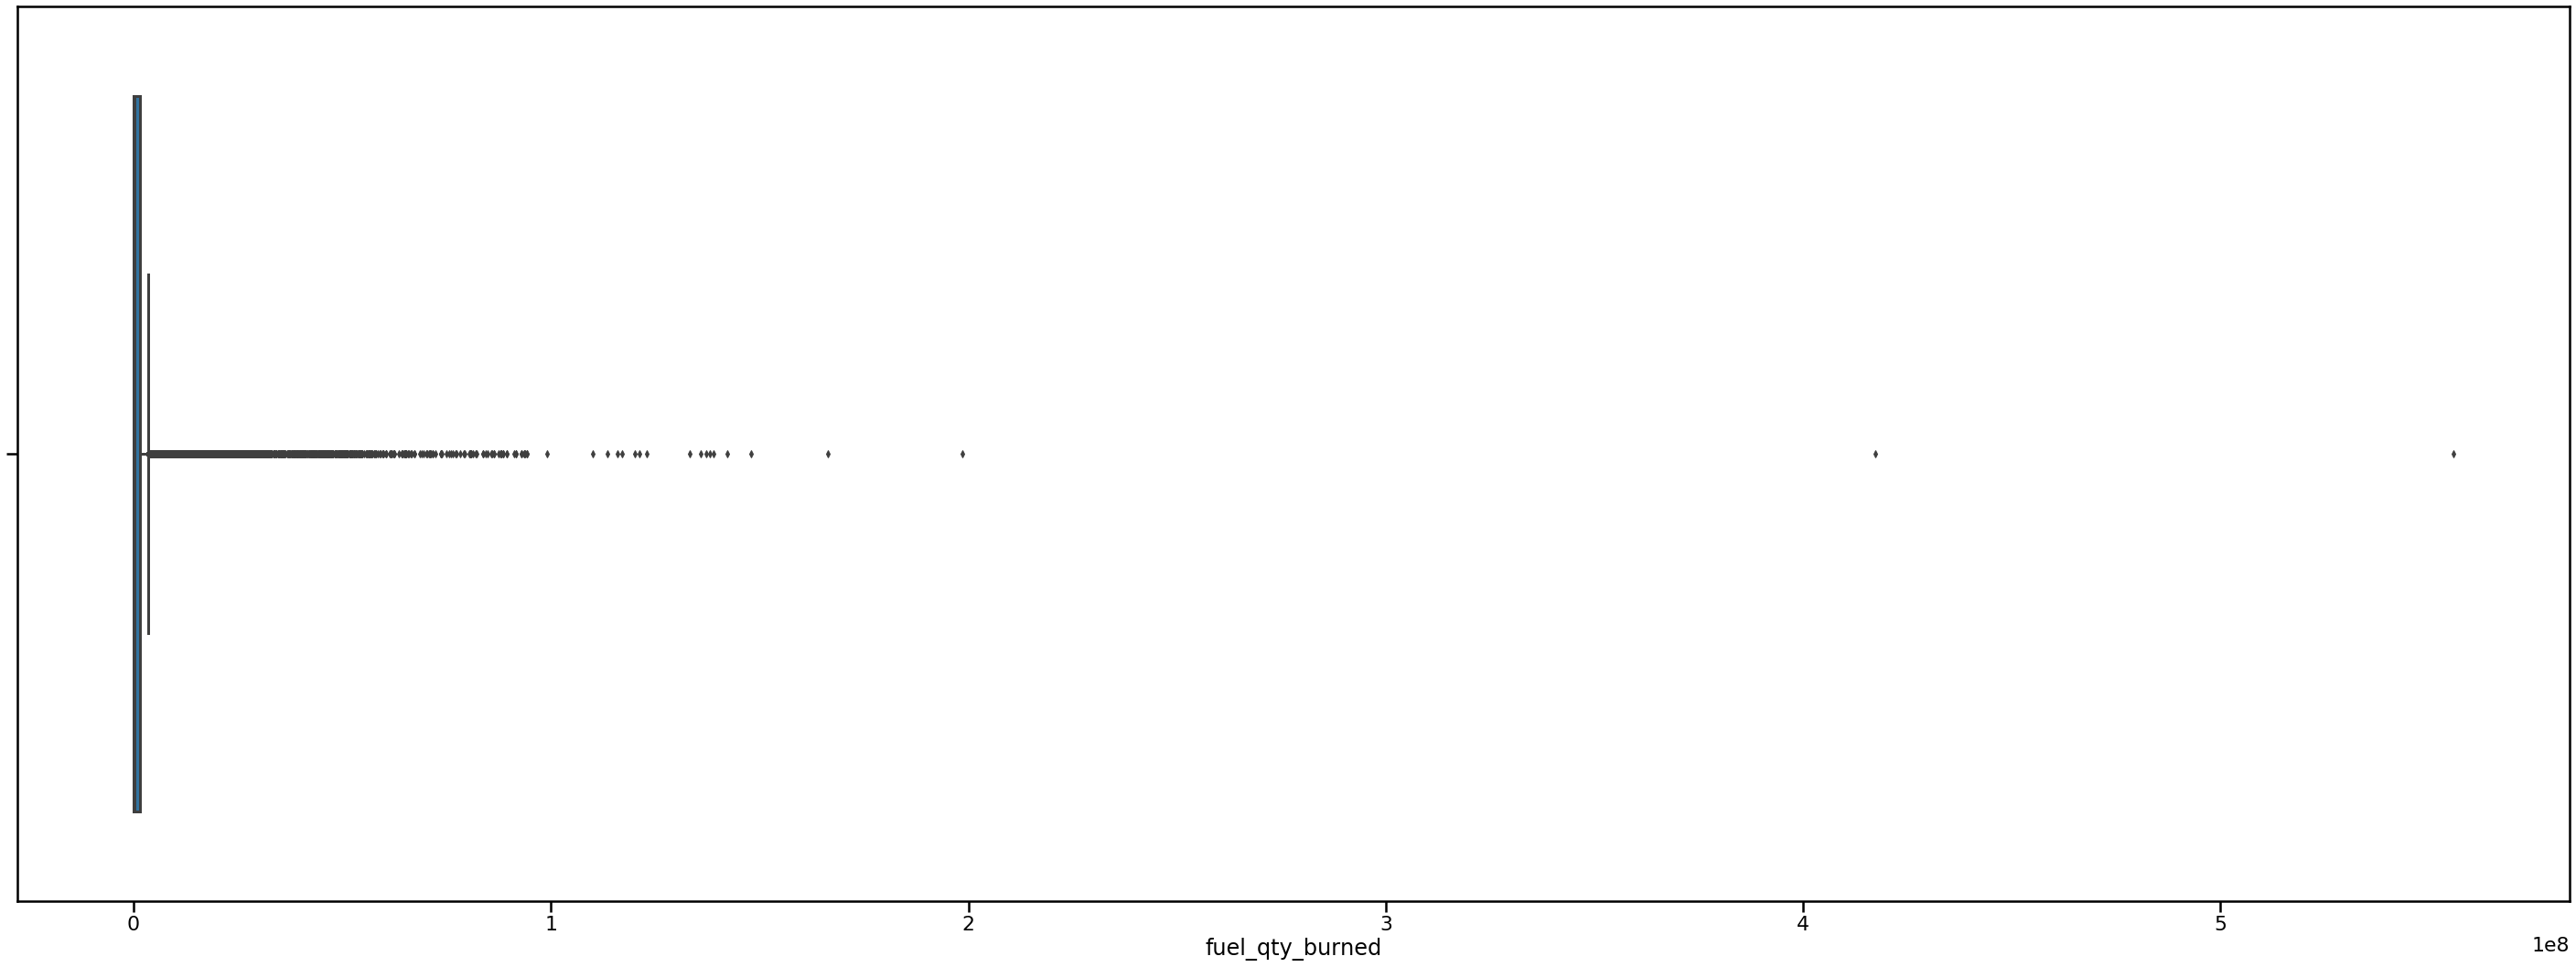

In [65]:
plt.figure(figsize=(50,18))
sns.set_context('poster',font_scale=1)
sns.boxplot(x='fuel_qty_burned',hue ='fuel_type_code_pudl', data=data)

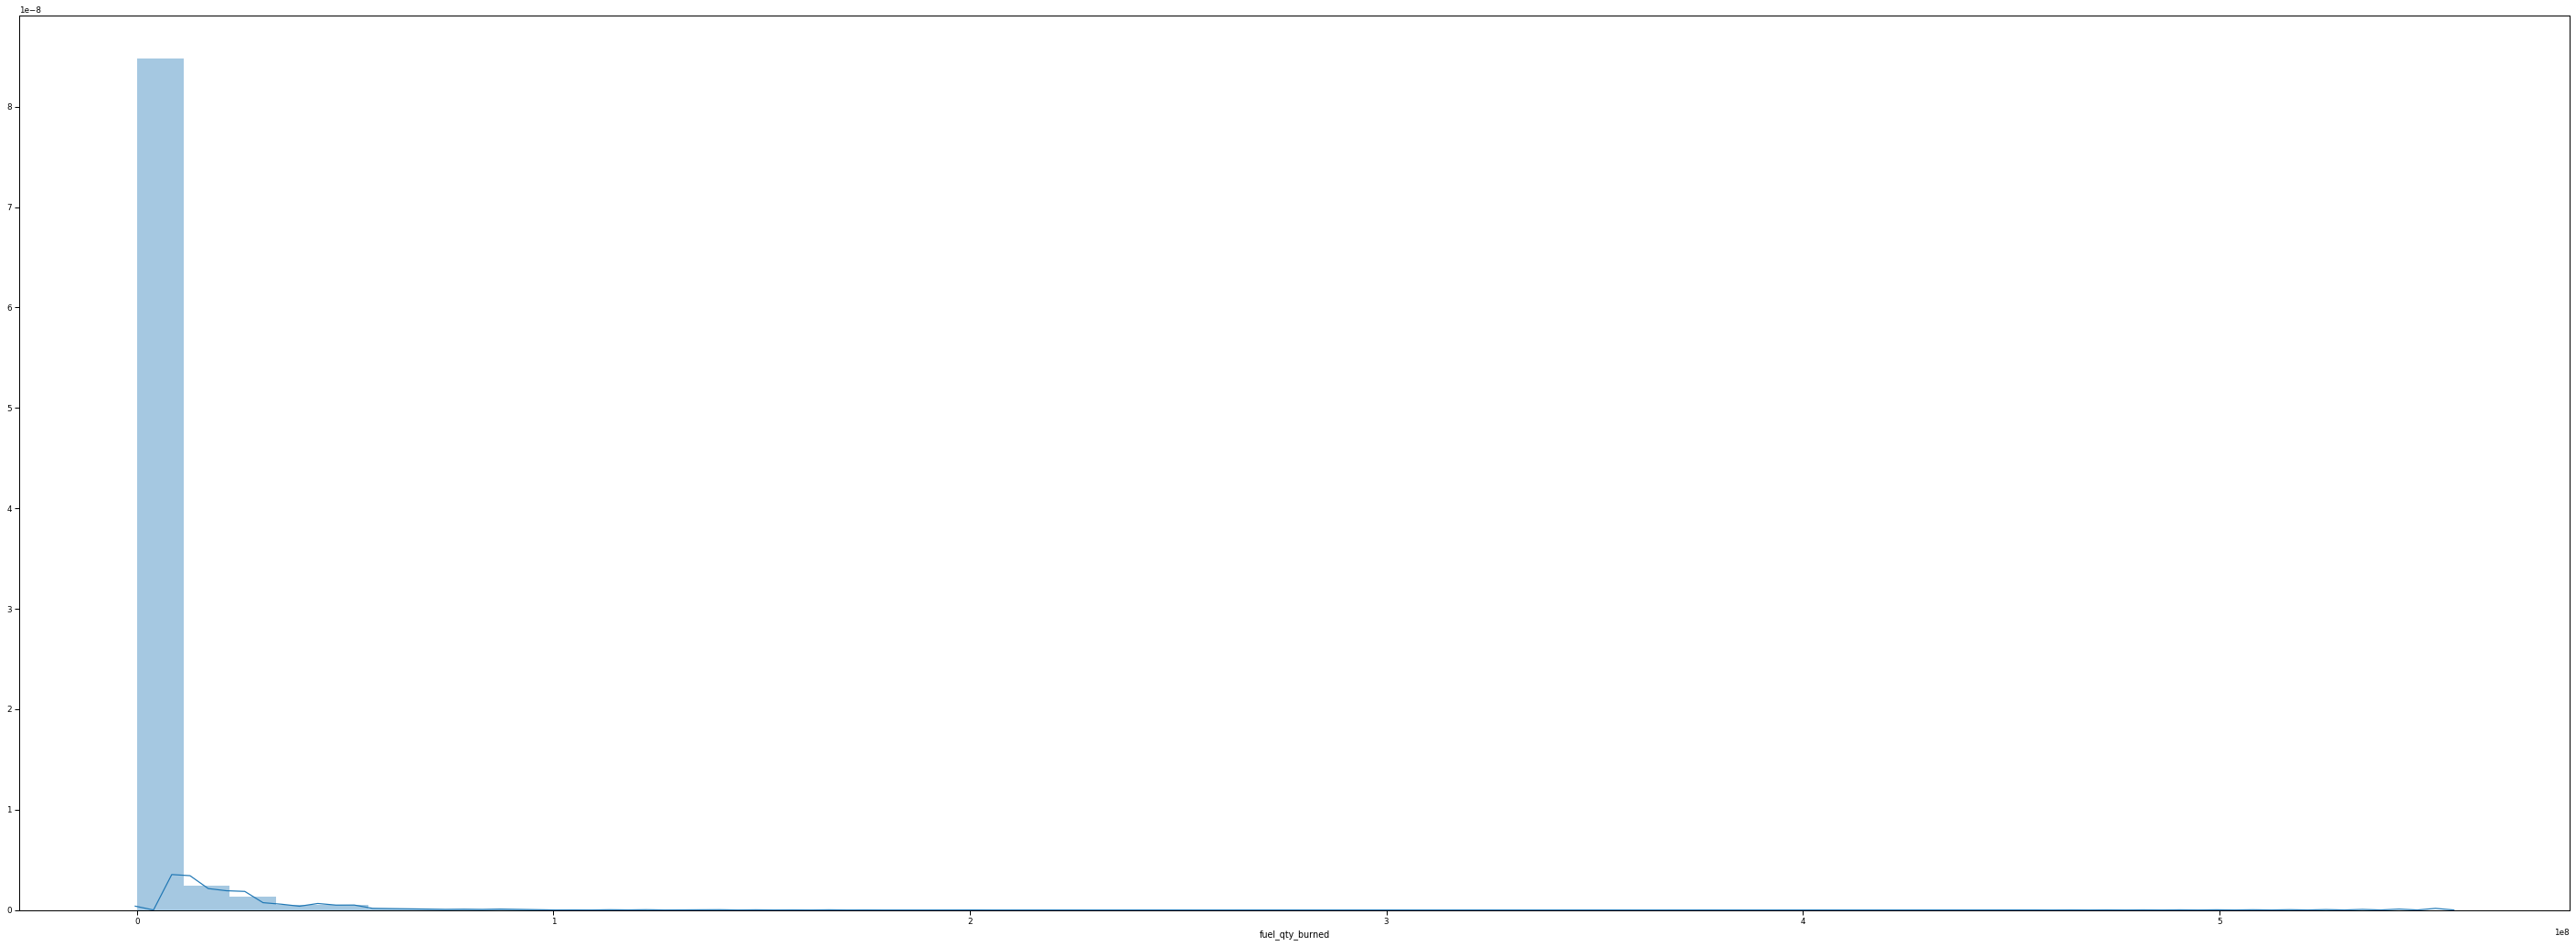

In [68]:
plt.figure(figsize=(50,18))
sns.set_context('paper',font_scale=1,)
sns.distplot(data['fuel_qty_burned'])

TypeError: can't multiply sequence by non-int of type 'float'

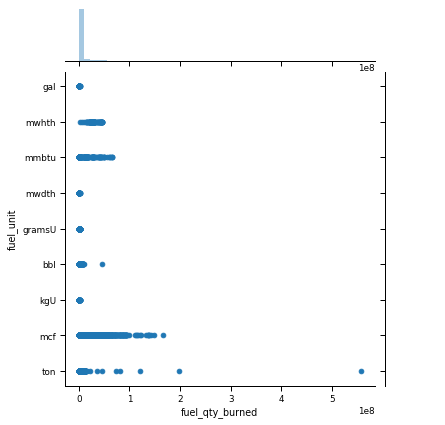

In [72]:
sns.jointplot(x='fuel_qty_burned',y='fuel_unit',data=data,kind='scatter')

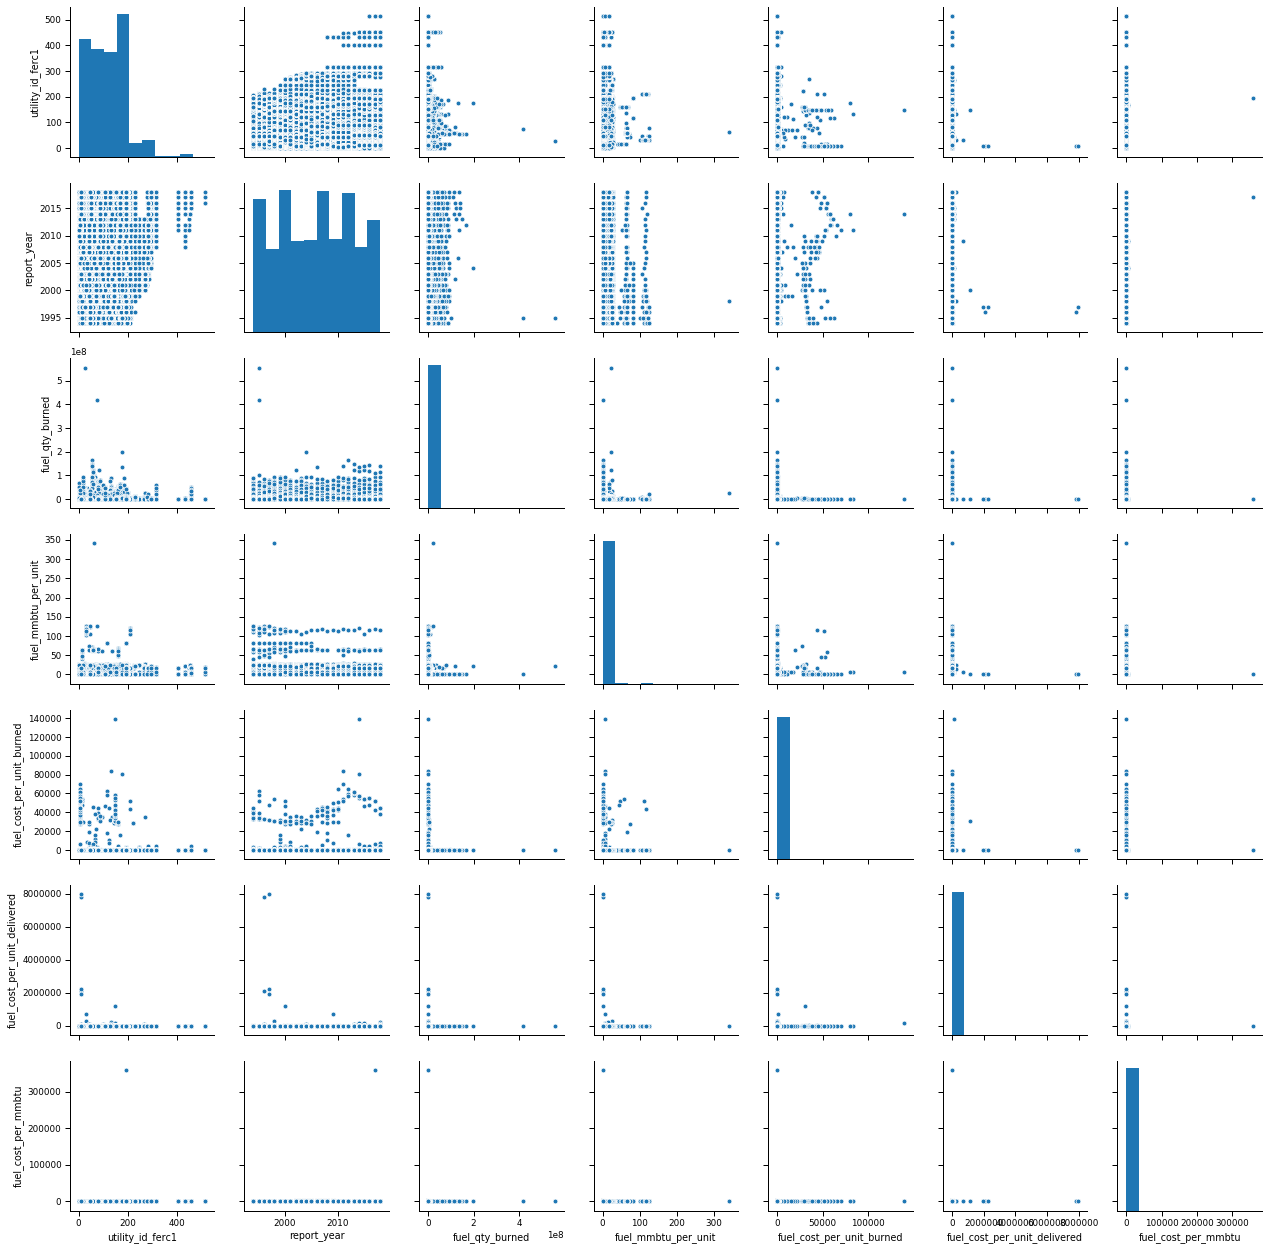

In [73]:
sns.pairplot(data)

<Figure size 7200x2160 with 0 Axes>

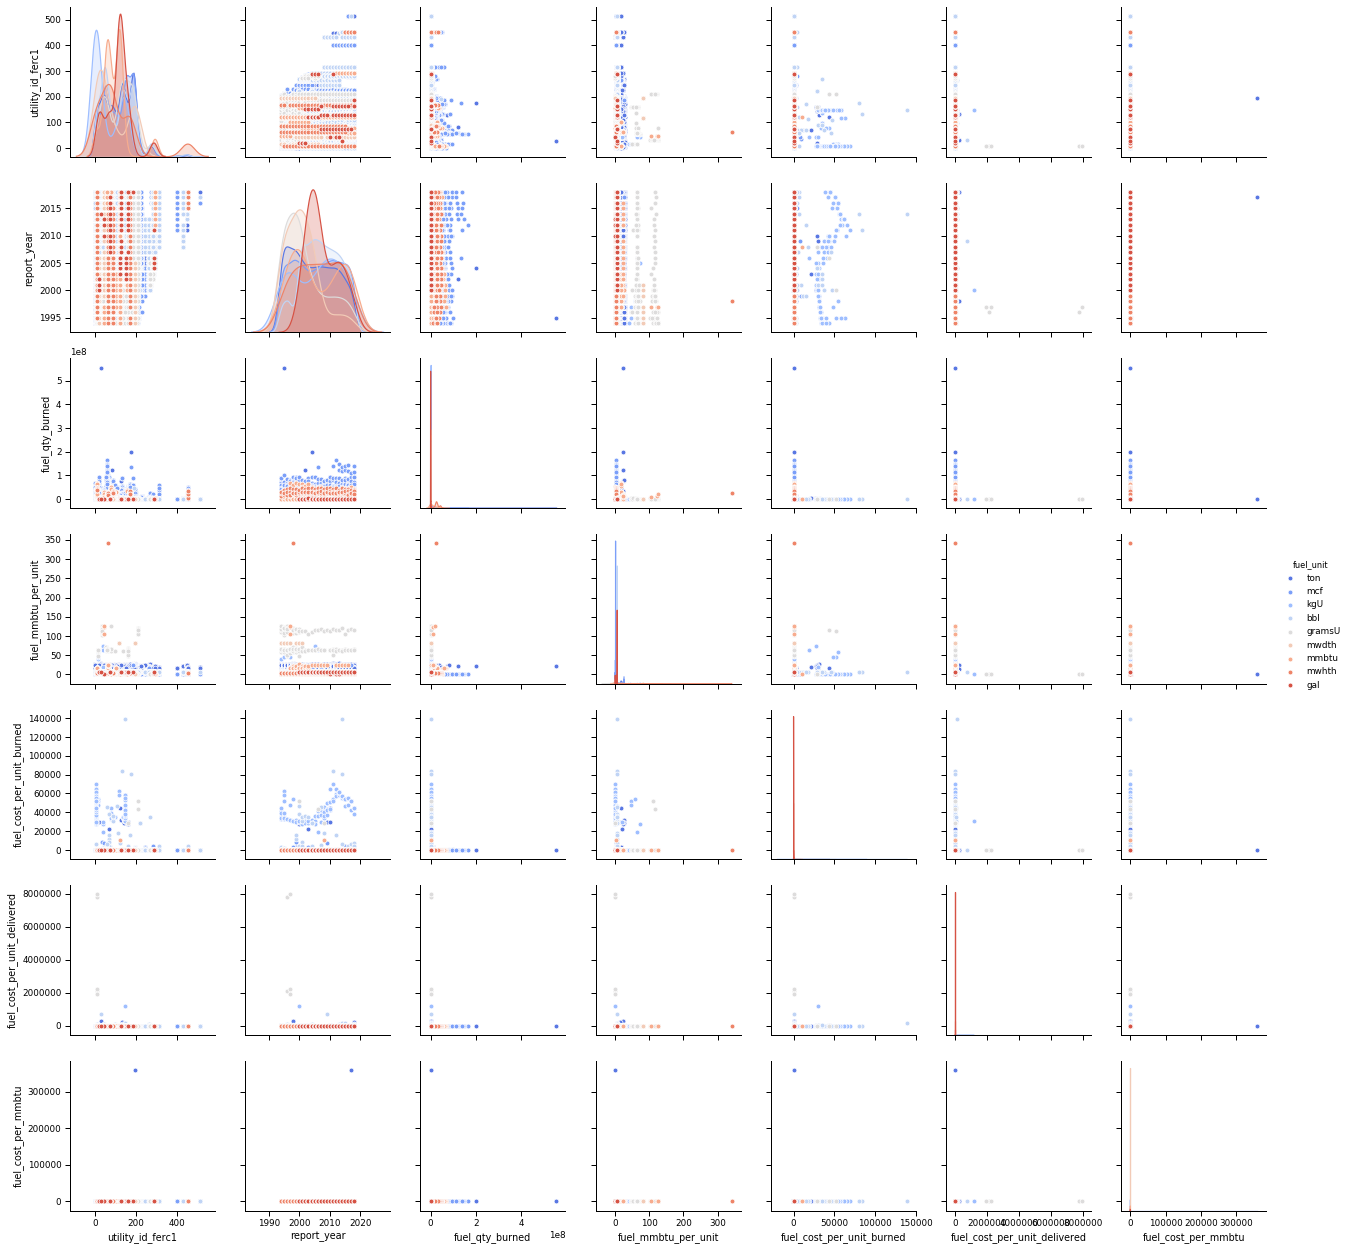

In [80]:
plt.figure(figsize=(100,30))
sns.set_context('paper',font_scale=1)
sns.pairplot(data,hue='fuel_unit',palette='coolwarm')

<Figure size 7200x2160 with 0 Axes>

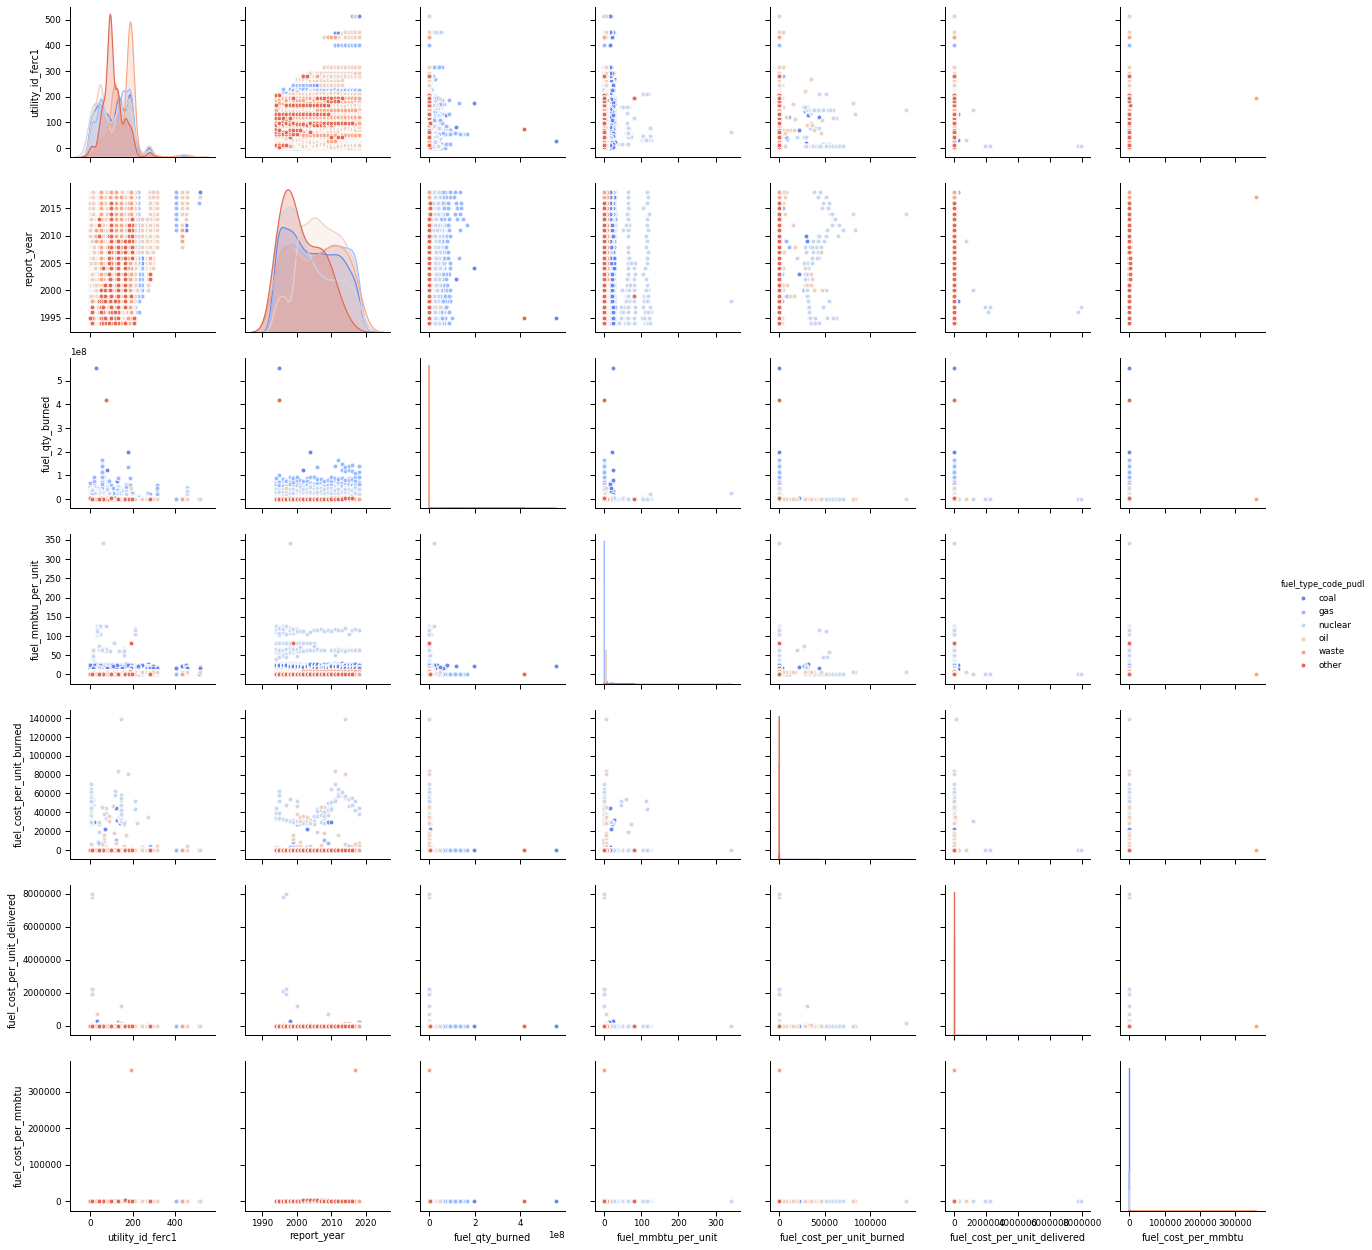

In [81]:
plt.figure(figsize=(100,30))
sns.set_context('paper',font_scale=1,)
sns.pairplot(data,hue='fuel_type_code_pudl',palette='coolwarm')


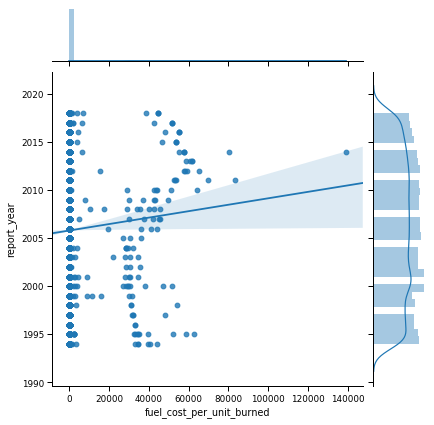

In [82]:
sns.jointplot(x='fuel_cost_per_unit_burned',y='report_year',data=data,kind='reg',%pa)


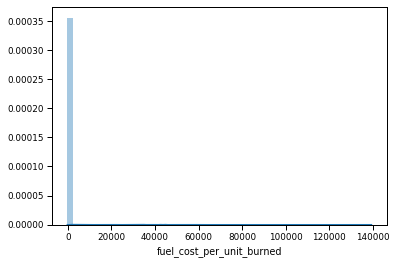

In [83]:
sns.distplot(data['fuel_cost_per_unit_burned'])
# Safe to ignore warnings

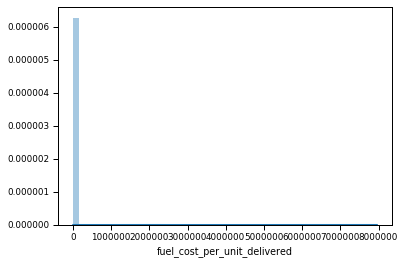

In [84]:
sns.distplot(data['fuel_cost_per_unit_delivered'])
# Safe to ignore warnings


In [88]:
data['plant_name_ferc1'].value_counts()

big stone             156
four corners          151
riverside             133
coyote                121
louisa                119
                     ... 
colstrip 1&2            1
stomy brook interm      1
paris-unit 1            1
miramar gt              1
huron gt #1             1
Name: plant_name_ferc1, Length: 2315, dtype: int64

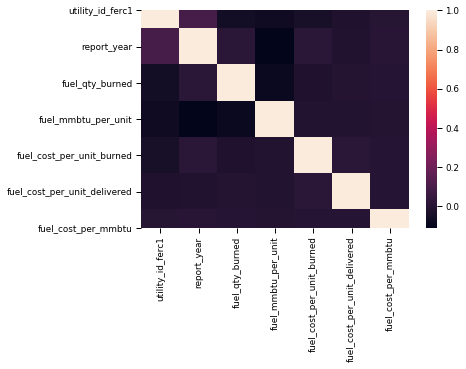

In [90]:
sns.heatmap(data.corr())

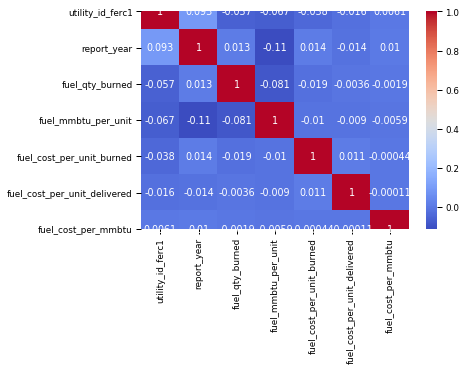

In [91]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [94]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [97]:
data.pivot_table(values='fuel_qty_burned',index='fuel_type_code_pudl',columns='plant_name_ferc1').T.head(200)

fuel_type_code_pudl,coal,gas,nuclear,oil,other,waste
plant_name_ferc1,,,,,,
(1)sta98,NaN,3.304400e+04,NaN,NaN,NaN,NaN
(2) scriba sta. 99,NaN,NaN,107129.0,NaN,NaN,NaN
(n) contra costa,NaN,1.133822e+07,NaN,NaN,NaN,NaN
(n) pittsburg,NaN,3.485118e+07,NaN,NaN,NaN,NaN
(n)(t)moss landing,NaN,8.786345e+07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ben french,NaN,9.506100e+04,NaN,2369.000000,NaN,NaN
ben french ct,NaN,8.062400e+04,NaN,569.500000,NaN,NaN
ben french diesel,NaN,NaN,NaN,327.000000,NaN,NaN


In [165]:
for i in range(200):
    print(data.pivot_table(values='fuel_qty_burned',index='plant_name_ferc1',columns='fuel_type_code_pudl'))#.head(50)

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

fuel_type_code_pudl      coal           gas    nuclear      oil  other  waste
plant_name_ferc1                                                             
(1)sta98                  NaN  3.304400e+04        NaN      NaN    NaN    NaN
(2) scriba sta. 99        NaN           NaN   107129.0      NaN    NaN    NaN
(n) contra costa          NaN  1.133822e+07        NaN      NaN    NaN    NaN
(n) pittsburg             NaN  3.485118e+07        NaN      NaN    NaN    NaN
(n)(t)moss landing        NaN  8.786345e+07        NaN      NaN    NaN    NaN
...                       ...           ...        ...      ...    ...    ...
zimmer- aepgr share  716585.0           NaN        NaN  10422.0    NaN    NaN
zion                      NaN           NaN  1080967.0      NaN    NaN    NaN
zorn                      NaN  1.938983e+04        NaN      NaN    NaN    NaN
zorn ct                   NaN  5.367400e+03        NaN      NaN    NaN    NaN
zuni                      NaN  3.187996e+05        NaN    582.0 

In [101]:
data.pivot_table(values='fuel_qty_burned',index='plant_name_ferc1',columns='report_year').T.head(200)

plant_name_ferc1,(1)sta98,(2) scriba sta. 99,(n) contra costa,(n) pittsburg,(n)(t)moss landing,(p) mobile unit 2,(p) mobile unit 3,* ar nuclear one,* big cajun 2 unit 3,* campbell 3,...,zimmer - opco share,zimmer -csp share,zimmer cge,zimmer csp shr,zimmer deo,zimmer- aepgr share,zion,zorn,zorn ct,zuni
report_year,,,,,,,,,,,,,,,,,,,,,
1994,33044.0,107129.0,NaN,NaN,87863451.0,NaN,NaN,NaN,NaN,907916.5,...,NaN,NaN,NaN,864025.0,NaN,NaN,920189.0,NaN,NaN,259485.0
1995,NaN,NaN,11338219.0,34851184.0,NaN,1965.0,2853.0,NaN,NaN,NaN,...,NaN,NaN,NaN,883525.0,NaN,NaN,1218311.0,21849.0,NaN,147026.0
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,975162.0,NaN,NaN,1104401.0,35188.0,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43877929.0,16290065.0,NaN,...,NaN,NaN,NaN,825952.0,NaN,NaN,NaN,57060.0,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,970704.0,NaN,NaN,NaN,43542.0,NaN,693109.0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,811906.0,NaN,NaN,NaN,38684.0,NaN,349433.0
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,376733.0,NaN,NaN,NaN,14781.0,NaN,1388205.0
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,457945.5,NaN,NaN,NaN,NaN,NaN,5894.0,NaN,1235519.0
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,481511.0,NaN,NaN,NaN,NaN,NaN,1159.0,NaN,367665.0


In [105]:

data.pivot_table(values='fuel_qty_burned',index='fuel_unit',columns='report_year').T

fuel_unit,bbl,gal,gramsU,kgU,mcf,mmbtu,mwdth,mwhth,ton
report_year,,,,,,,,,
1994,23954.879310,NaN,7.497428e+05,718.500000,5.000796e+06,8.836488e+06,4.638641e+05,2.132435e+07,1.428622e+06
1995,23277.868852,NaN,7.661735e+05,654.800000,5.144222e+06,9.285078e+06,5.171681e+05,2.517991e+07,2.540397e+06
1996,28852.800000,NaN,6.104141e+05,896.500000,4.547599e+06,7.780153e+06,3.444470e+05,2.776469e+07,1.540002e+06
1997,327304.130178,NaN,6.104305e+05,756.000000,4.570337e+06,1.700719e+07,1.564188e+05,2.734690e+07,1.541274e+06
1998,56992.706667,NaN,7.070357e+05,190164.500000,4.982766e+06,1.660957e+07,6.108967e+05,2.929370e+07,1.649398e+06
1999,12708.607843,NaN,8.514117e+05,276058.750000,4.961147e+06,1.724819e+07,6.572070e+05,2.595625e+07,1.599739e+06
2000,60740.990385,58762.500000,8.475999e+05,938.500000,4.914156e+06,1.900699e+07,6.353746e+05,2.852516e+07,1.655266e+06
2001,64258.276596,26899.750000,6.036602e+05,883.500000,4.561738e+06,2.080682e+07,5.970048e+05,3.126208e+07,1.814783e+06
2002,58147.149051,62514.000000,8.611940e+05,942.500000,3.566581e+06,2.031960e+07,8.652958e+05,3.121075e+07,1.887930e+06


In [108]:
data.pivot_table(values='fuel_qty_burned',index='plant_name_ferc1',columns='fuel_type_code_pudl').head(200)

fuel_type_code_pudl,coal,gas,nuclear,oil,other,waste
plant_name_ferc1,,,,,,
(1)sta98,NaN,3.304400e+04,NaN,NaN,NaN,NaN
(2) scriba sta. 99,NaN,NaN,107129.0,NaN,NaN,NaN
(n) contra costa,NaN,1.133822e+07,NaN,NaN,NaN,NaN
(n) pittsburg,NaN,3.485118e+07,NaN,NaN,NaN,NaN
(n)(t)moss landing,NaN,8.786345e+07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ben french,NaN,9.506100e+04,NaN,2369.000000,NaN,NaN
ben french ct,NaN,8.062400e+04,NaN,569.500000,NaN,NaN
ben french diesel,NaN,NaN,NaN,327.000000,NaN,NaN


In [110]:
data['fuel_qty_burned'].max()

555894250.0

In [112]:
data['fuel_qty_burned'].min()

1.0

In [111]:
data[data['fuel_qty_burned']== 555894250.0]['report_year']
# 1995 is the year with the higest number of the quantity of fuel burned

1715    1995
Name: report_year, dtype: int64

In [114]:
data[data['fuel_qty_burned']== 1.0]['report_year']
print ('these are the years with the lowest quantity of fuel burned')

these are the years with the lowest quantity of fuel burned


How much of fuel does the top 10 plant burn?

In [115]:
data['plant_name_ferc1'].value_counts().head(10)

big stone             156
four corners          151
riverside             133
coyote                121
louisa                119
hayden                 99
lake road              93
ben french station     93
independence           91
oklaunion              90
Name: plant_name_ferc1, dtype: int64

In [121]:
list(data['plant_name_ferc1'].value_counts().head(10))

[156, 151, 133, 121, 119, 99, 93, 93, 91, 90]

In [126]:
data[(data['fuel_qty_burned']==555894250)&(data['plant_name_ferc1'].value_counts().head(10))]

/home/obigvee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [146]:
data[data['plant_name_ferc1']=='big stone']['fuel_qty_burned'].max()

1290598.0

create a loop to print out the value of the highest quantity of fuel burned by the top 10 companies

In [147]:
topPlant = ['big stone','four corners','riverside','coyote','louisa','hayden',
            'lake road','ben french station','independence','oklaunion']

In [153]:
# def topPlantWithHigestFuel():
for x in topPlant:
    result = data[data['plant_name_ferc1']==x]['fuel_qty_burned'].max()
    print(x+'='+str(result))
        #return x

big stone=1290598.0
four corners=3131605.0
riverside=40586623.0
coyote=925120.0
louisa=2804150.0
hayden=982115.0
lake road=2106690.0
ben french station=2765126.0
independence=30024142.0
oklaunion=1764095.0


In [11]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

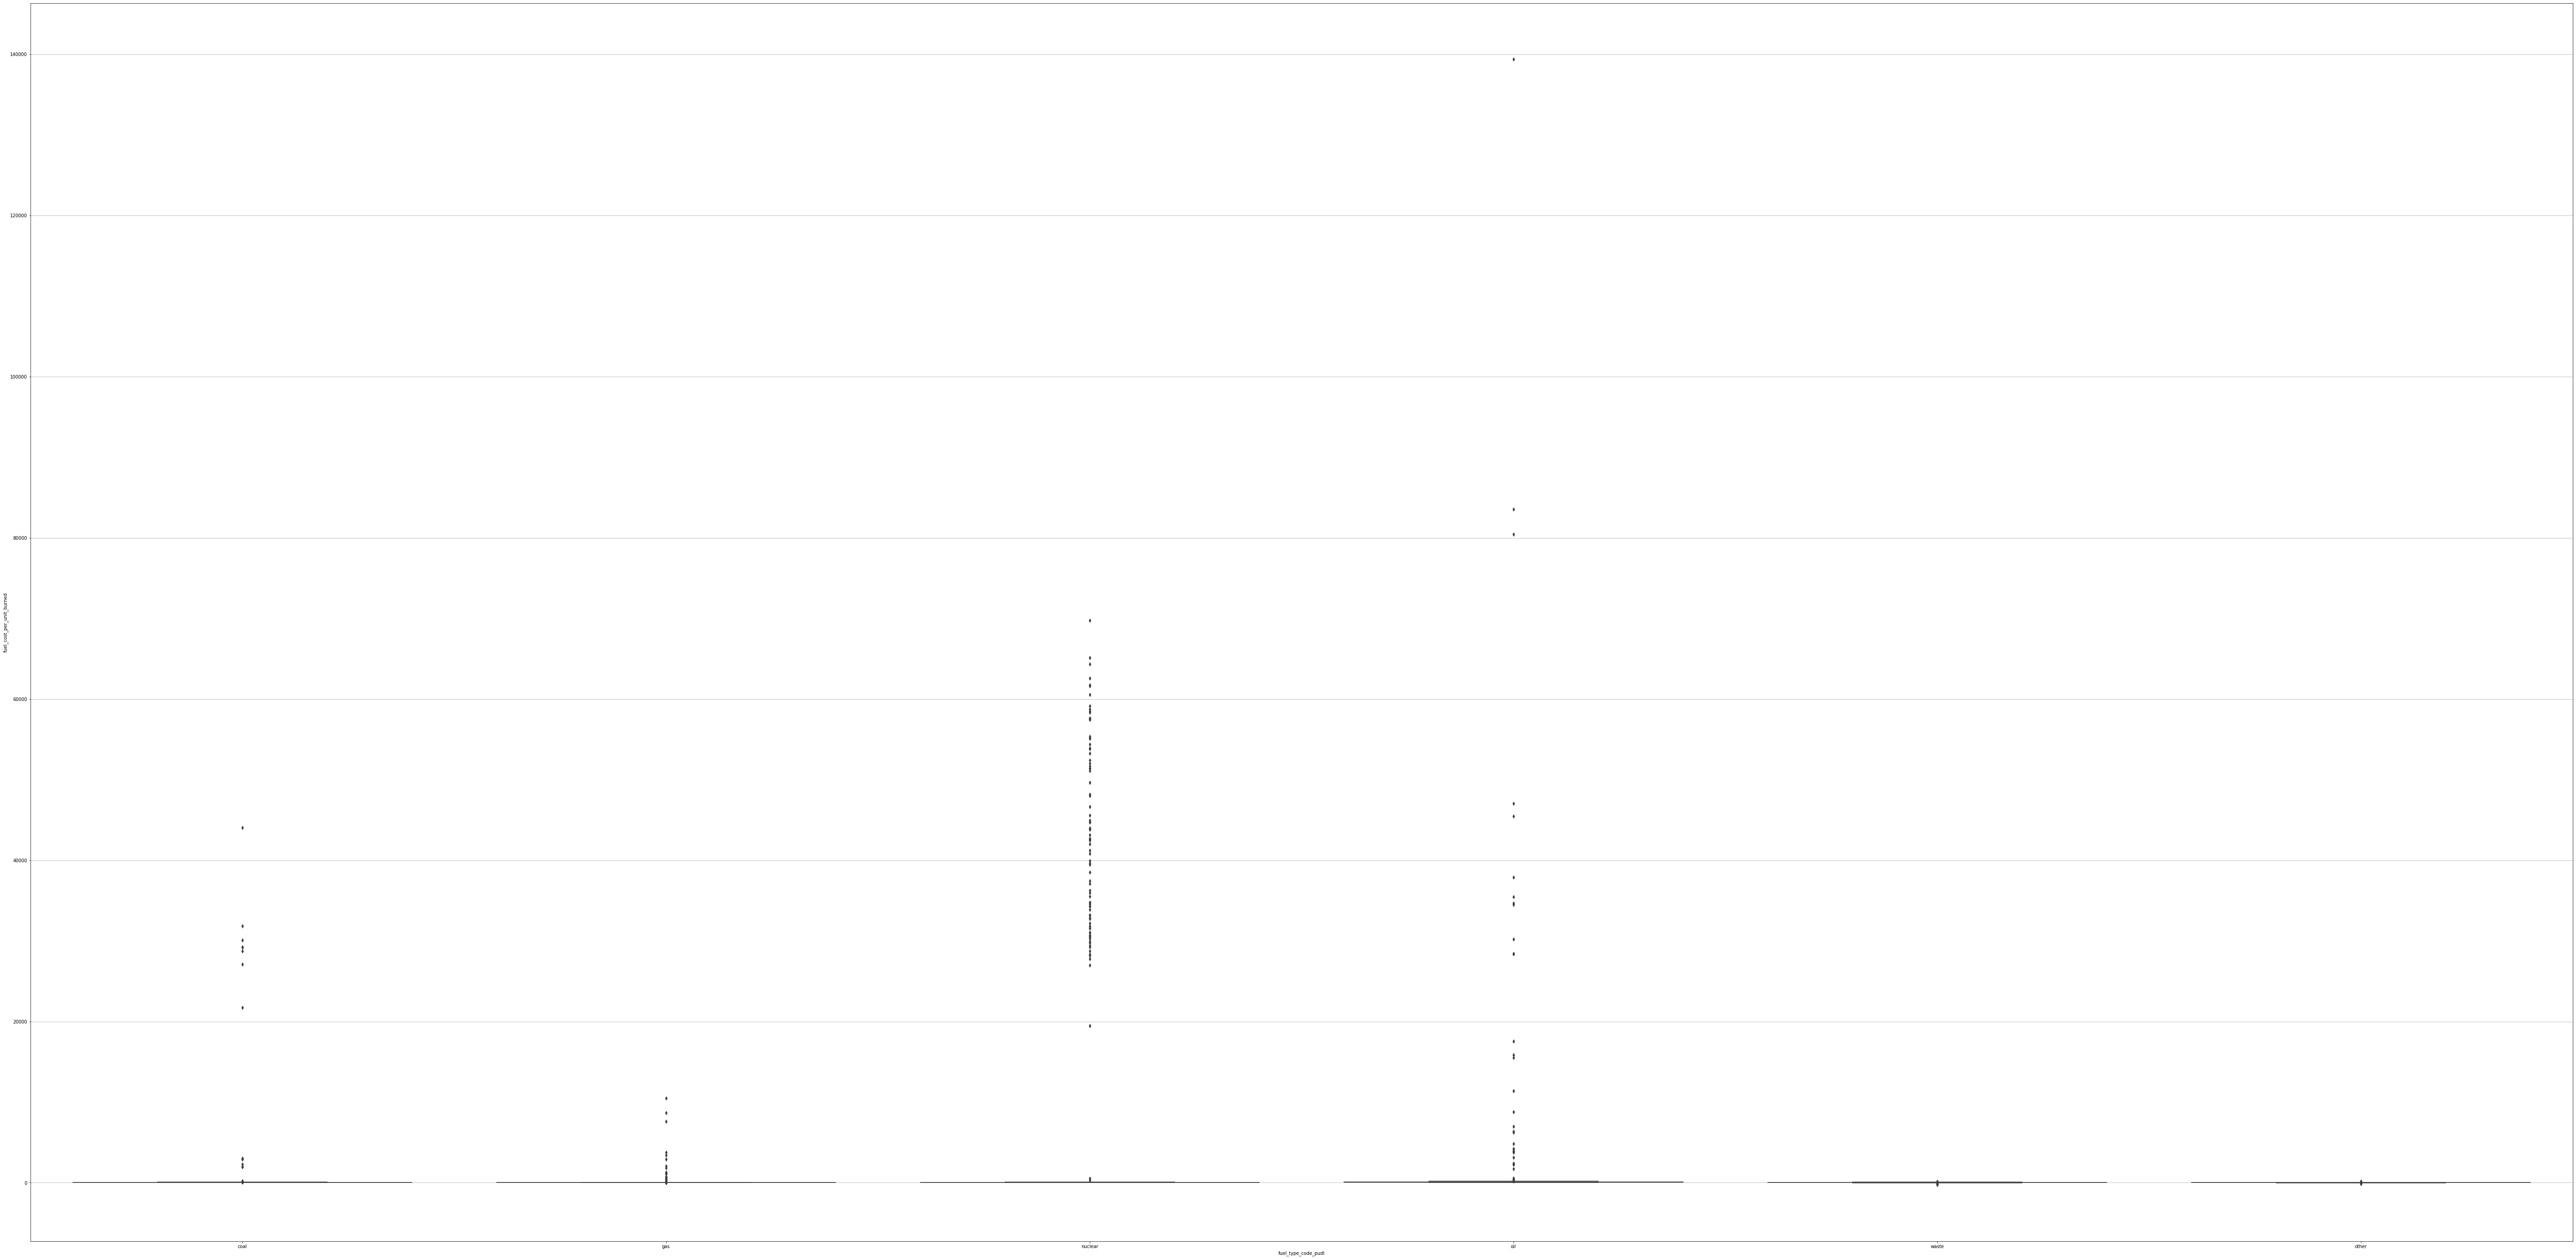

In [17]:
plt.figure(figsize=(100,50))
plt.grid(axis ='both')
sns.boxplot(x='fuel_type_code_pudl',y='fuel_cost_per_unit_burned', data = data,)

In [18]:
data['LAFuelCostPUB'] = data['fuel_cost_per_unit_burned'].mean()

In [31]:
data['Fuelcost_pud'] = data['fuel_cost_per_unit_delivered'].mean()

In [20]:
data['LAFuelCostPUB'].min()

208.64903102665716

In [22]:
utt=data[data['LAFuelCostPUB']==208.64903102665716 ]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,LAFuelCostPUB
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,208.649031
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,208.649031
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,208.649031
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,208.649031
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,208.649031
...,...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030,208.649031
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950,208.649031
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990,208.649031
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110,208.649031


In [26]:
utt=data[data['LAFuelCostPUB']==208.64903102665716 ]

In [29]:
utt.fuel_type_code_pudl.value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [36]:
data['Fuelcost_pud'] = data['fuel_cost_per_unit_delivered'].mean()

In [37]:
Highestcostperdeliver = data[data['Fuelcost_pud']== 917.5704491074691 ]

In [38]:
Highestcostperdeliver

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,LAFuelCostPUB,Fuelcost_pud
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,208.649031,917.570449
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,208.649031,917.570449
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,208.649031,917.570449
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,208.649031,917.570449
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,208.649031,917.570449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030,208.649031,917.570449
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950,208.649031,917.570449
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990,208.649031,917.570449
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110,208.649031,917.570449


In [50]:
# Highestcostperdeliver[Highestcostperdeliver['report_year']['Fuelcost_pud']].value_counts()==917.5704491074691

In [33]:
highestcostperdeliver

917.5704491074691

In [34]:
highestcostperdeliver[highestcostperdeliver['Fuelcost_pud']== 917.5704491074691]

TypeError: 'float' object is not subscriptable

In [35]:
highestcostperdeliver

917.5704491074691

In [41]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu', 'LAFuelCostPUB',
       'Fuelcost_pud'],
      dtype='object')

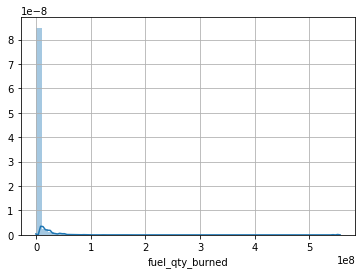

In [45]:
sns.distplot(a=data['fuel_qty_burned'],hist=True, kde =True)
plt.grid(axis='both')

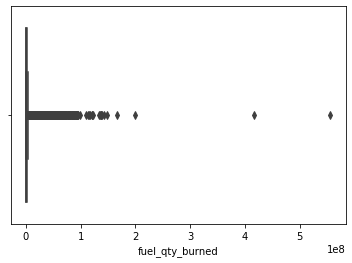

In [46]:
sns.boxplot(x='fuel_qty_burned', data = data)